importing Jupyter notebook from plotting_fun_for_curves.ipynb


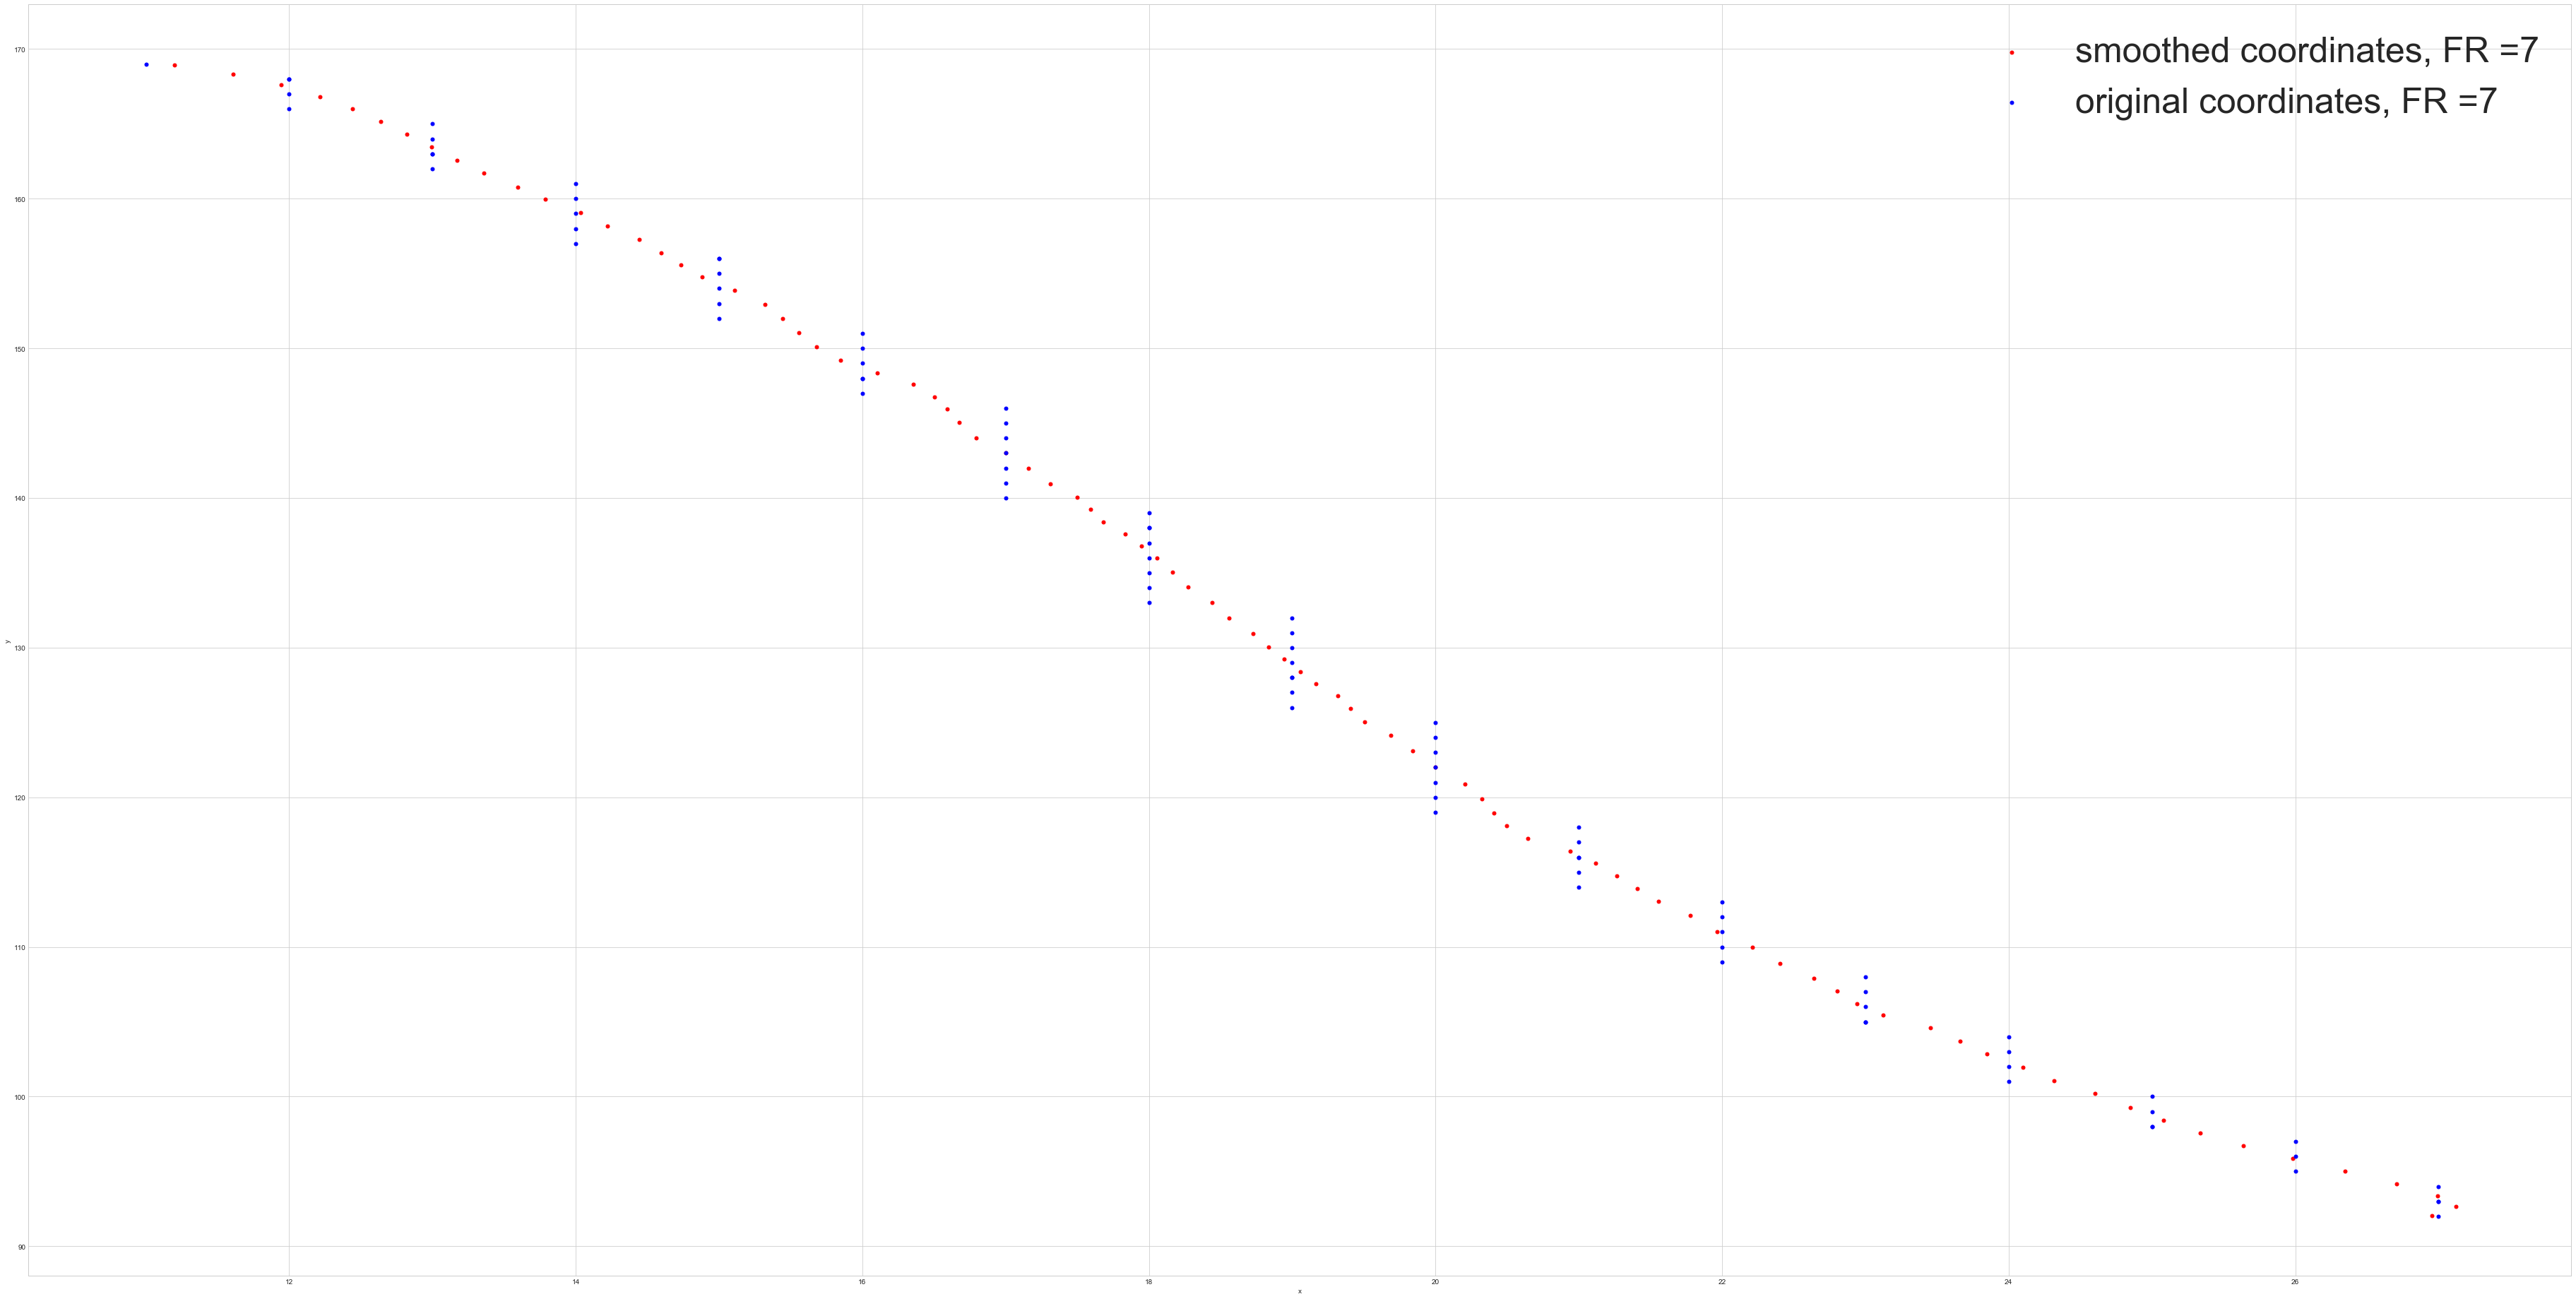

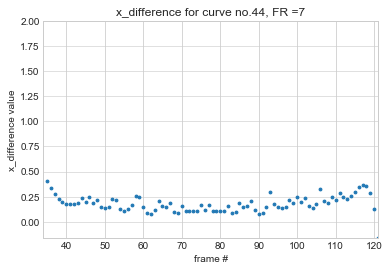

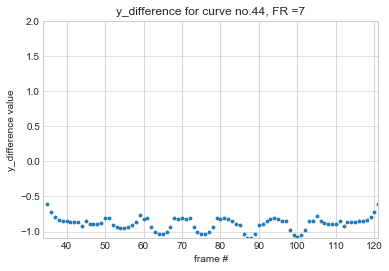

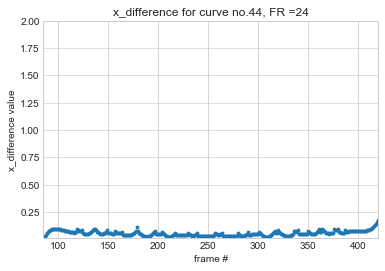

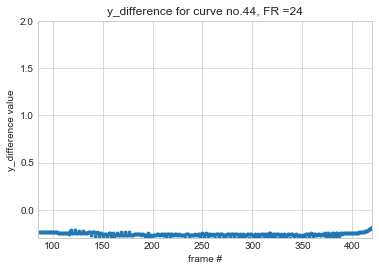

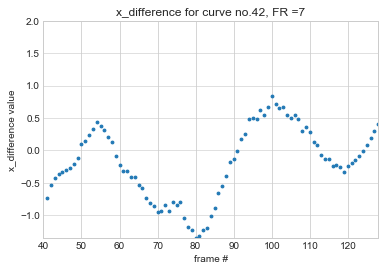

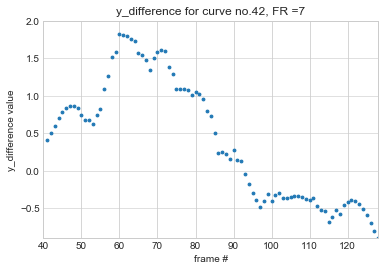

In [1]:
import os
import sys 
sys.path.remove('/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests')
sys.path.append('/Users/karolinagrzeszkiewicz/locomotion')
import locomotion 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import statistics as st

sys.path.remove('/Users/karolinagrzeszkiewicz/locomotion')
sys.path.append('/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests')
import import_ipynb
import plotting_fun_for_curves
#import reg_and_stats_for_FR_test

#In this script we want to iinvestigate curves with unexpectedly large differences 
#in BDD value between consecutive frame rates in the FR robustness test

#the curves and FR values identified in reg_and_stats_for_FR_test (by using a benchmark BDD = 0.032 for FR_test_low
#and benchmark BDD = 0.022 for FR_test_high) are:

#curve 28, FR = (10, 28, 44, 48, 60), FR_low trial no (04), FR_high trial no (02, 10, 12, 18)
#curve 34, FR = (62, 74, 86), FR_high trial no (19, 25, 31)

#curve 38, FR = (7, 11), FR_low trial no (01, 05)
#curve 45, FR = (8, 23), FR_low trial no (02, 17)

#We take a sample of 2 curves from curves following a smooth pattern, and 2 curves from a group of curves 
#with large scatter

#curve 28 has significant scatter: outliers for FR = 10, 28, 44, 48, 60 (highest for FR = 10, 60)
#curve 34 same as above but slightly smaller jumps, highest for FR = 62

#curve 38: more regular shape/consistent pattern but big jump for FR = 7
#curve 45: regular shape but jumo for FR = 8 and FR = 23

#We'd expect more big jumps for FR<24 since when the frame rate is small the curve is more susceptible to smoothing 
#(even when the curve is smooth)
#(hence lower benchmark for FR_high)
#smooth curves: 38, 45, large scatter curves: 28, 34: more unusual since there are a lot of jumps for FR>24

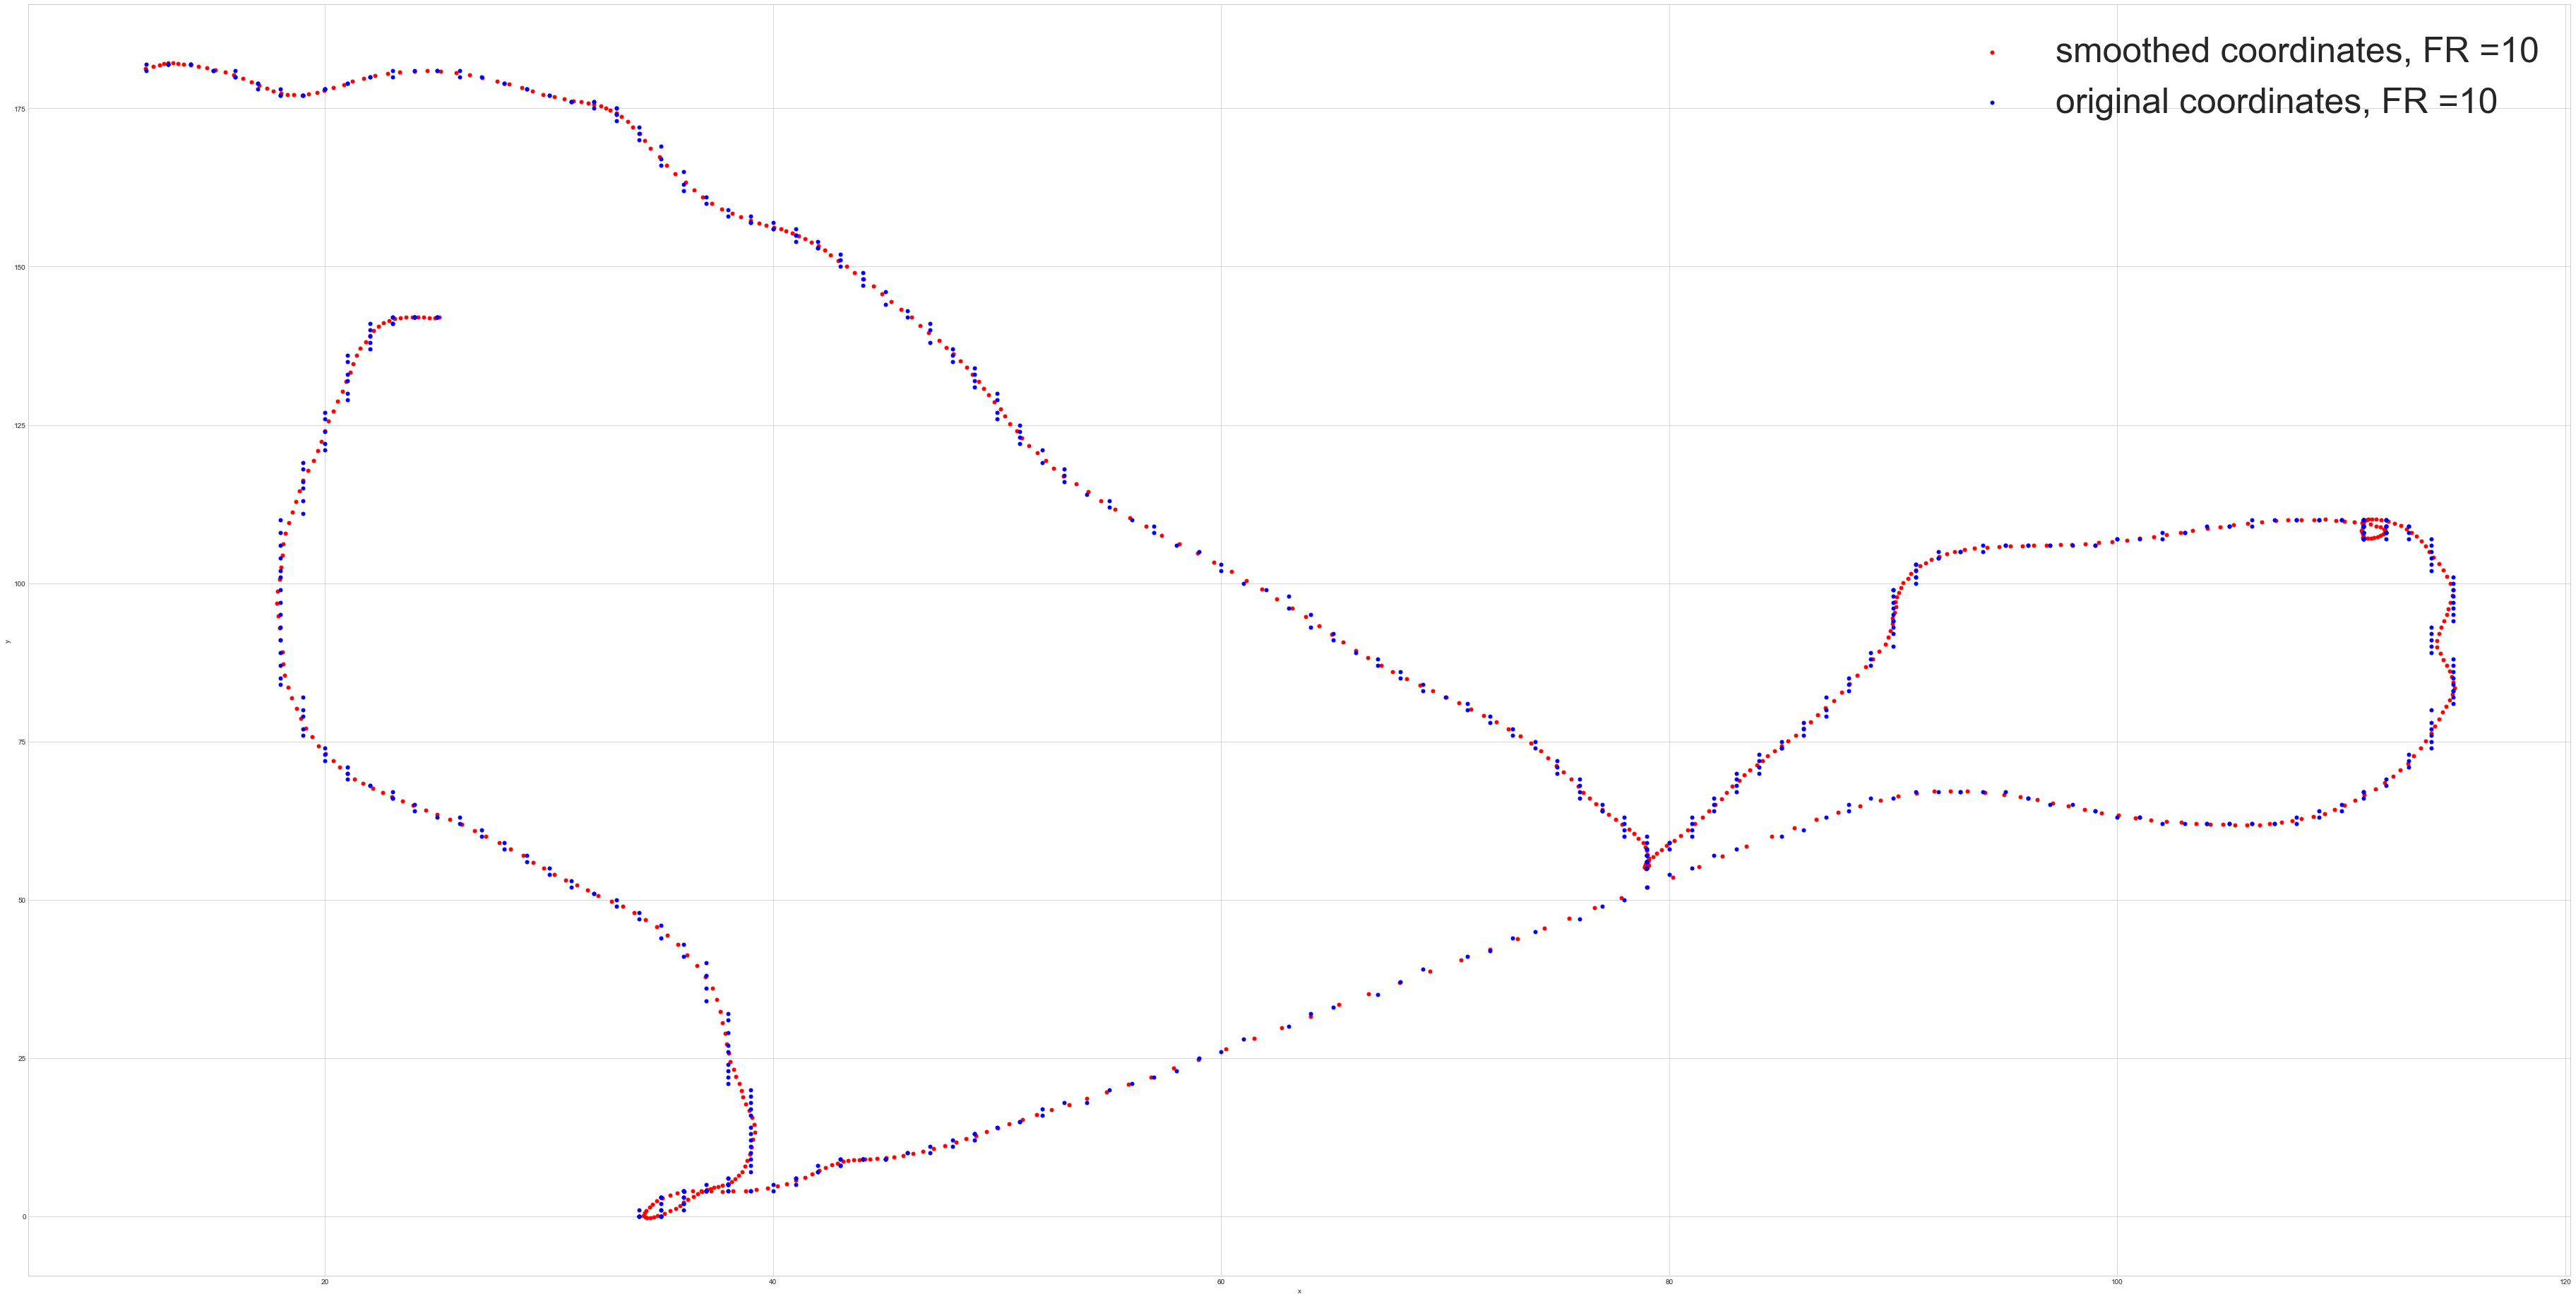

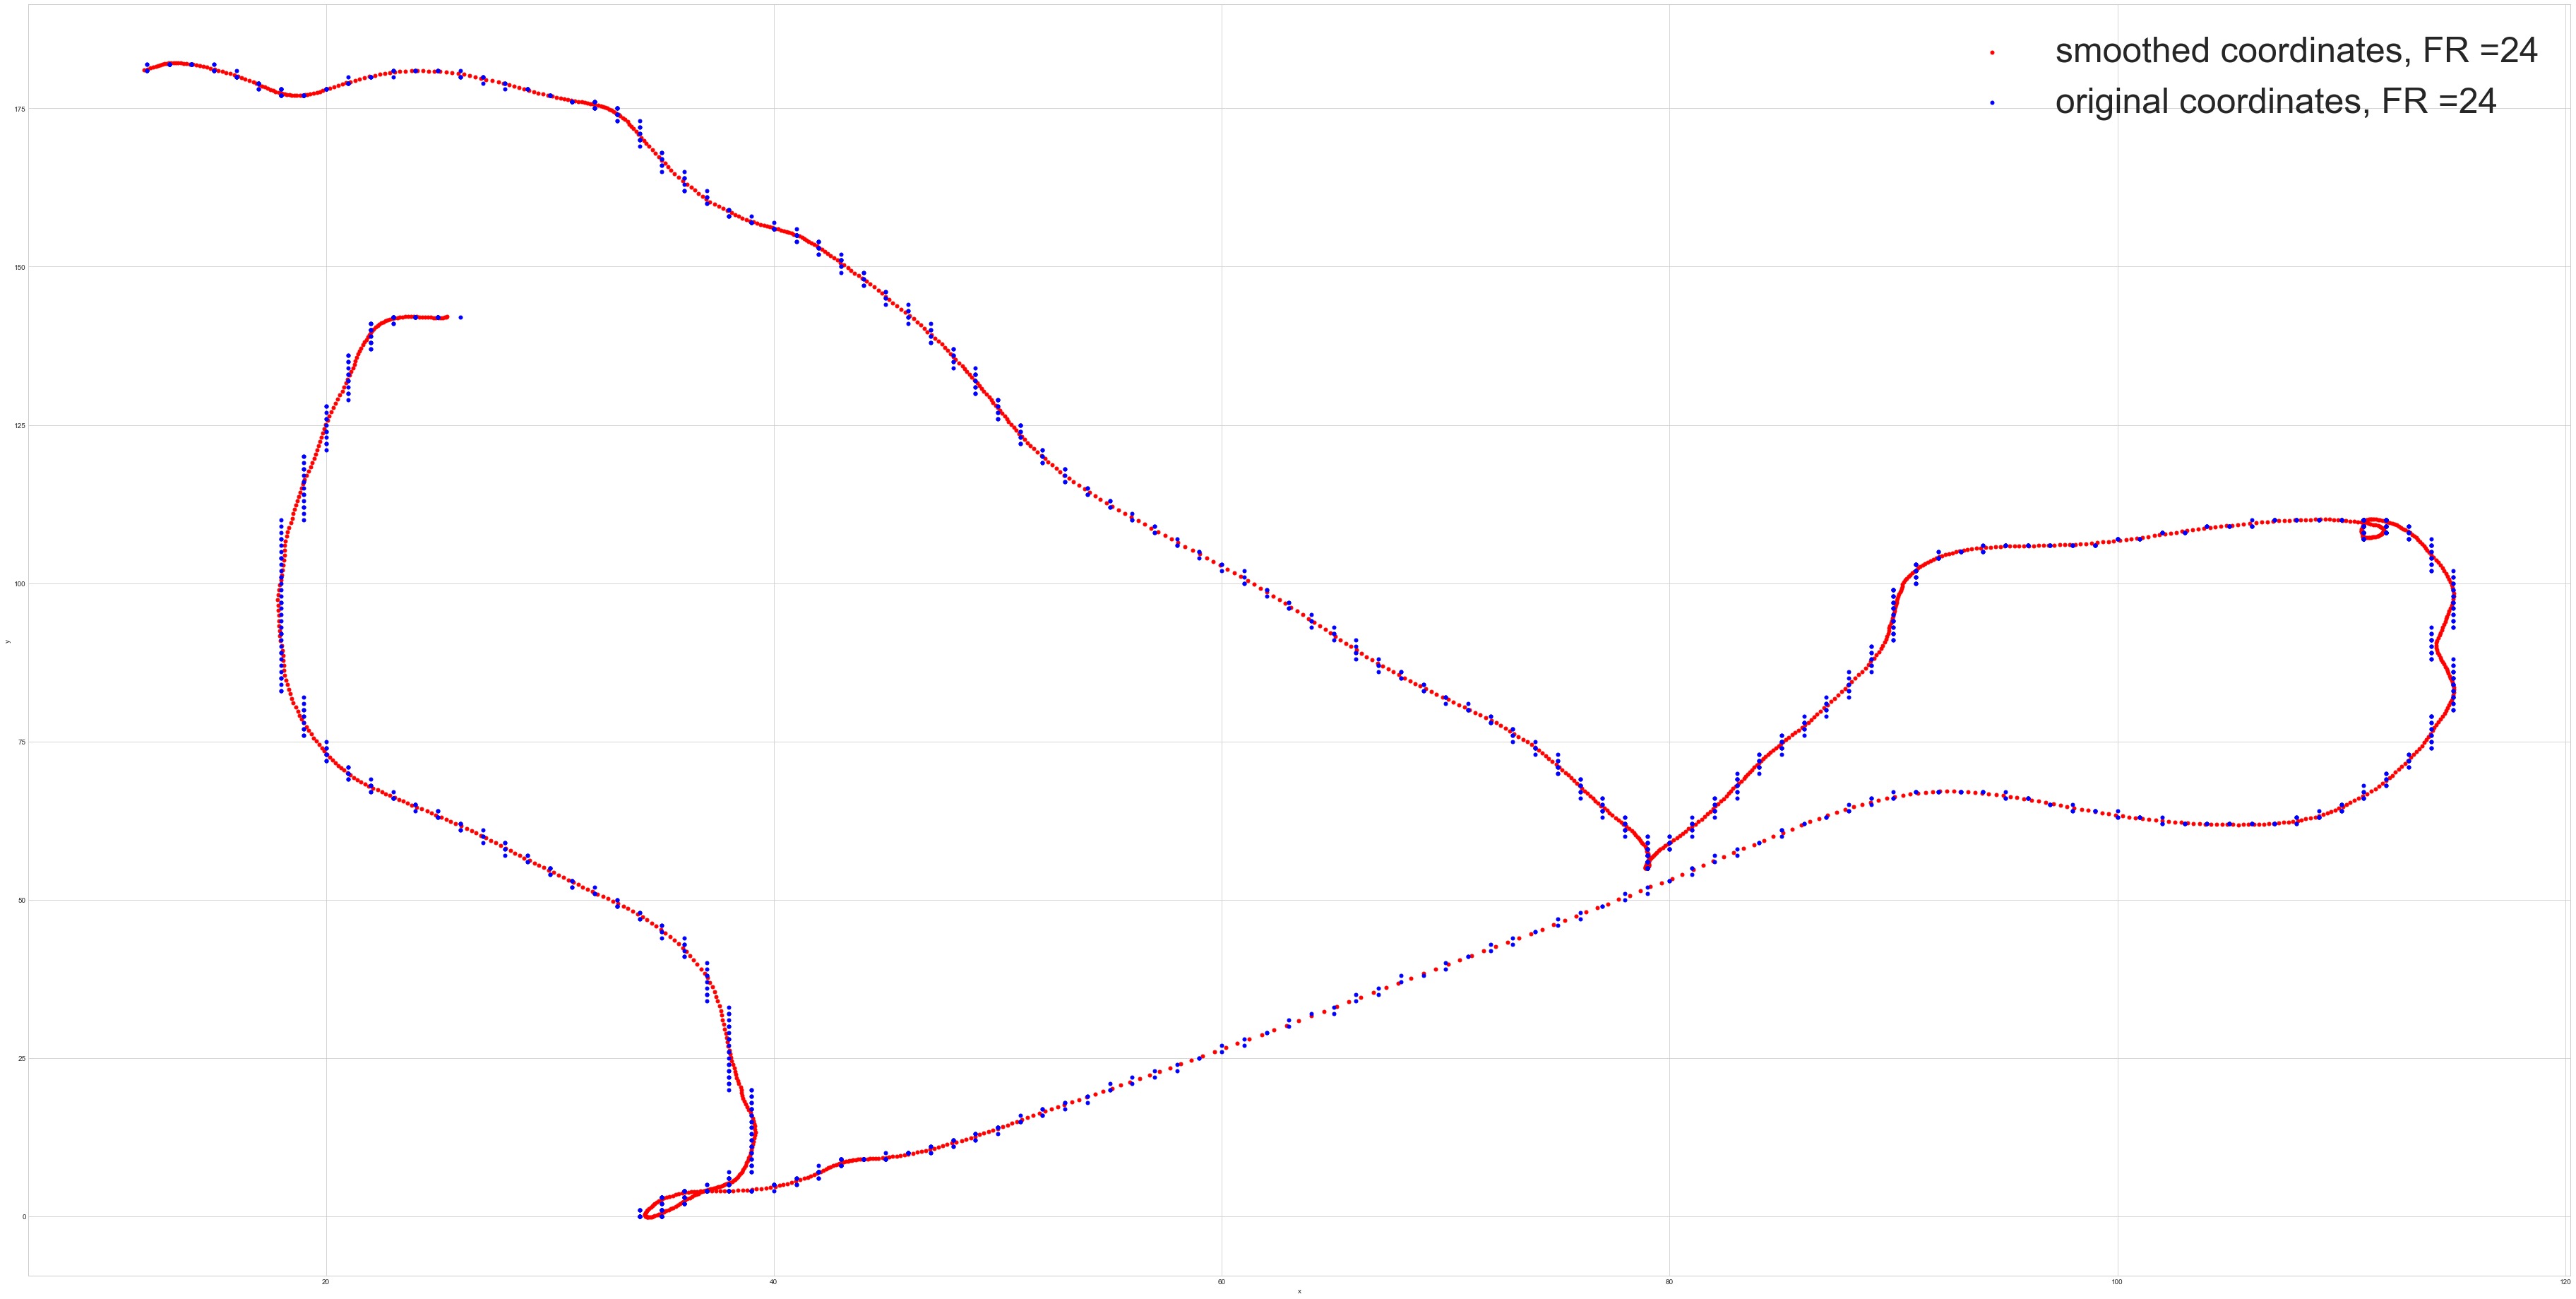

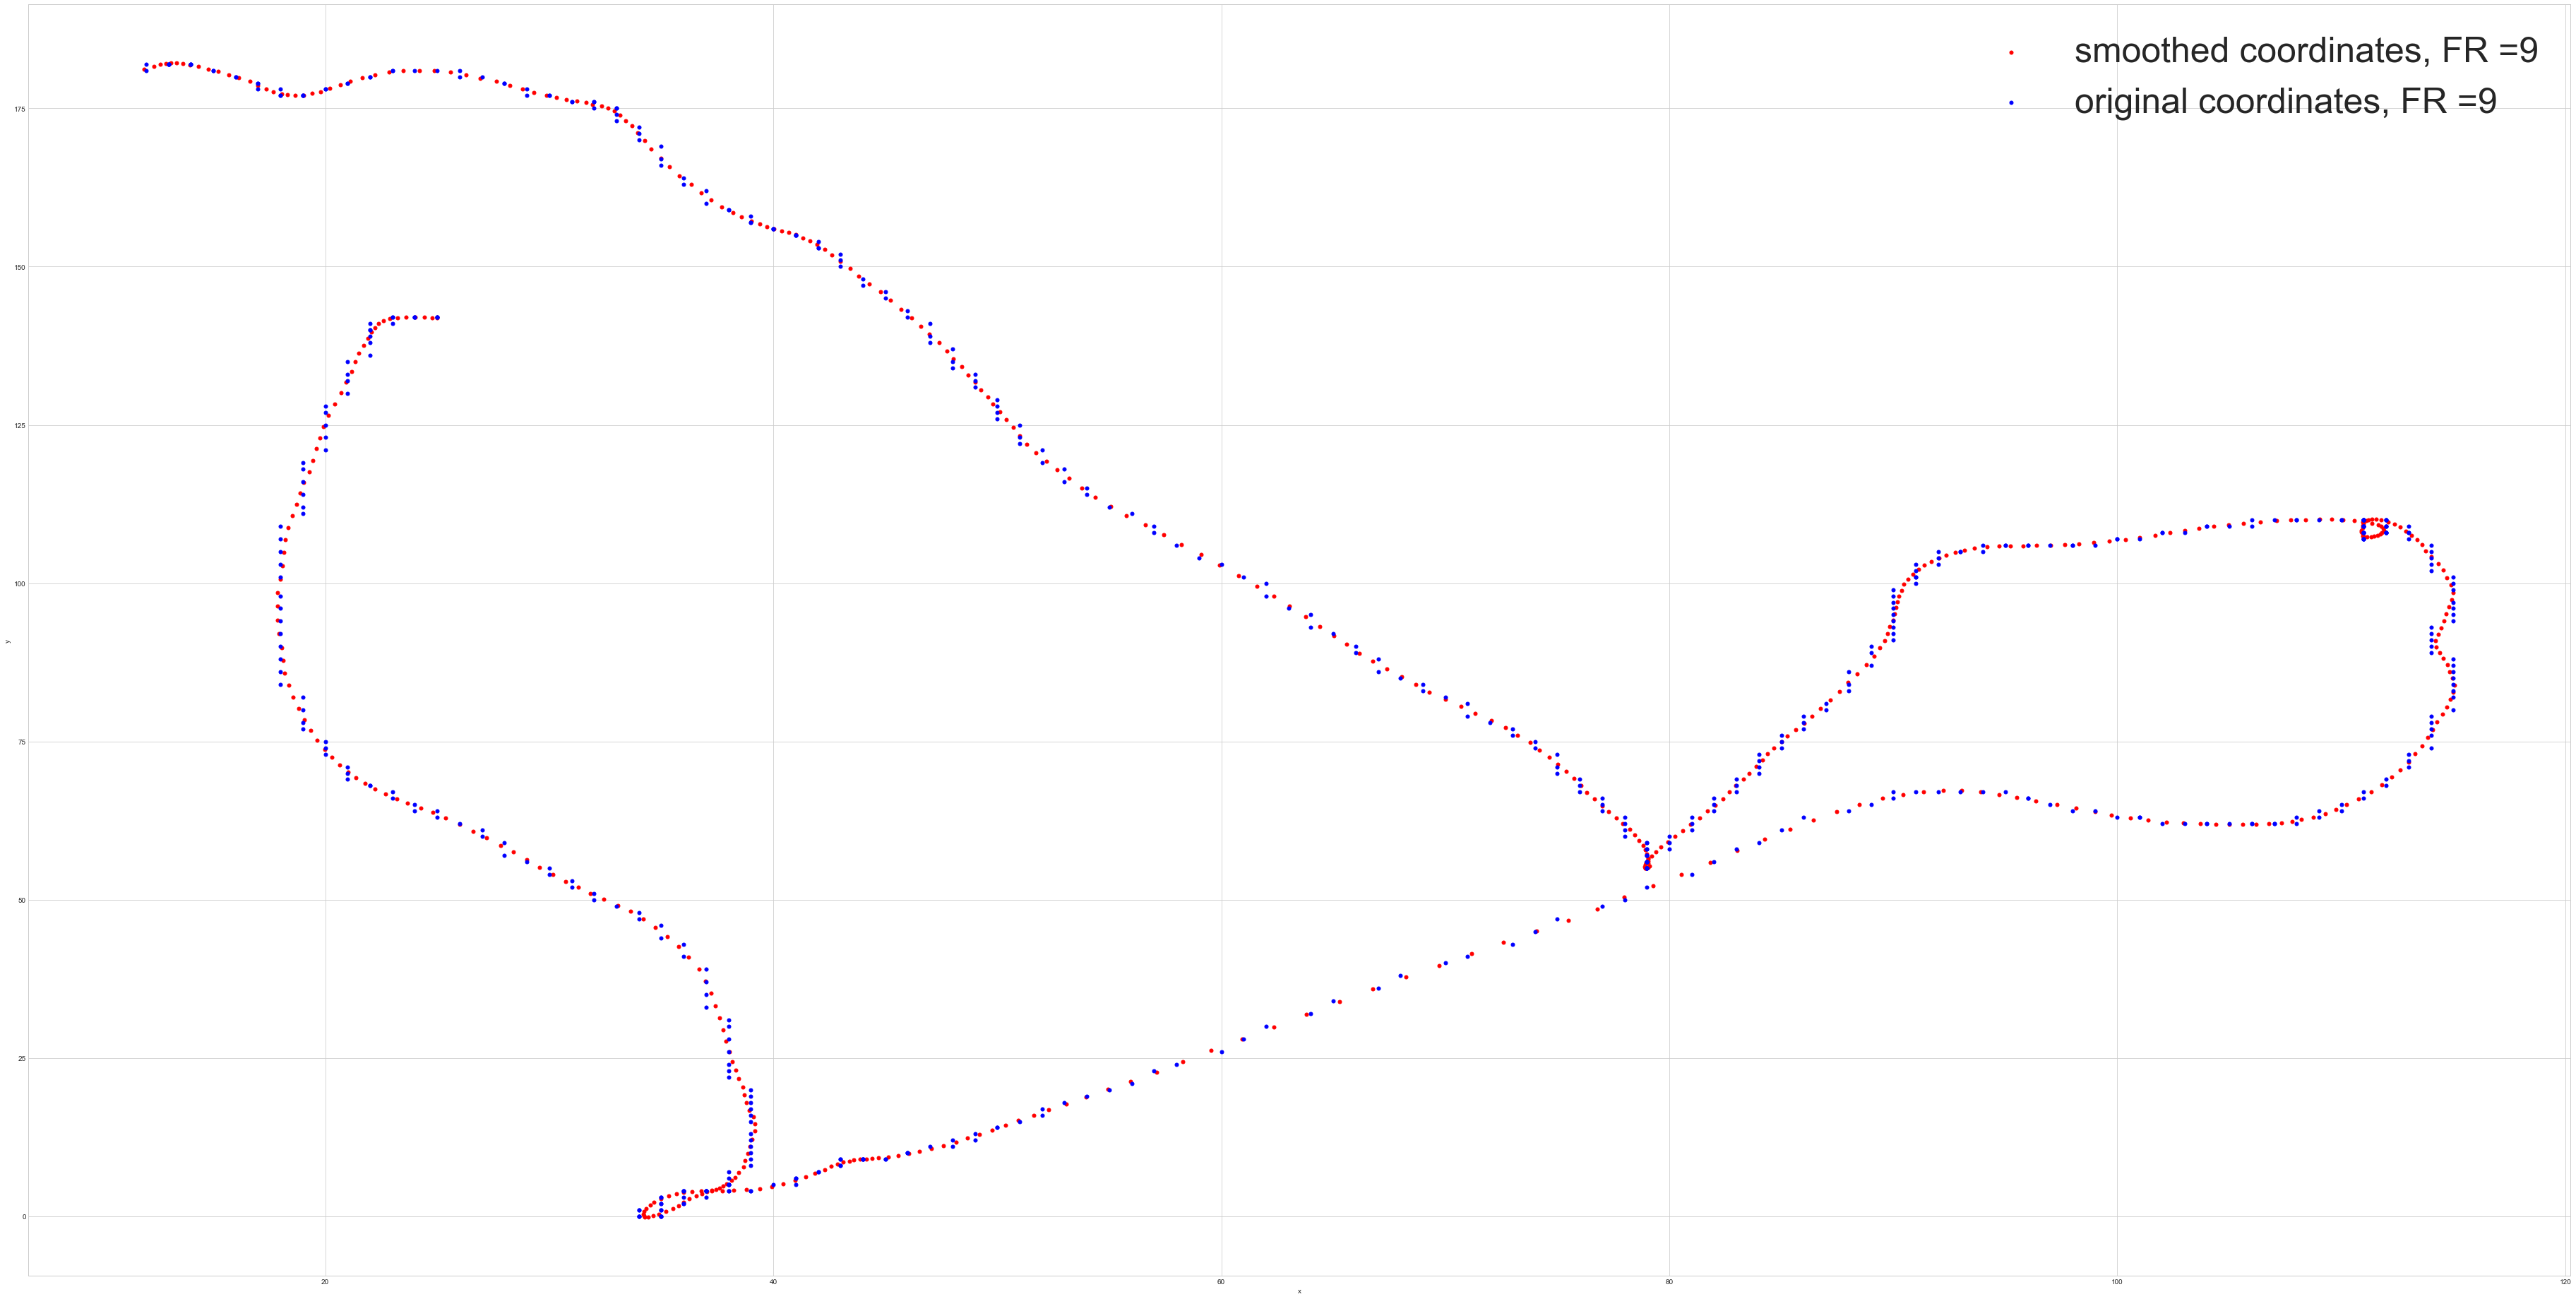

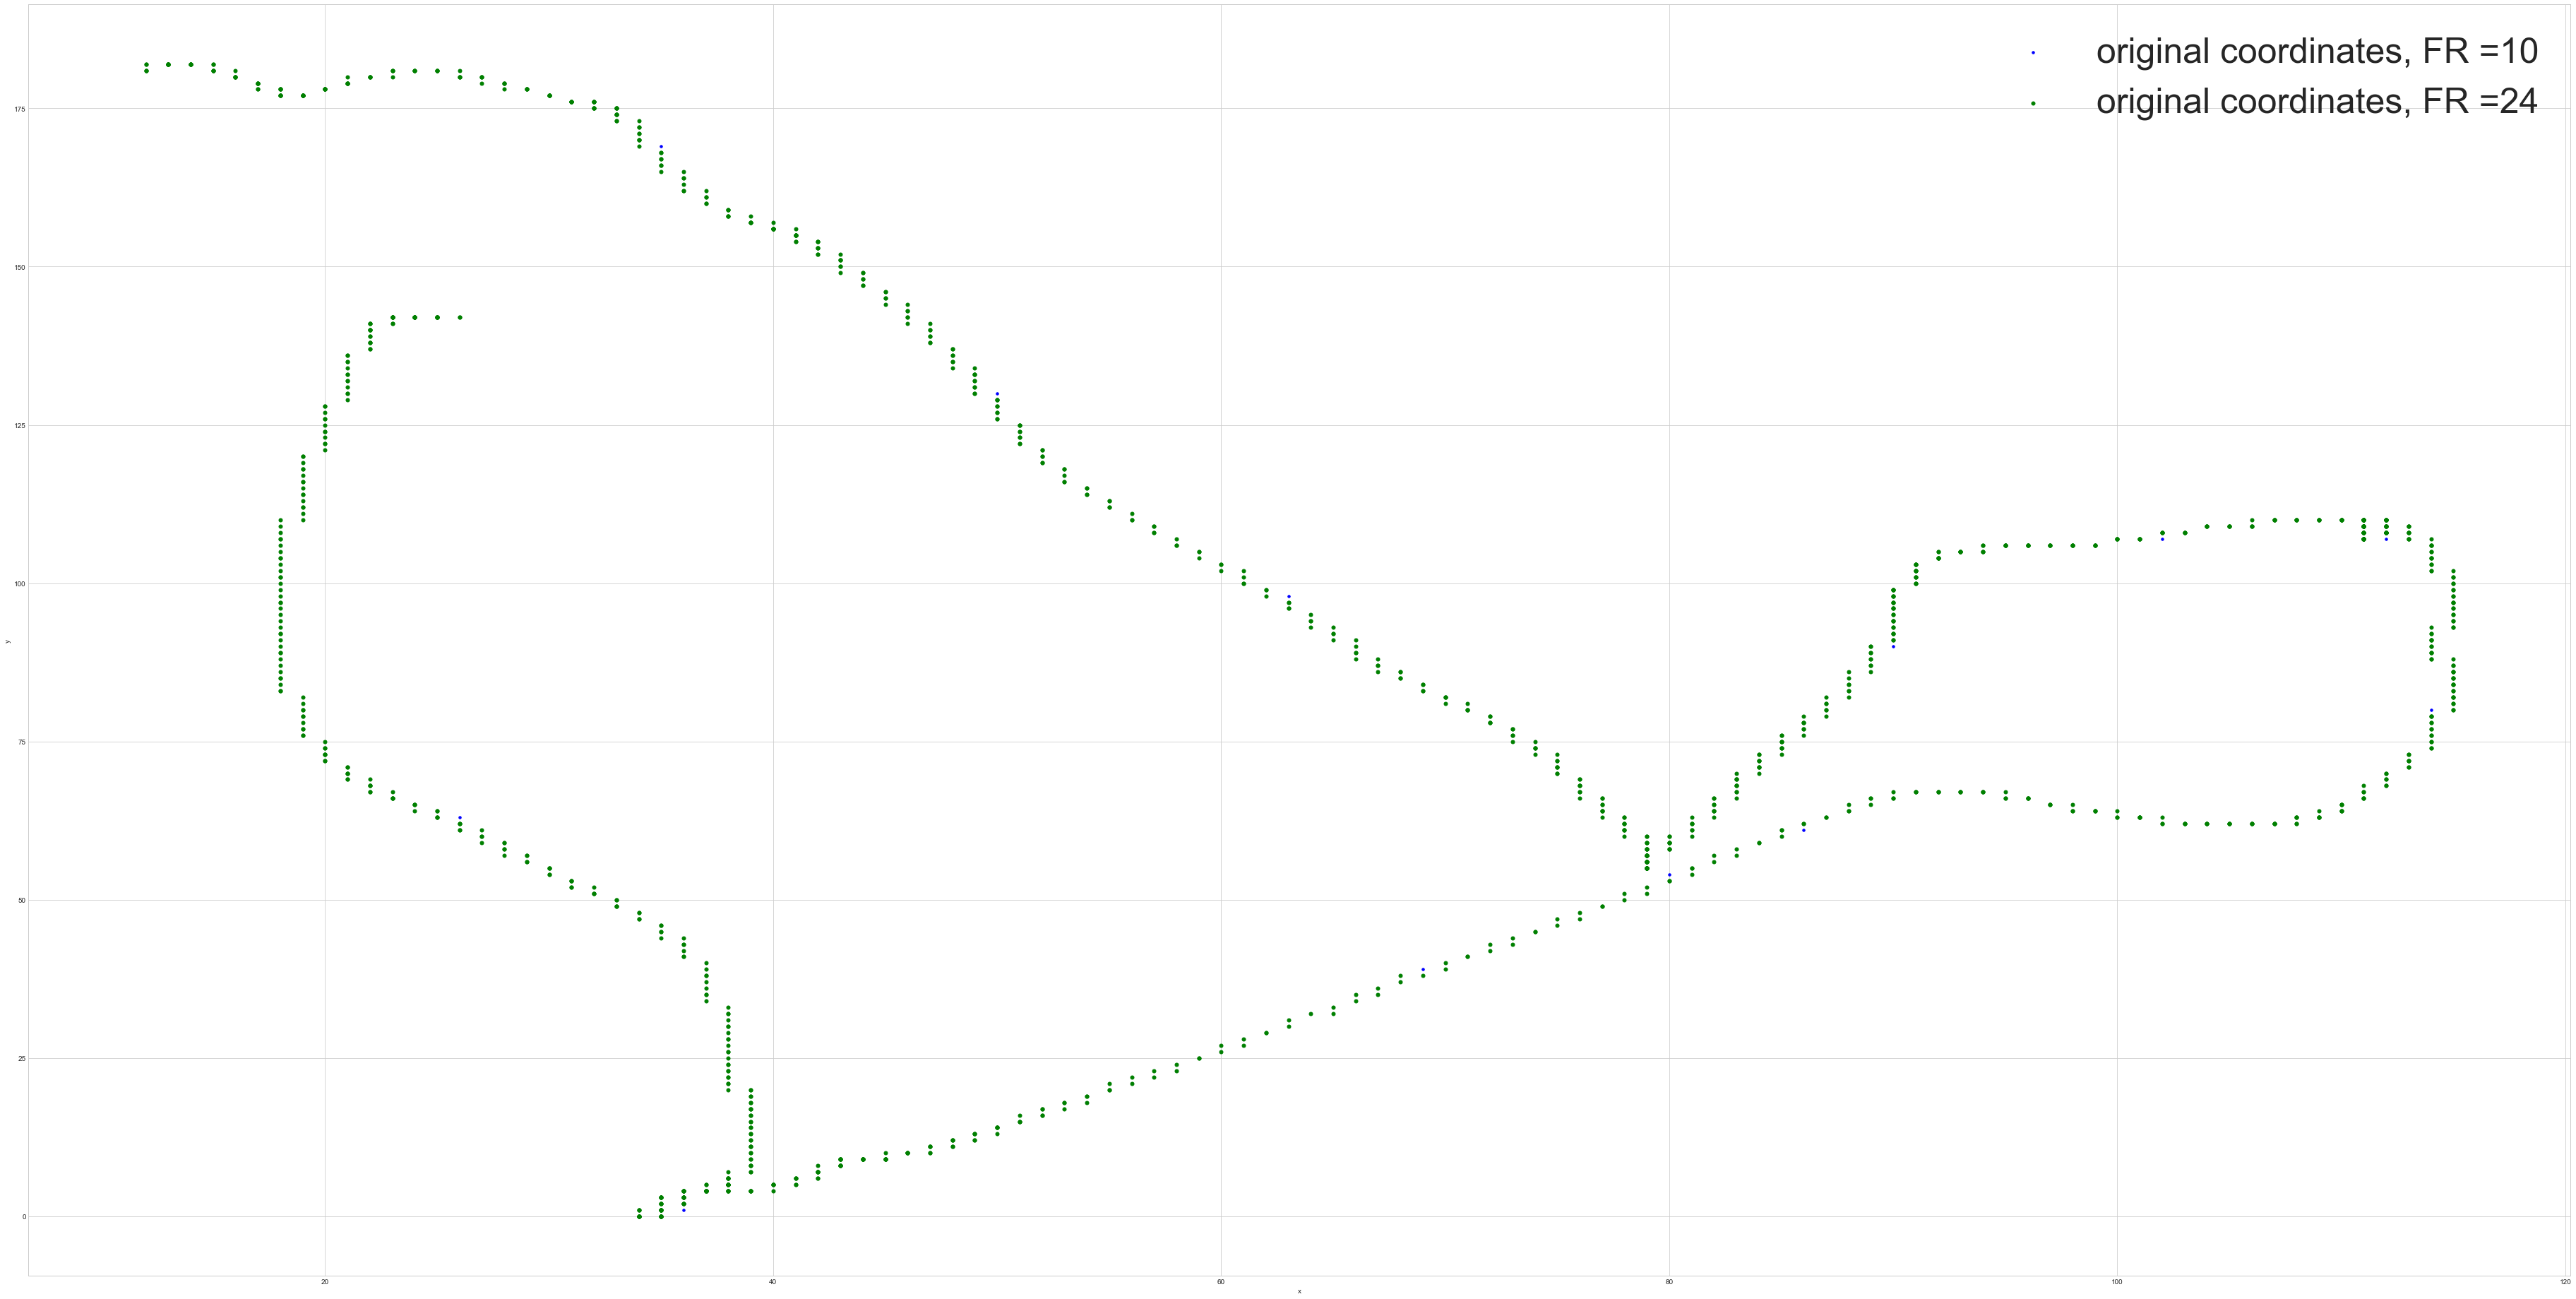

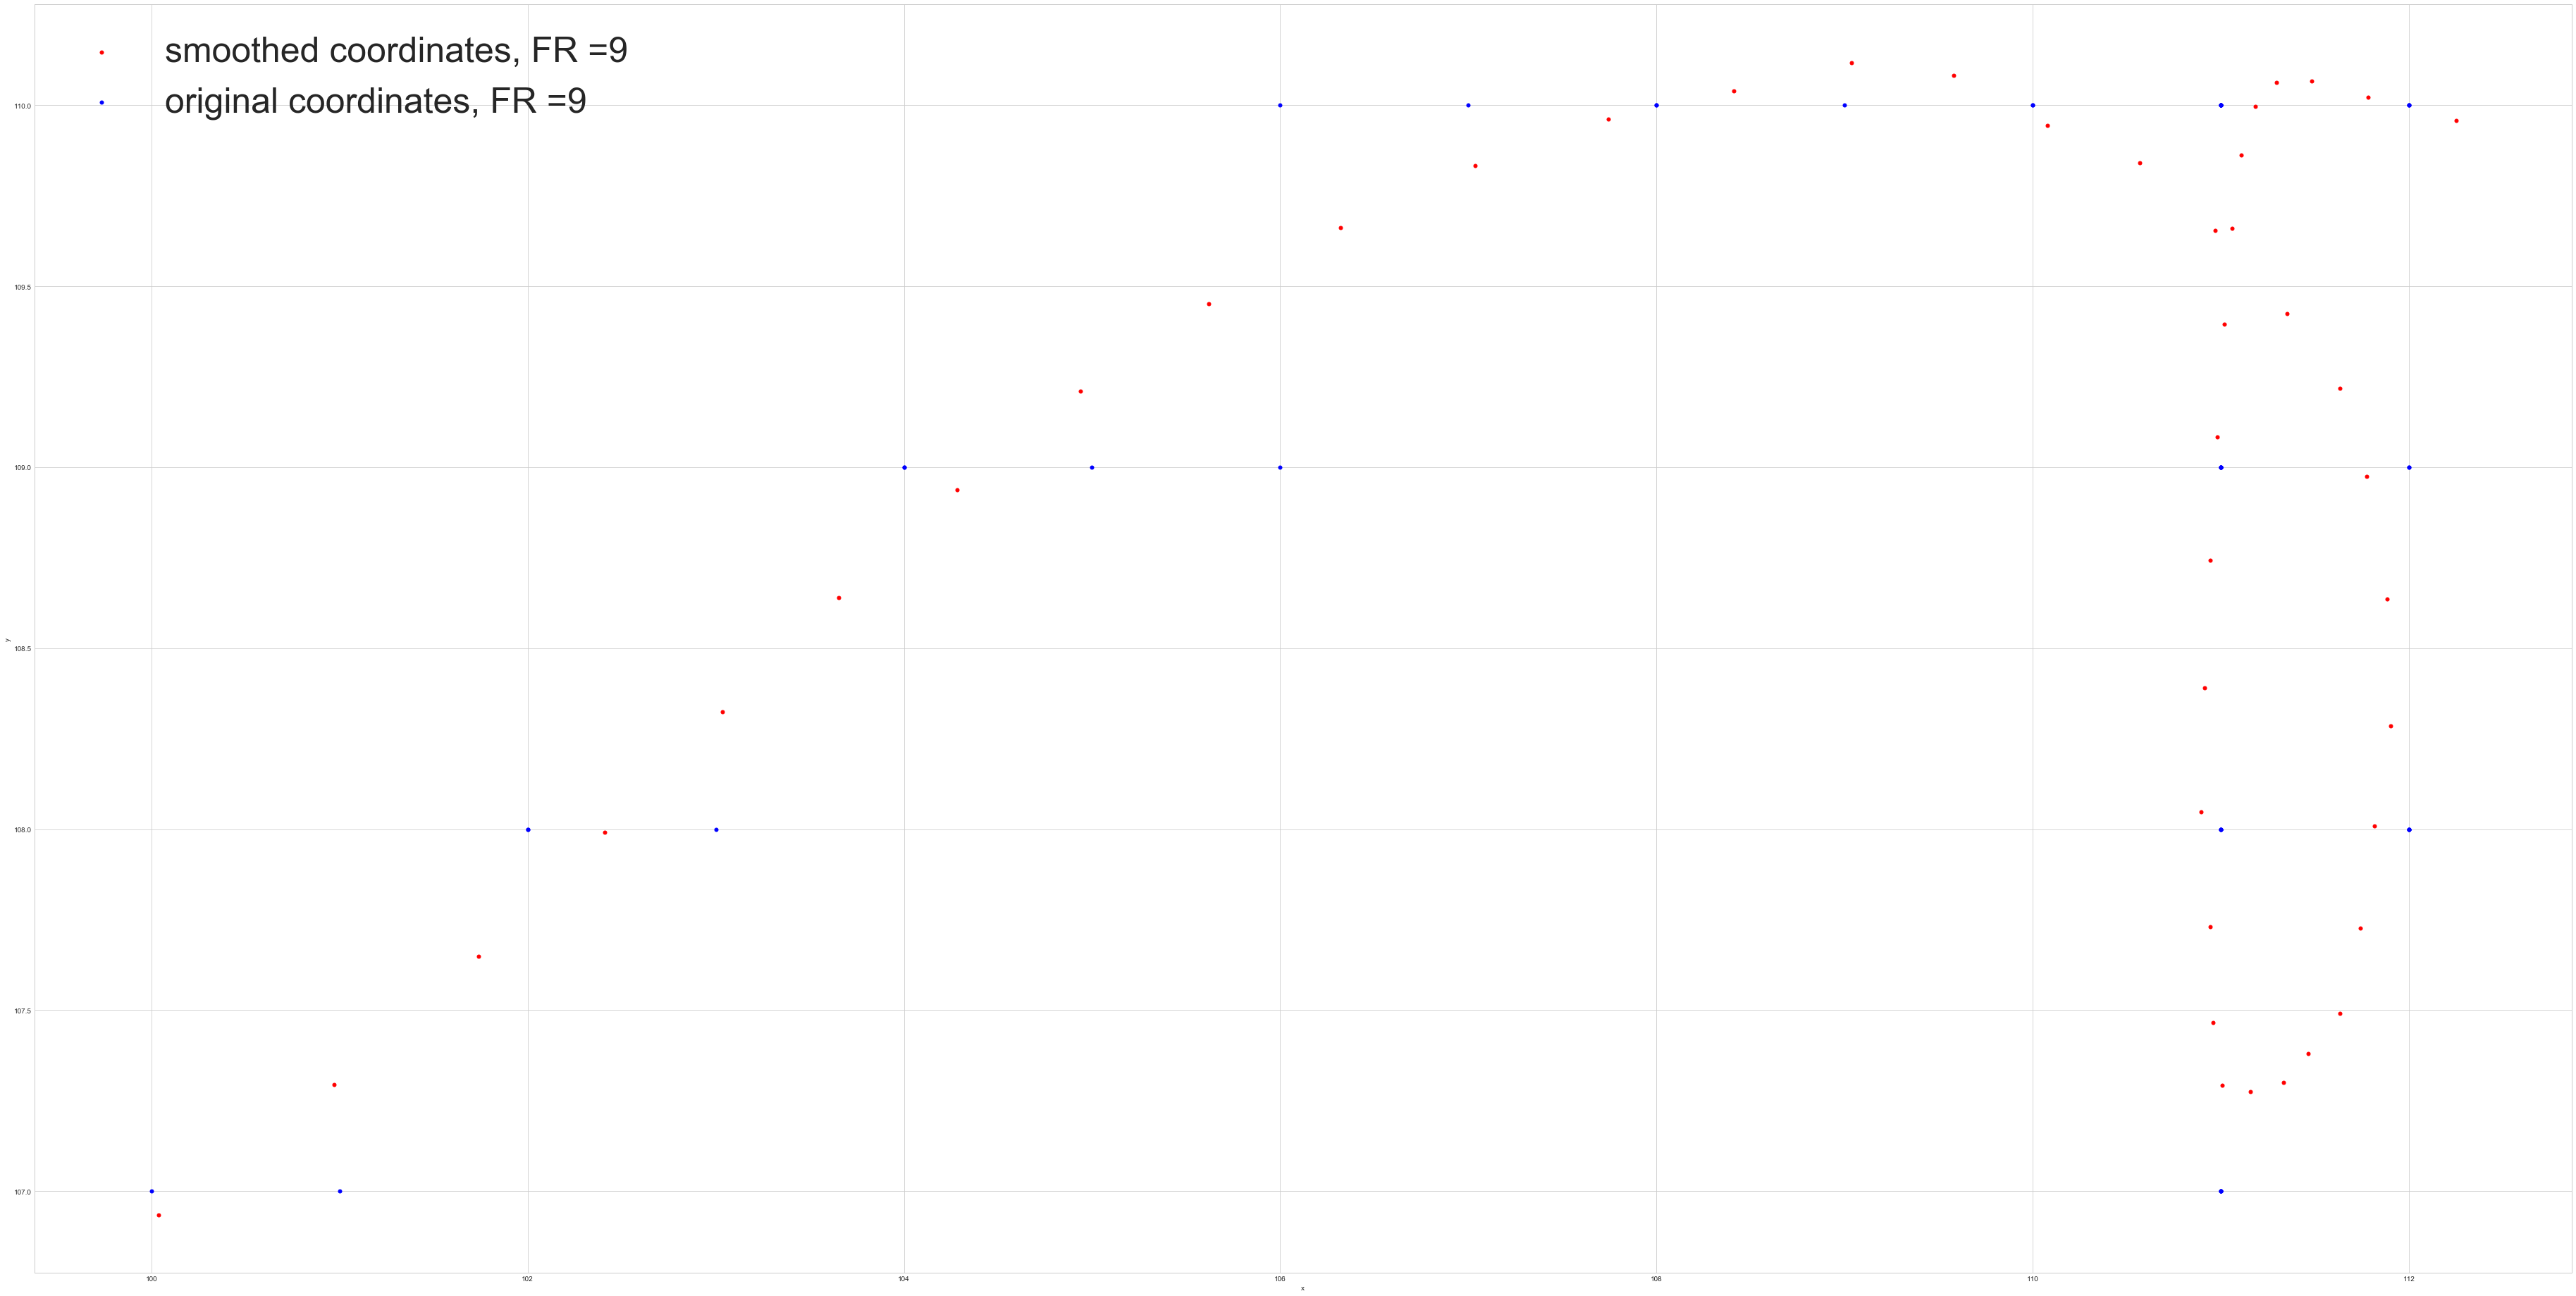

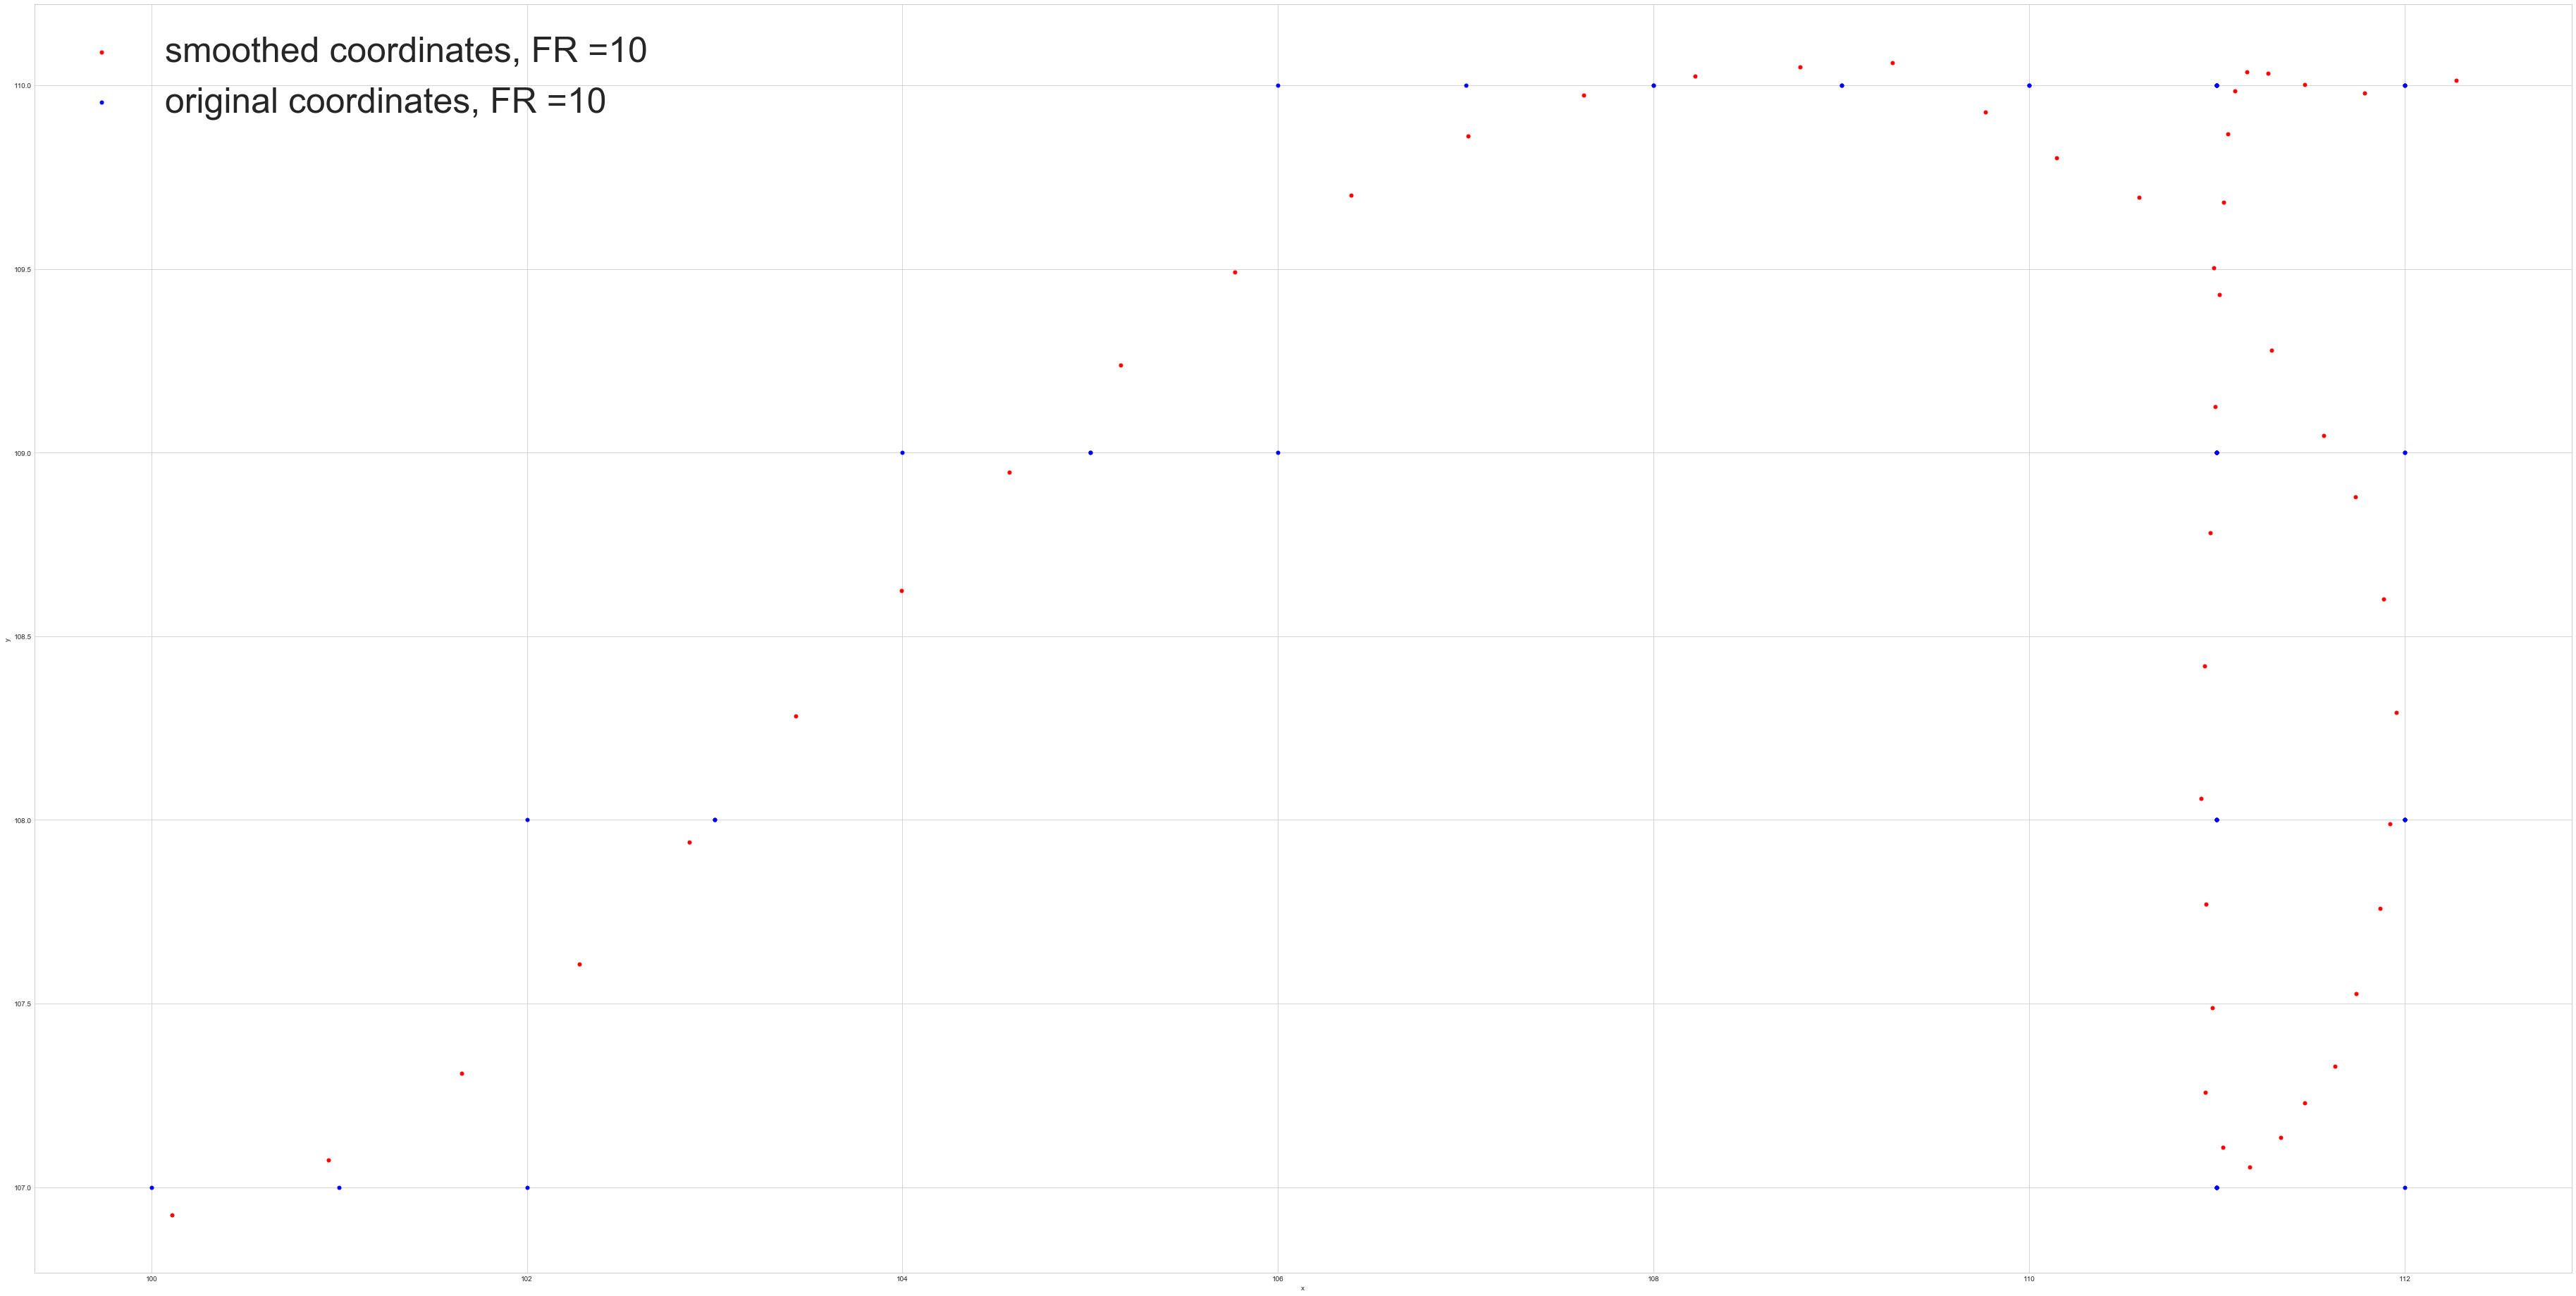

In [13]:
#curve 28 FR=10: the curve alignment plot shows differences, for fr = 10 curvature is 
#consistently lower by several centimal points comparing to fr = ctrl (24)

plotting_fun_for_curves.PlotCurve(28, 10, mode = 'both')
plotting_fun_for_curves.PlotCurve(28, 24, mode = 'both')
plotting_fun_for_curves.PlotCurve(28, 9, mode = 'both')
plotting_fun_for_curves.PlotCurve(28, 10, mode = 'original', FR2 = 24)

#original plots look almost the same, there are just more overlapping points for pairs of x and y coordinates for fr=24
#but smoothed curves are different and the one for fr = 24 is smoother

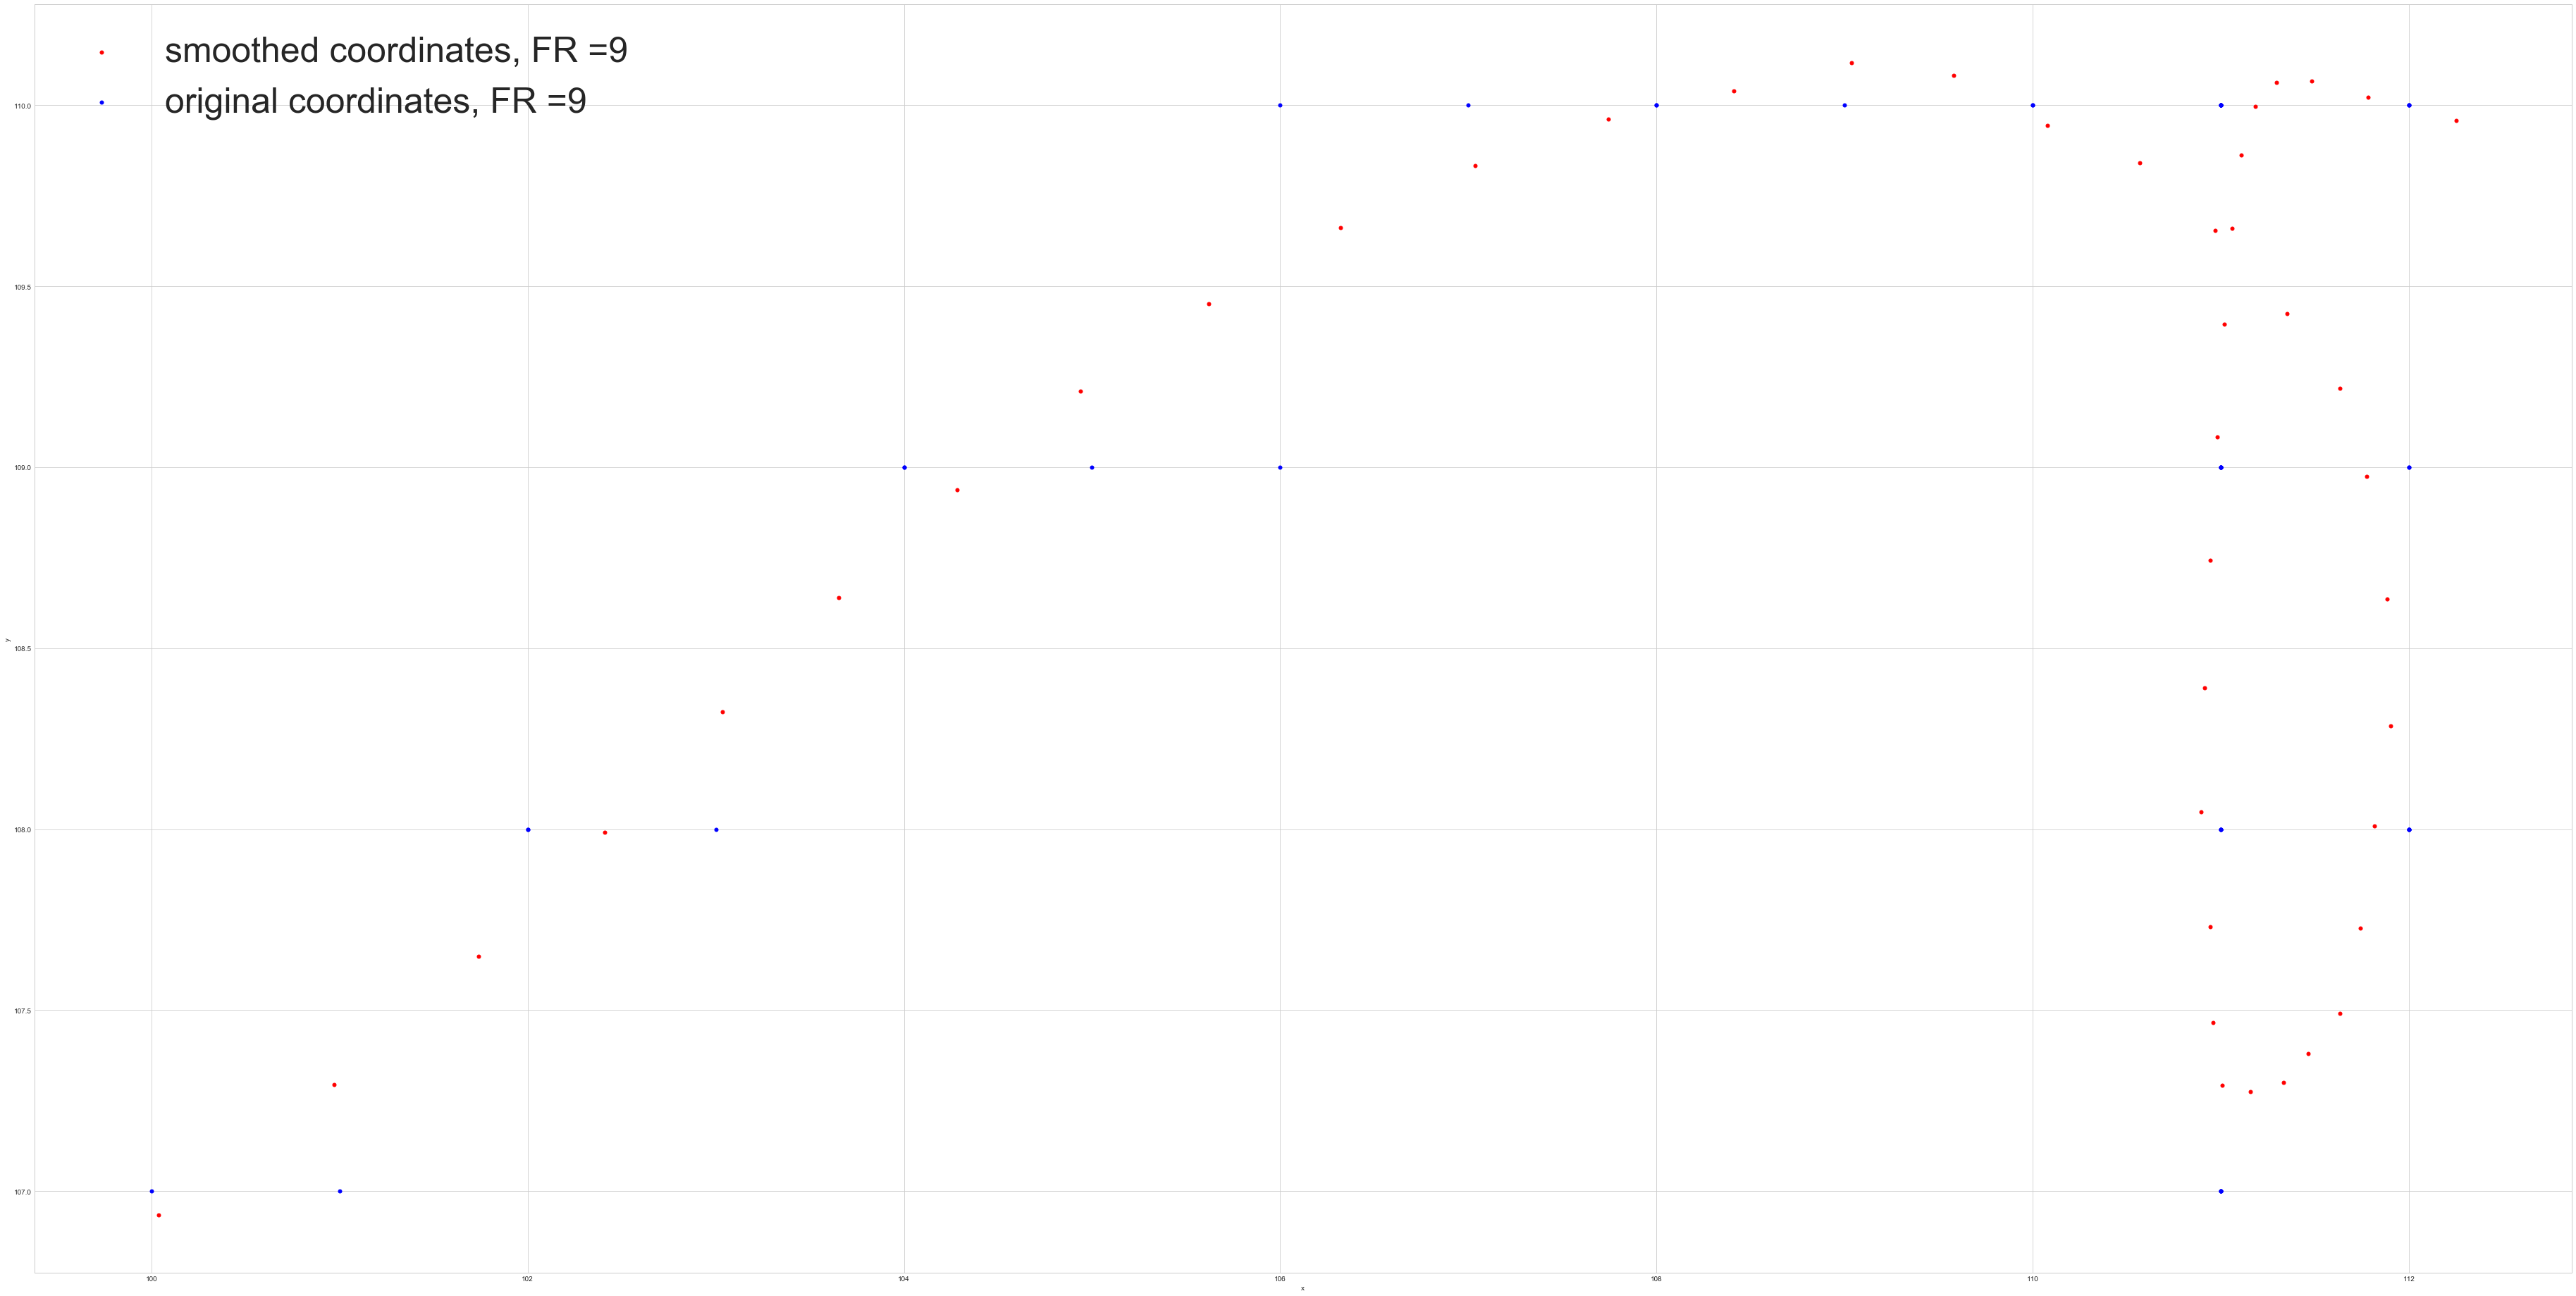

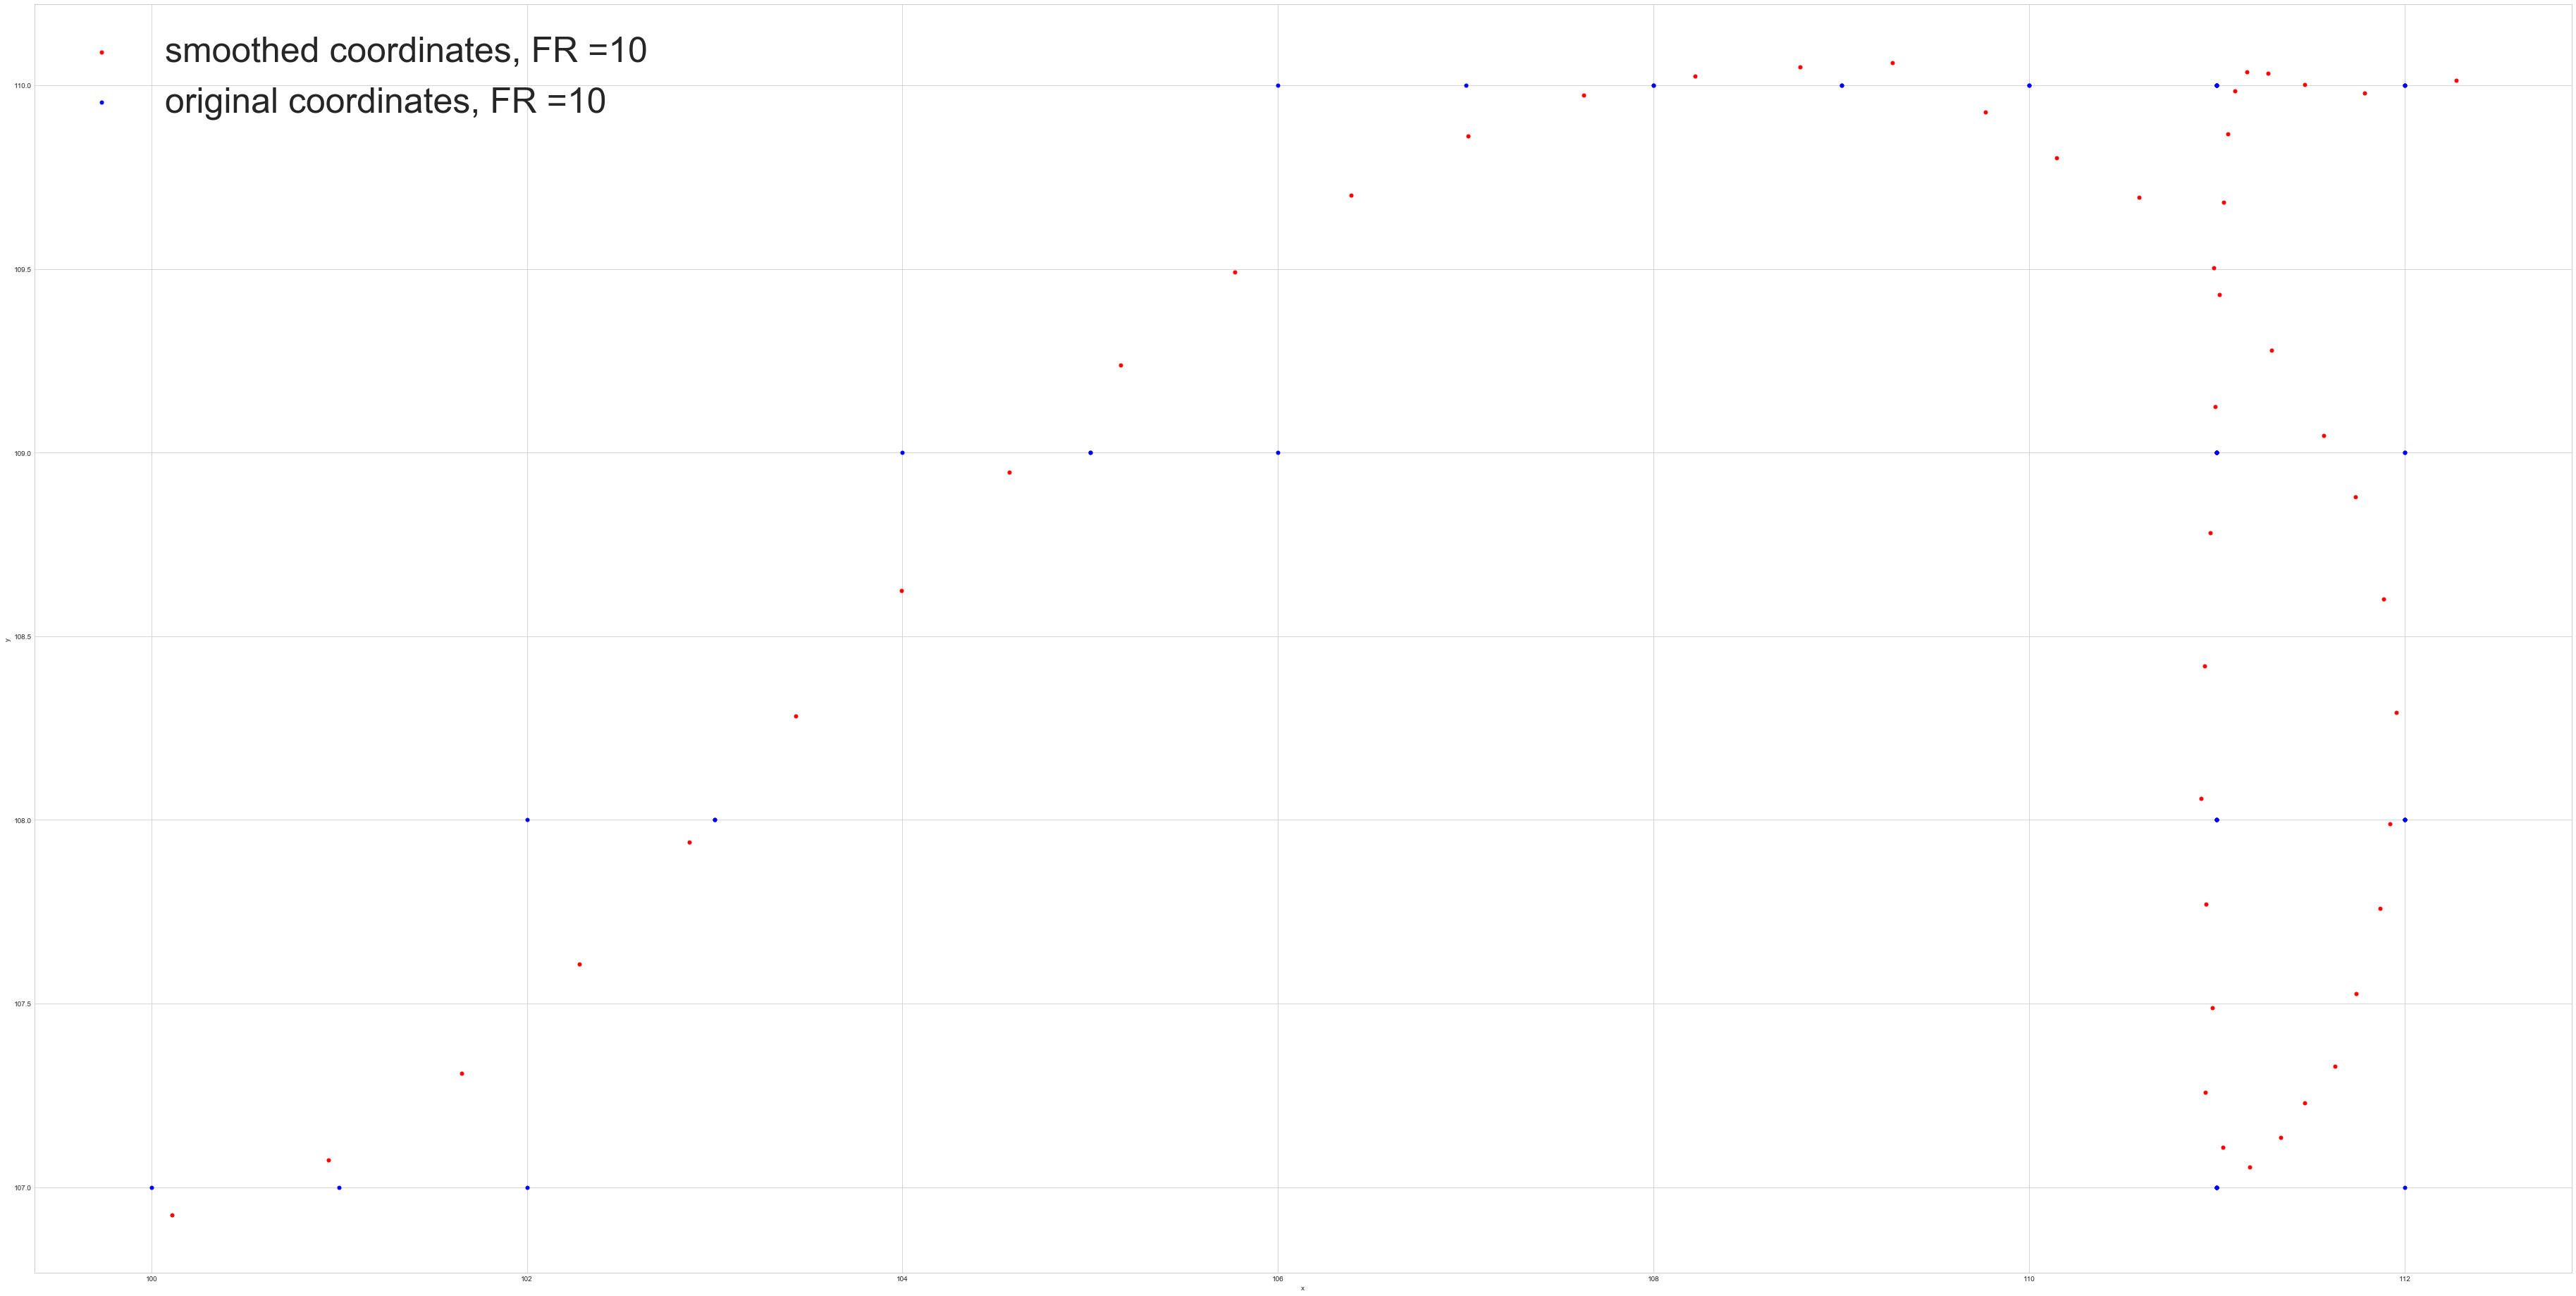

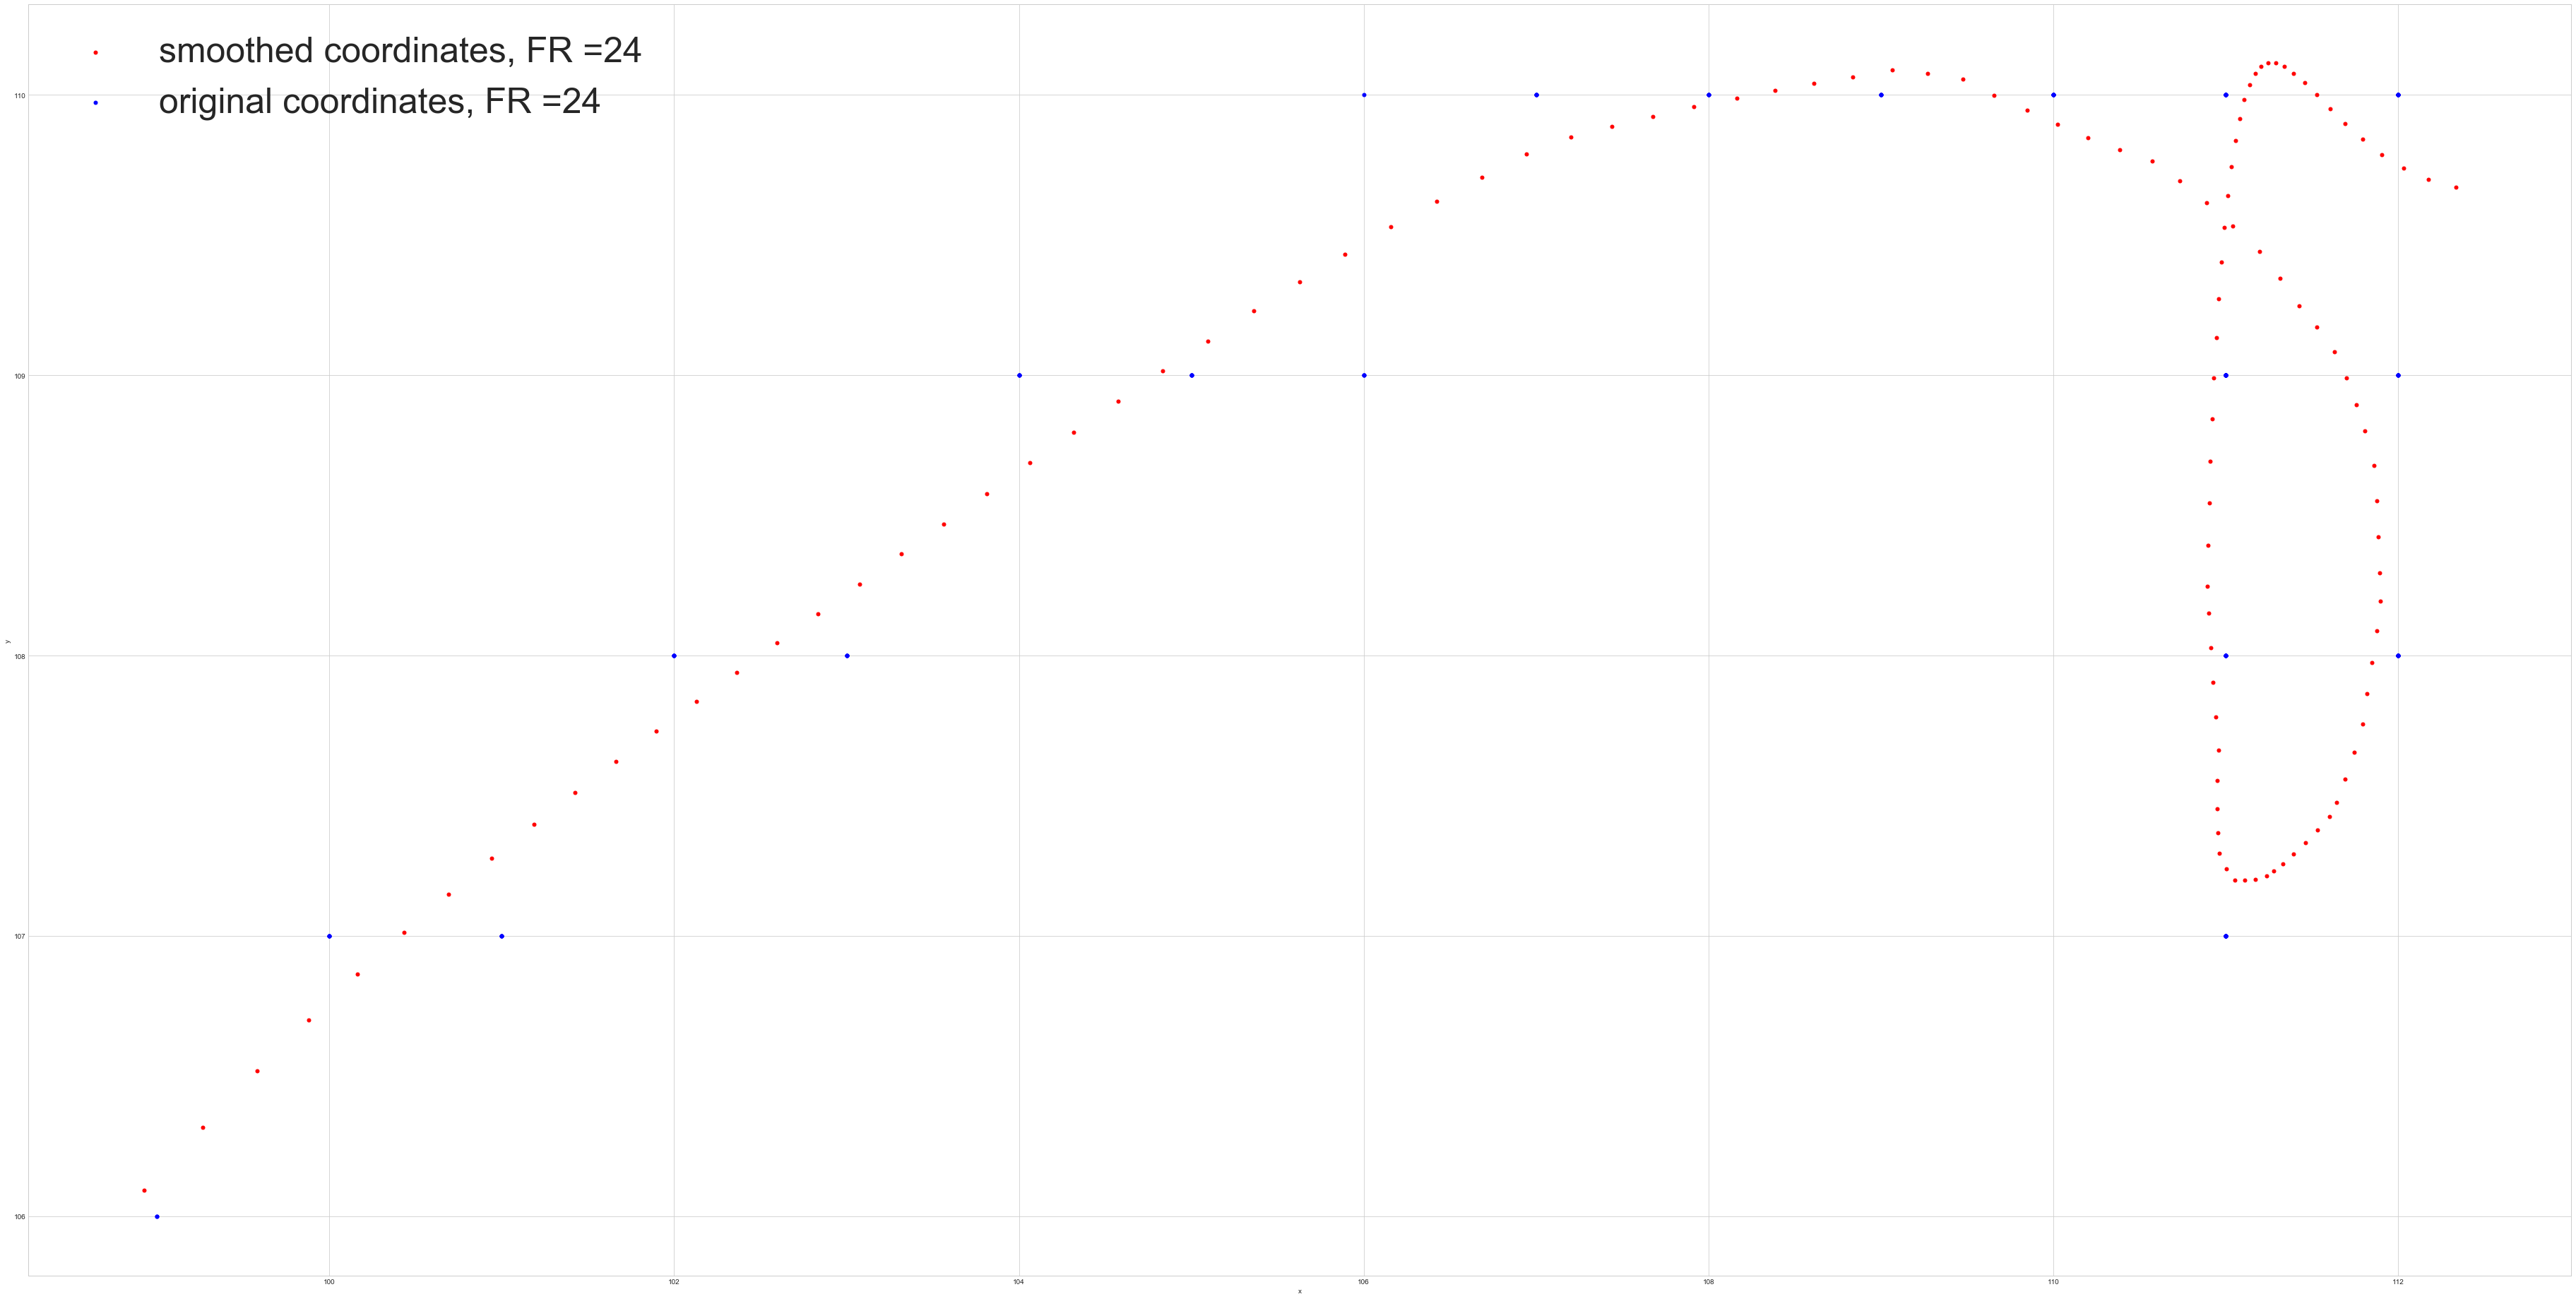

In [17]:
#why is there a big jump from fr = 9, for velocity-curvature alignment there's a dip for fr 250-300 (in fr=10 curve)
plotting_fun_for_curves.PlotCurve(28, 9, mode = 'both', zoom_in_for_fr_range = range(225,270))
plotting_fun_for_curves.PlotCurve(28, 10, mode = 'both', zoom_in_for_fr_range = range(250,300))
plotting_fun_for_curves.PlotCurve(28, 24, mode = 'both', zoom_in_for_fr_range = range(595,719))
#for fr = 10 the bottom of the loop looks sharp (unlike for fr = 9 and fr = 24)
#the minimum;/bottom of the loop is bounded by two points for fr = 10, and only one blue point for fr=9, 24
#blue ponits are overlapping, so for fr = 9, 20 they were overlapping and for fr = 10 there are two distinct points

In [23]:
info_file_low = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_lower/CRV_28.json"
info_file_high = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_higher/CRV_28.json"
animals_low = locomotion.getAnimalObjs( info_file_low )
animals_high = locomotion.getAnimalObjs( info_file_high )
#for a in animals_low:
#    locomotion.trajectory.getCurveData( a )
#for a in animals_high:
#    locomotion.trajectory.getCurveData( a )
    
curve_28_fr10 = locomotion.trajectory.getCurveData(animals_low[5])
curve_28_fr28 = locomotion.trajectory.getCurveData(animals_high[3])
curve_28_fr44 = locomotion.trajectory.getCurveData(animals_high[11])
curve_28_fr48 = locomotion.trajectory.getCurveData(animals_high[13])
curve_28_fr60 = locomotion.trajectory.getCurveData(animals_high[19])

LOG: Extracting coordinates for Animal CRV_28_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_28_TEST_00...
LOG: Extracting coordinates for Animal CRV_28_TEST_01...
LOG: Extracting coordinates for Animal CRV_28_TEST_02...
LOG: Extracting coordinates for Animal CRV_28_TEST_03...
LOG: Extracting coordinates for Animal CRV_28_TEST_04...
LOG: Extracting coordinates for Animal CRV_28_TEST_05...
LOG: Extracting coordinates for Animal CRV_28_TEST_06...
LOG: Extracting coordinates for Animal CRV_28_TEST_07...
LOG: Extracting coordinates for Animal CRV_28_TEST_08...
LOG: Extracting coordinates for Animal CRV_28_TEST_09...
LOG: Extracting coordinates for Animal CRV_28_TEST_10...
LOG: Extracting coordinates for Animal CRV_28_TEST_11...
LOG: Extracting coordinates for Animal CRV_28_TEST_12...
LOG: Extracting coordinates for Animal CRV_28_TEST_13...
LOG: Extracting coordinates for Animal CRV_28_TEST_14...
LOG: Extracting coordinates for Animal CRV_28_TEST_15...
LOG: Extracting coordinates f

In [4]:
curve28_fr10 = plotting_fun_for_curves.getCurveData(28, 10)

In [5]:
curve28_fr10

Unnamed: 0   X    Y   X_smooth    Y_smooth        dx        dy       ddx  \
0             0  12  181  11.969962  181.239965  0.369658  0.392087 -0.052967   
1             1  12  182  12.339620  181.632051  0.316691  0.328499 -0.067101   
2             2  13  182  12.603344  181.896963  0.235457  0.214124 -0.059407   
3             3  13  182  12.810533  182.060300  0.197877  0.122051 -0.021202   
4             4  13  182  12.999097  182.141064  0.193054  0.046160  0.006700   
..          ...  ..  ...        ...         ...       ...       ...       ...   
595         595  24  142  24.329931  142.020365  0.253022 -0.031164  0.030857   
596         596  25  142  24.597461  141.986520  0.294837 -0.027485  0.056694   
597         597  25  142  24.919606  141.965395  0.366411 -0.006350  0.090850   
598         598  25  142  25.330283  141.973820  0.476537  0.030730  0.087993   
599         599  26  142  25.872679  142.026855  0.542396  0.053036  0.065859   

          ddy         V         C  
0   -0.063587  0.538868  0.017497  
1   -0.088981  0.456295  0.064598  
2   -0.103224  0.318259  0.359358  
3   -0.083982  0.232490  1.116497  
4   -0.070379  0.198496  1.776817  
..        ...       ...       ...  
595 -0.005543  0.254934  0.026606  
596  0.012407  0.296116  0.200899  
597  0.029108  0.366466  0.228430  
598  0.029693  0.477527  0.105112  
599  0.022306  0.544983  0.053165  

[600 rows x 11 columns]

In [6]:
curve28_fr9 = plotting_fun_for_curves.getCurveData(28, 9)

In [7]:
curve28_fr24 = plotting_fun_for_curves.getCurveData(28, 24)

269.0


(0, 4)

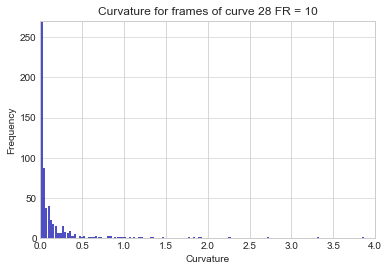

In [8]:
#run curvature statistics/histogram?
n, bins, patches = plt.hist(x= curve28_fr10['C'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Curvature')
plt.ylabel('Frequency')
plt.title('Curvature for frames of curve 28 FR = 10')
maxfreq = n.max()
print(maxfreq)
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(xmin = 0, xmax = 4)

(0, 4)

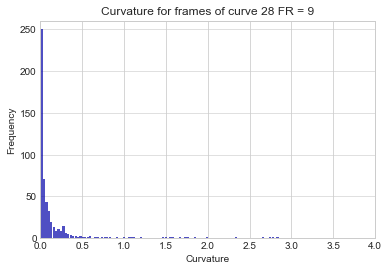

In [9]:
n, bins, patches = plt.hist(x= curve28_fr9['C'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Curvature')
plt.ylabel('Frequency')
plt.title('Curvature for frames of curve 28 FR = 9')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(xmin = 0, xmax = 4)

(0, 4)

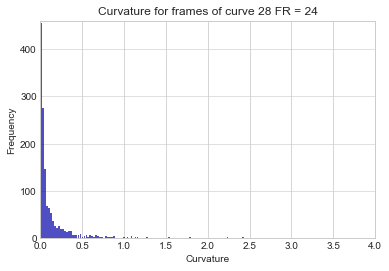

In [10]:
n, bins, patches = plt.hist(x= curve28_fr24['C'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Curvature')
plt.ylabel('Frequency')
plt.title('Curvature for frames of curve 28 FR = 24')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(xmin = 0, xmax = 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23d00790>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23cd9190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23cd90d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23d0ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23d00d50>],
 'means': []}

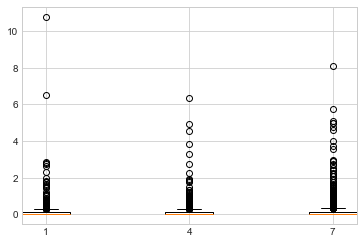

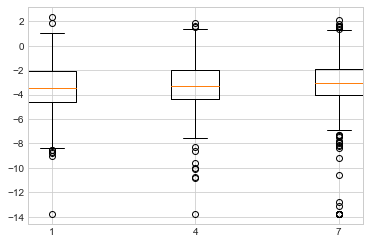

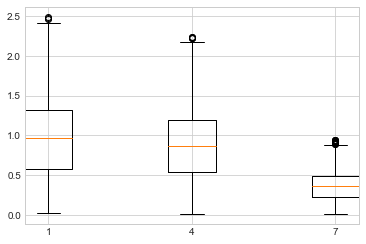

In [11]:
#Curvature alignment graphs show that fro curve 28 curvature for FR = 9 is better aligned with curvature of FR = 24 
#than FR = 10 is with FR = 24
#so we'd expect curvature for fr = 10 to be generally lower than for FR = 9, 24
fig, ax = plt.subplots()
ax.boxplot(curve28_fr9['C'], positions = [1], widths = 1) 
ax.boxplot(curve28_fr10['C'], positions = [4], widths = 1) 
ax.boxplot(curve28_fr24['C'], positions = [7], widths = 1) 

fig, ax = plt.subplots()
ax.boxplot(np.log(curve28_fr9['C']+0.000001), positions = [1], widths = 1) 
ax.boxplot(np.log(curve28_fr10['C']+0.000001), positions = [4], widths = 1) 
ax.boxplot(np.log(curve28_fr24['C']+0.000001), positions = [7], widths = 1) 

#boxplots for velocity
fig, ax = plt.subplots()
ax.boxplot(curve28_fr9['V'], positions = [1], widths = 1) 
ax.boxplot(curve28_fr10['V'], positions = [4], widths = 1) 
ax.boxplot(curve28_fr24['V'], positions = [7], widths = 1)

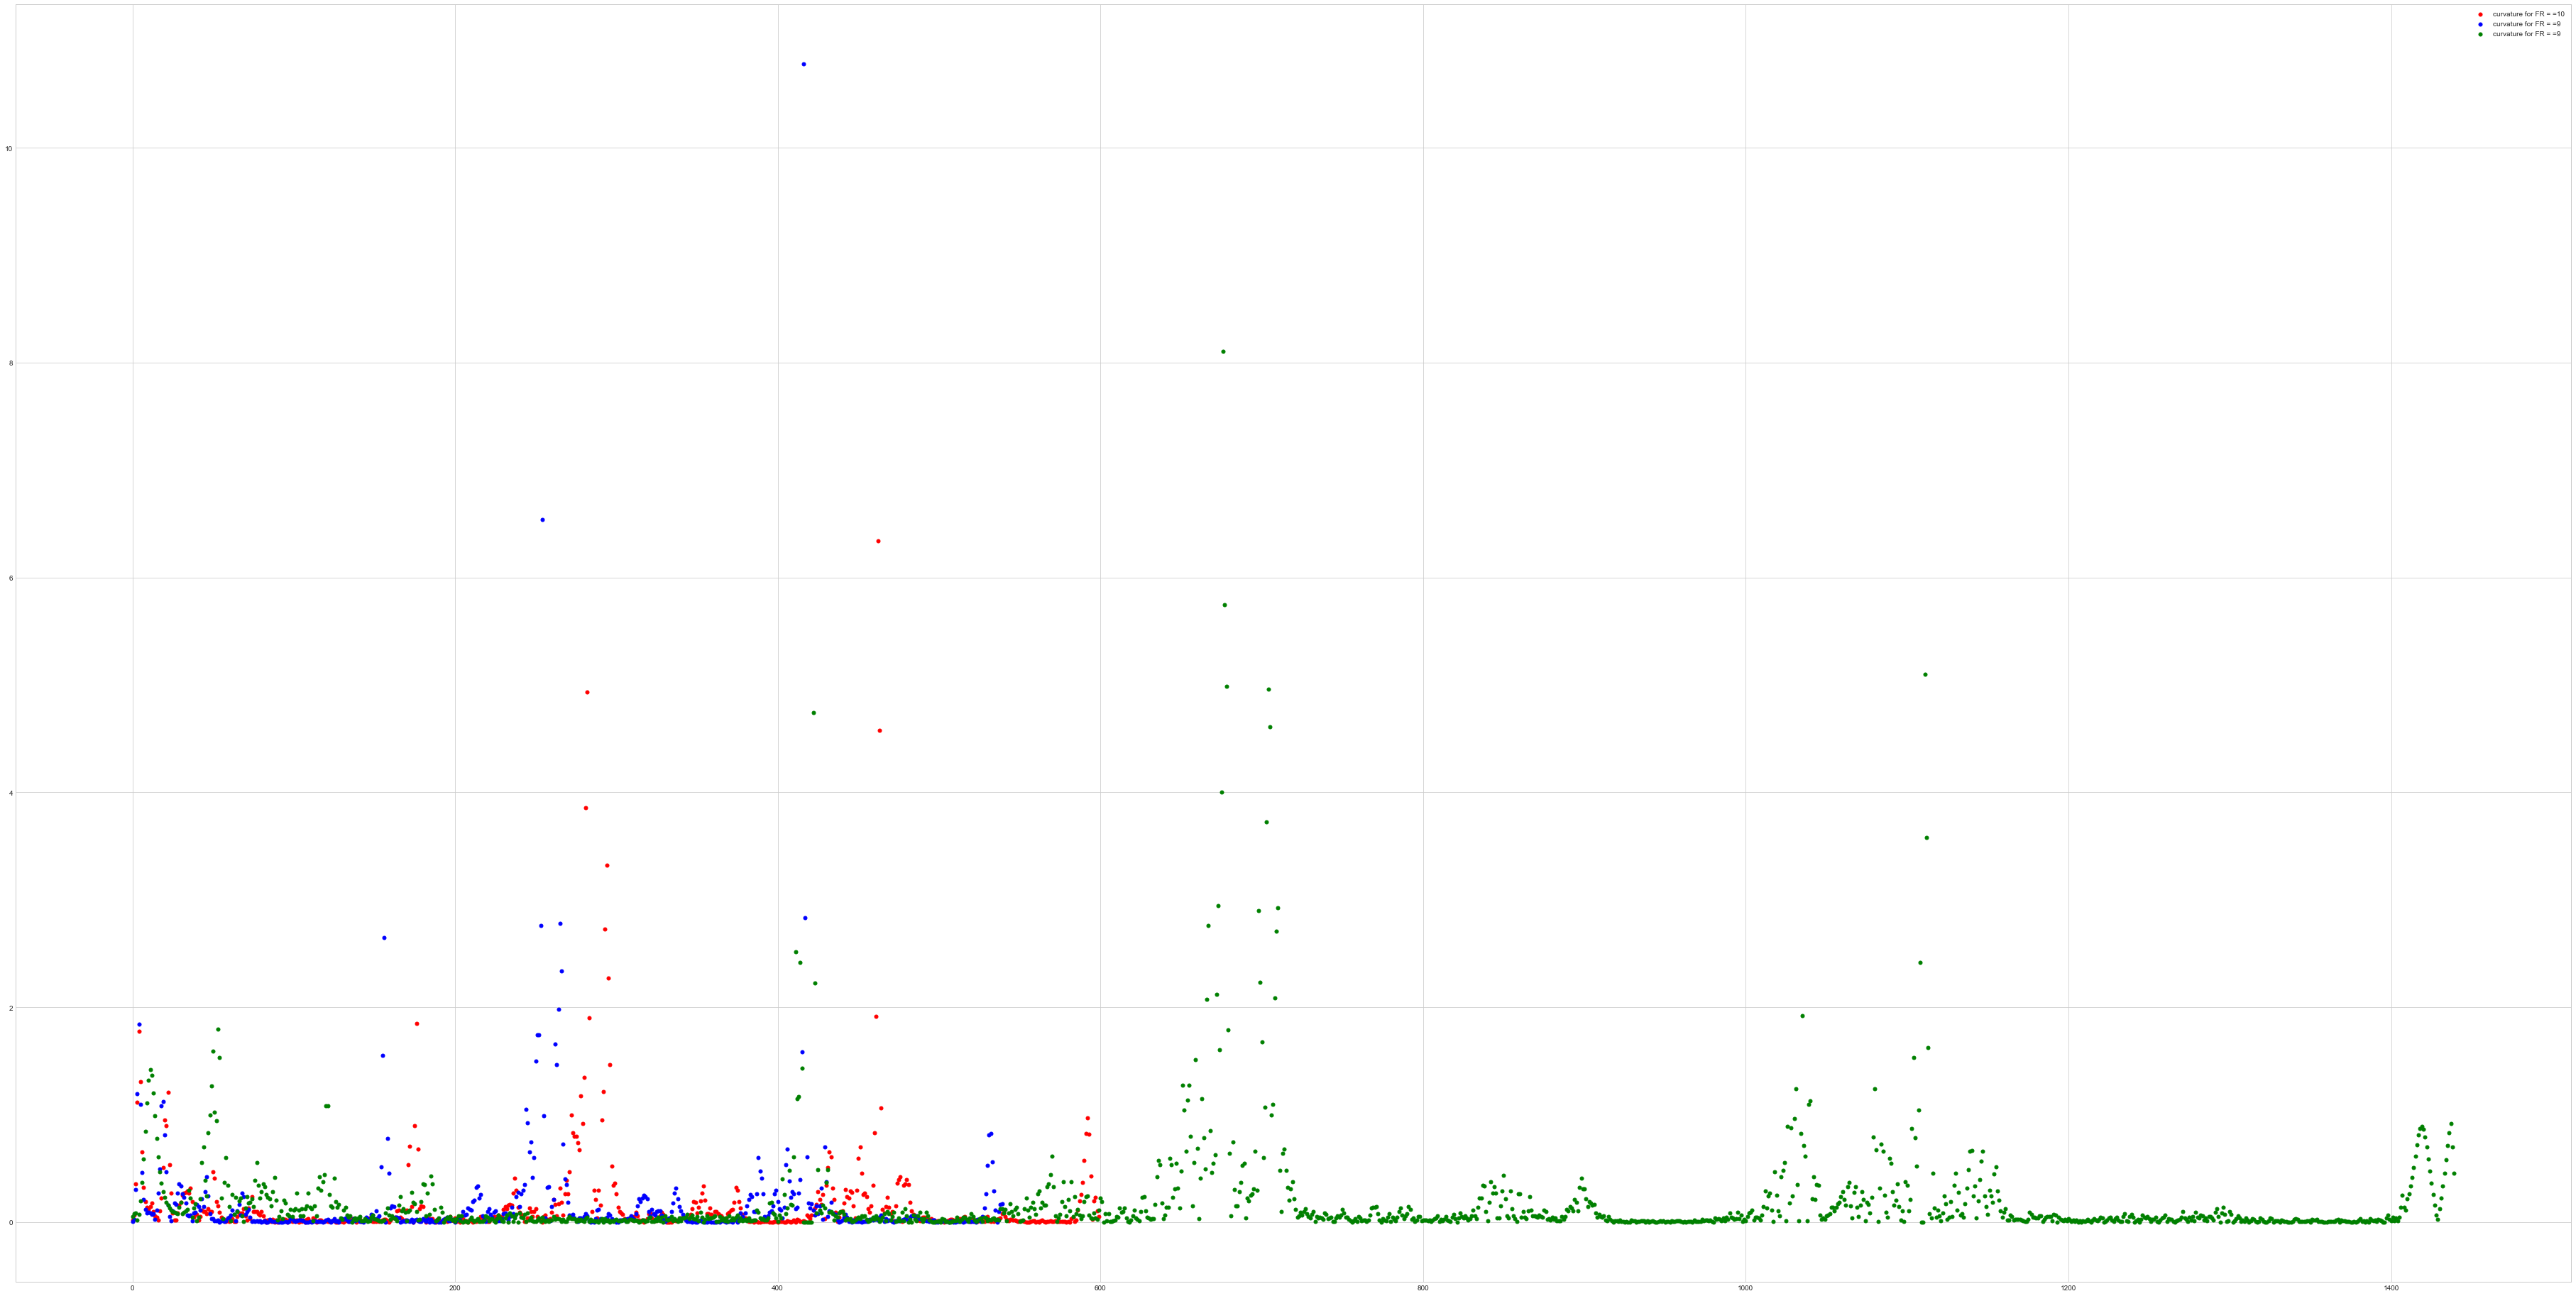

In [22]:
#conclusion: velocity distribution depends on FR
#curvature has similar distribution, what matters is how it varies at specific points
fig=plt.figure(figsize = (50,25))
ax=fig.add_axes([0,0,1,1])
ax.scatter(curve28_fr10['Unnamed: 0'], curve28_fr10['C'], color='r', s = 25, label = 'curvature for FR = =' + str(10))
ax.scatter(curve28_fr9['Unnamed: 0'], curve28_fr9['C'], color='b', s = 25, label = 'curvature for FR = =' + str(9))
ax.scatter(curve28_fr24['Unnamed: 0'], curve28_fr24['C'], color='g', s = 25, label = 'curvature for FR = =' + str(9))
plt.legend()
#red scatter has a few high points which can't be mapped to anything

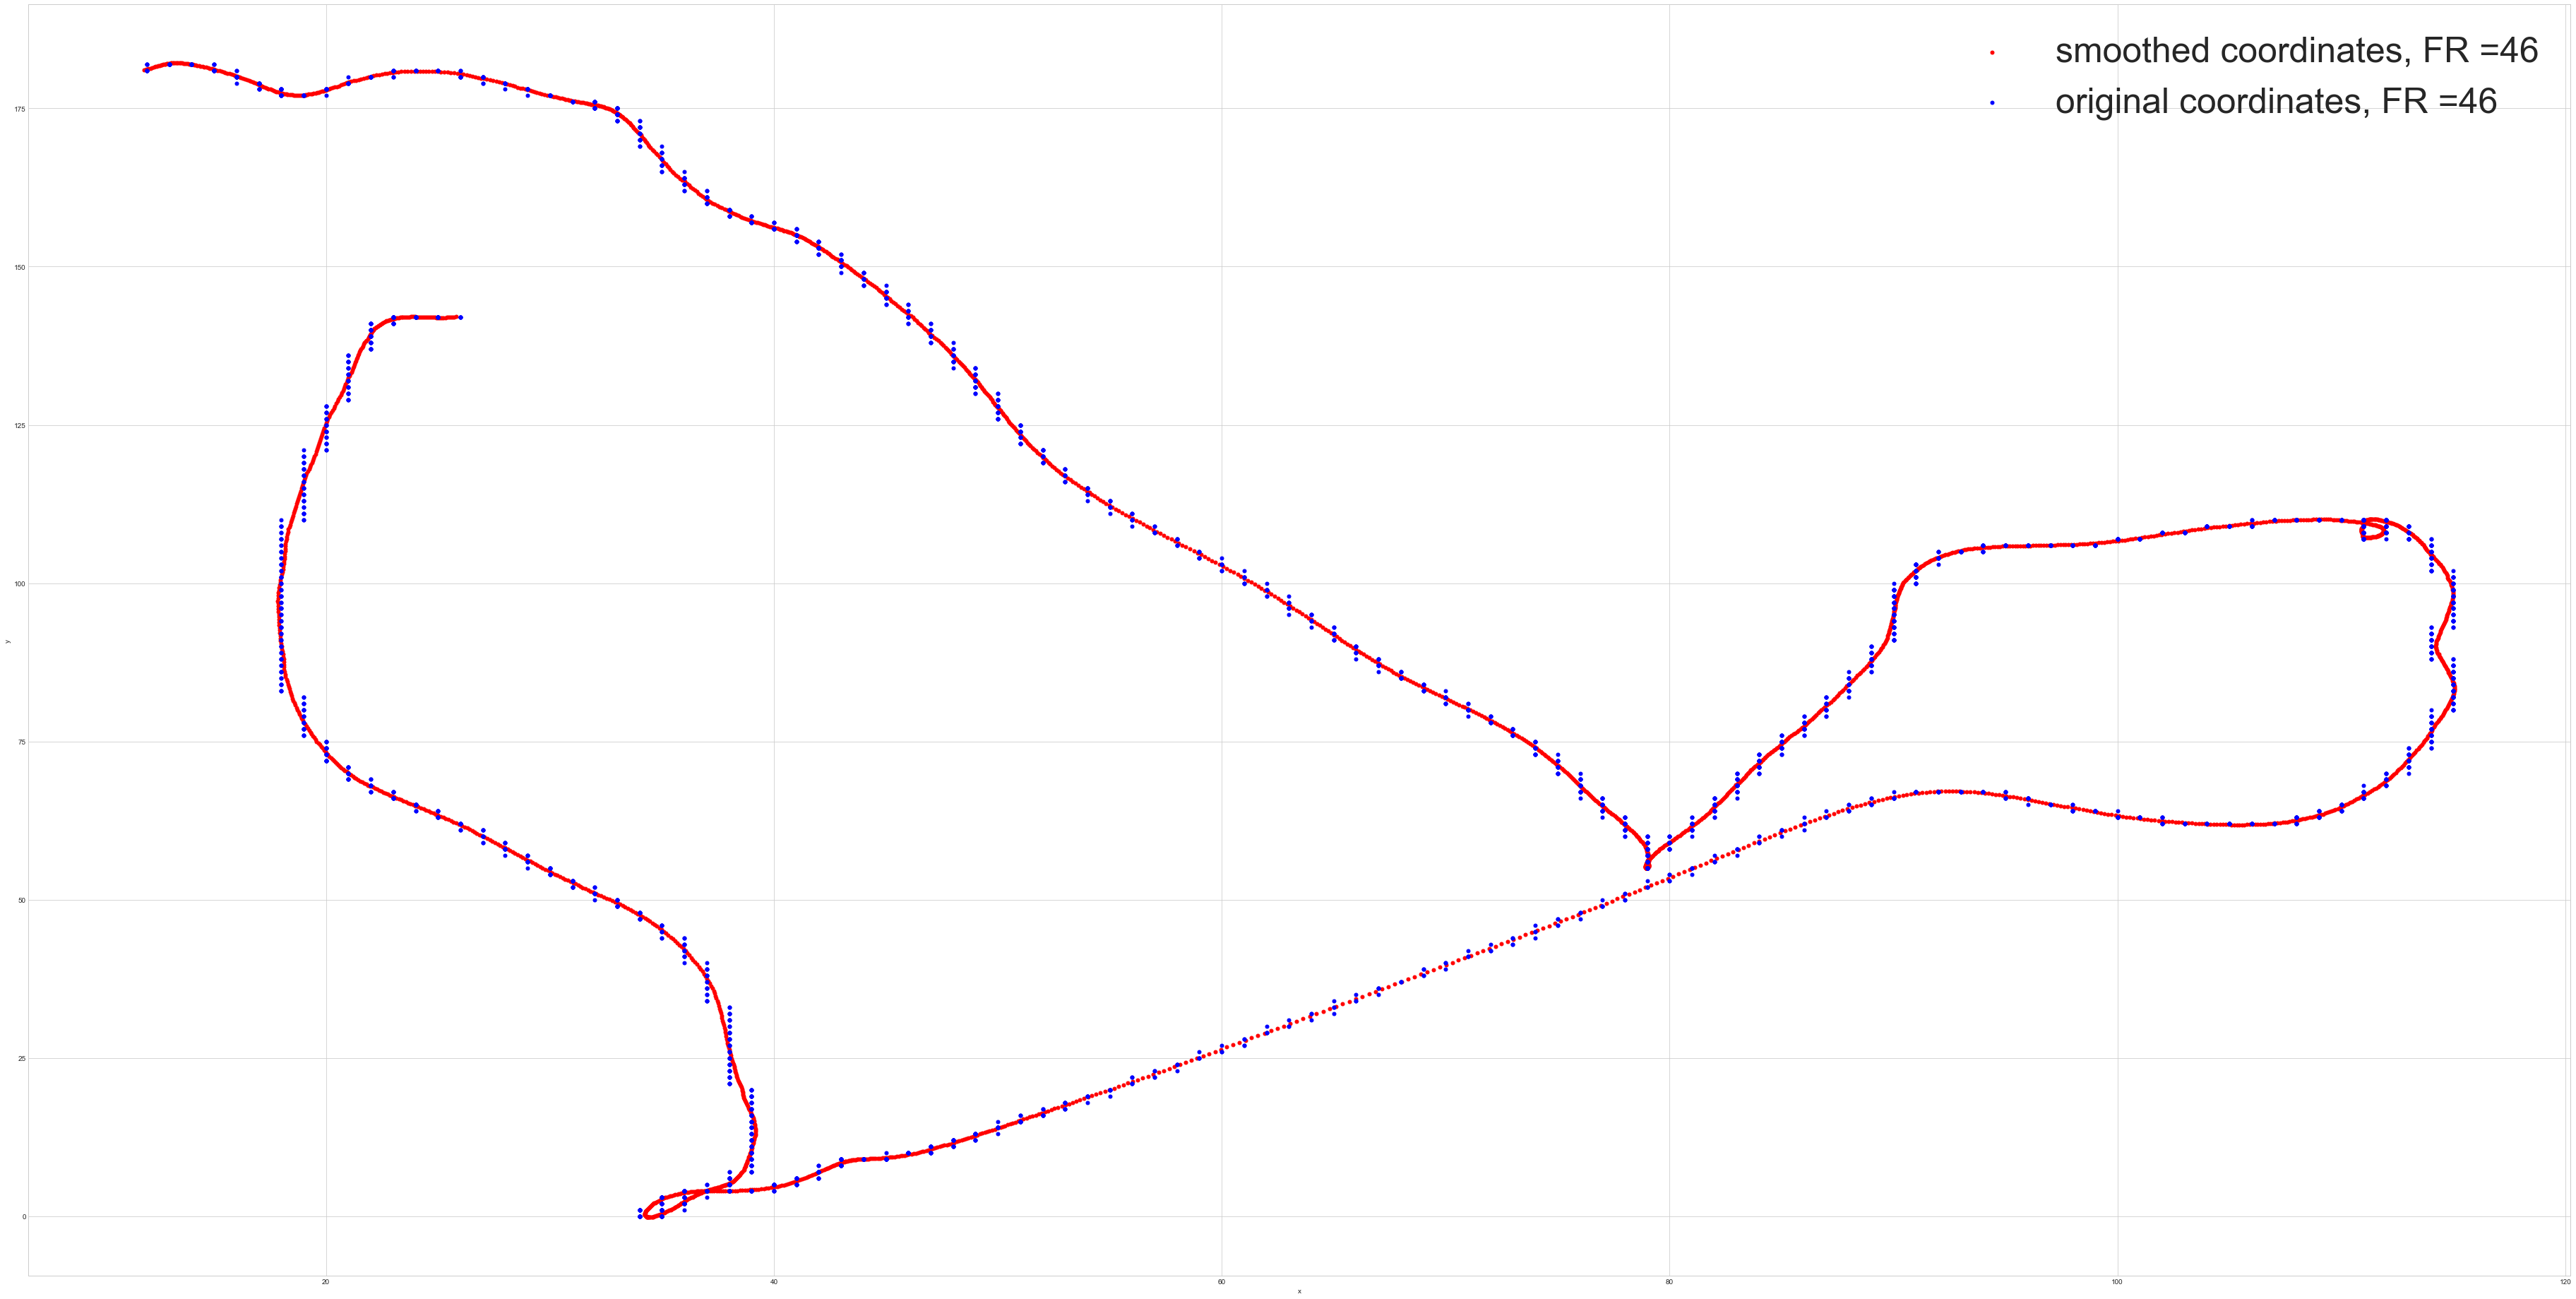

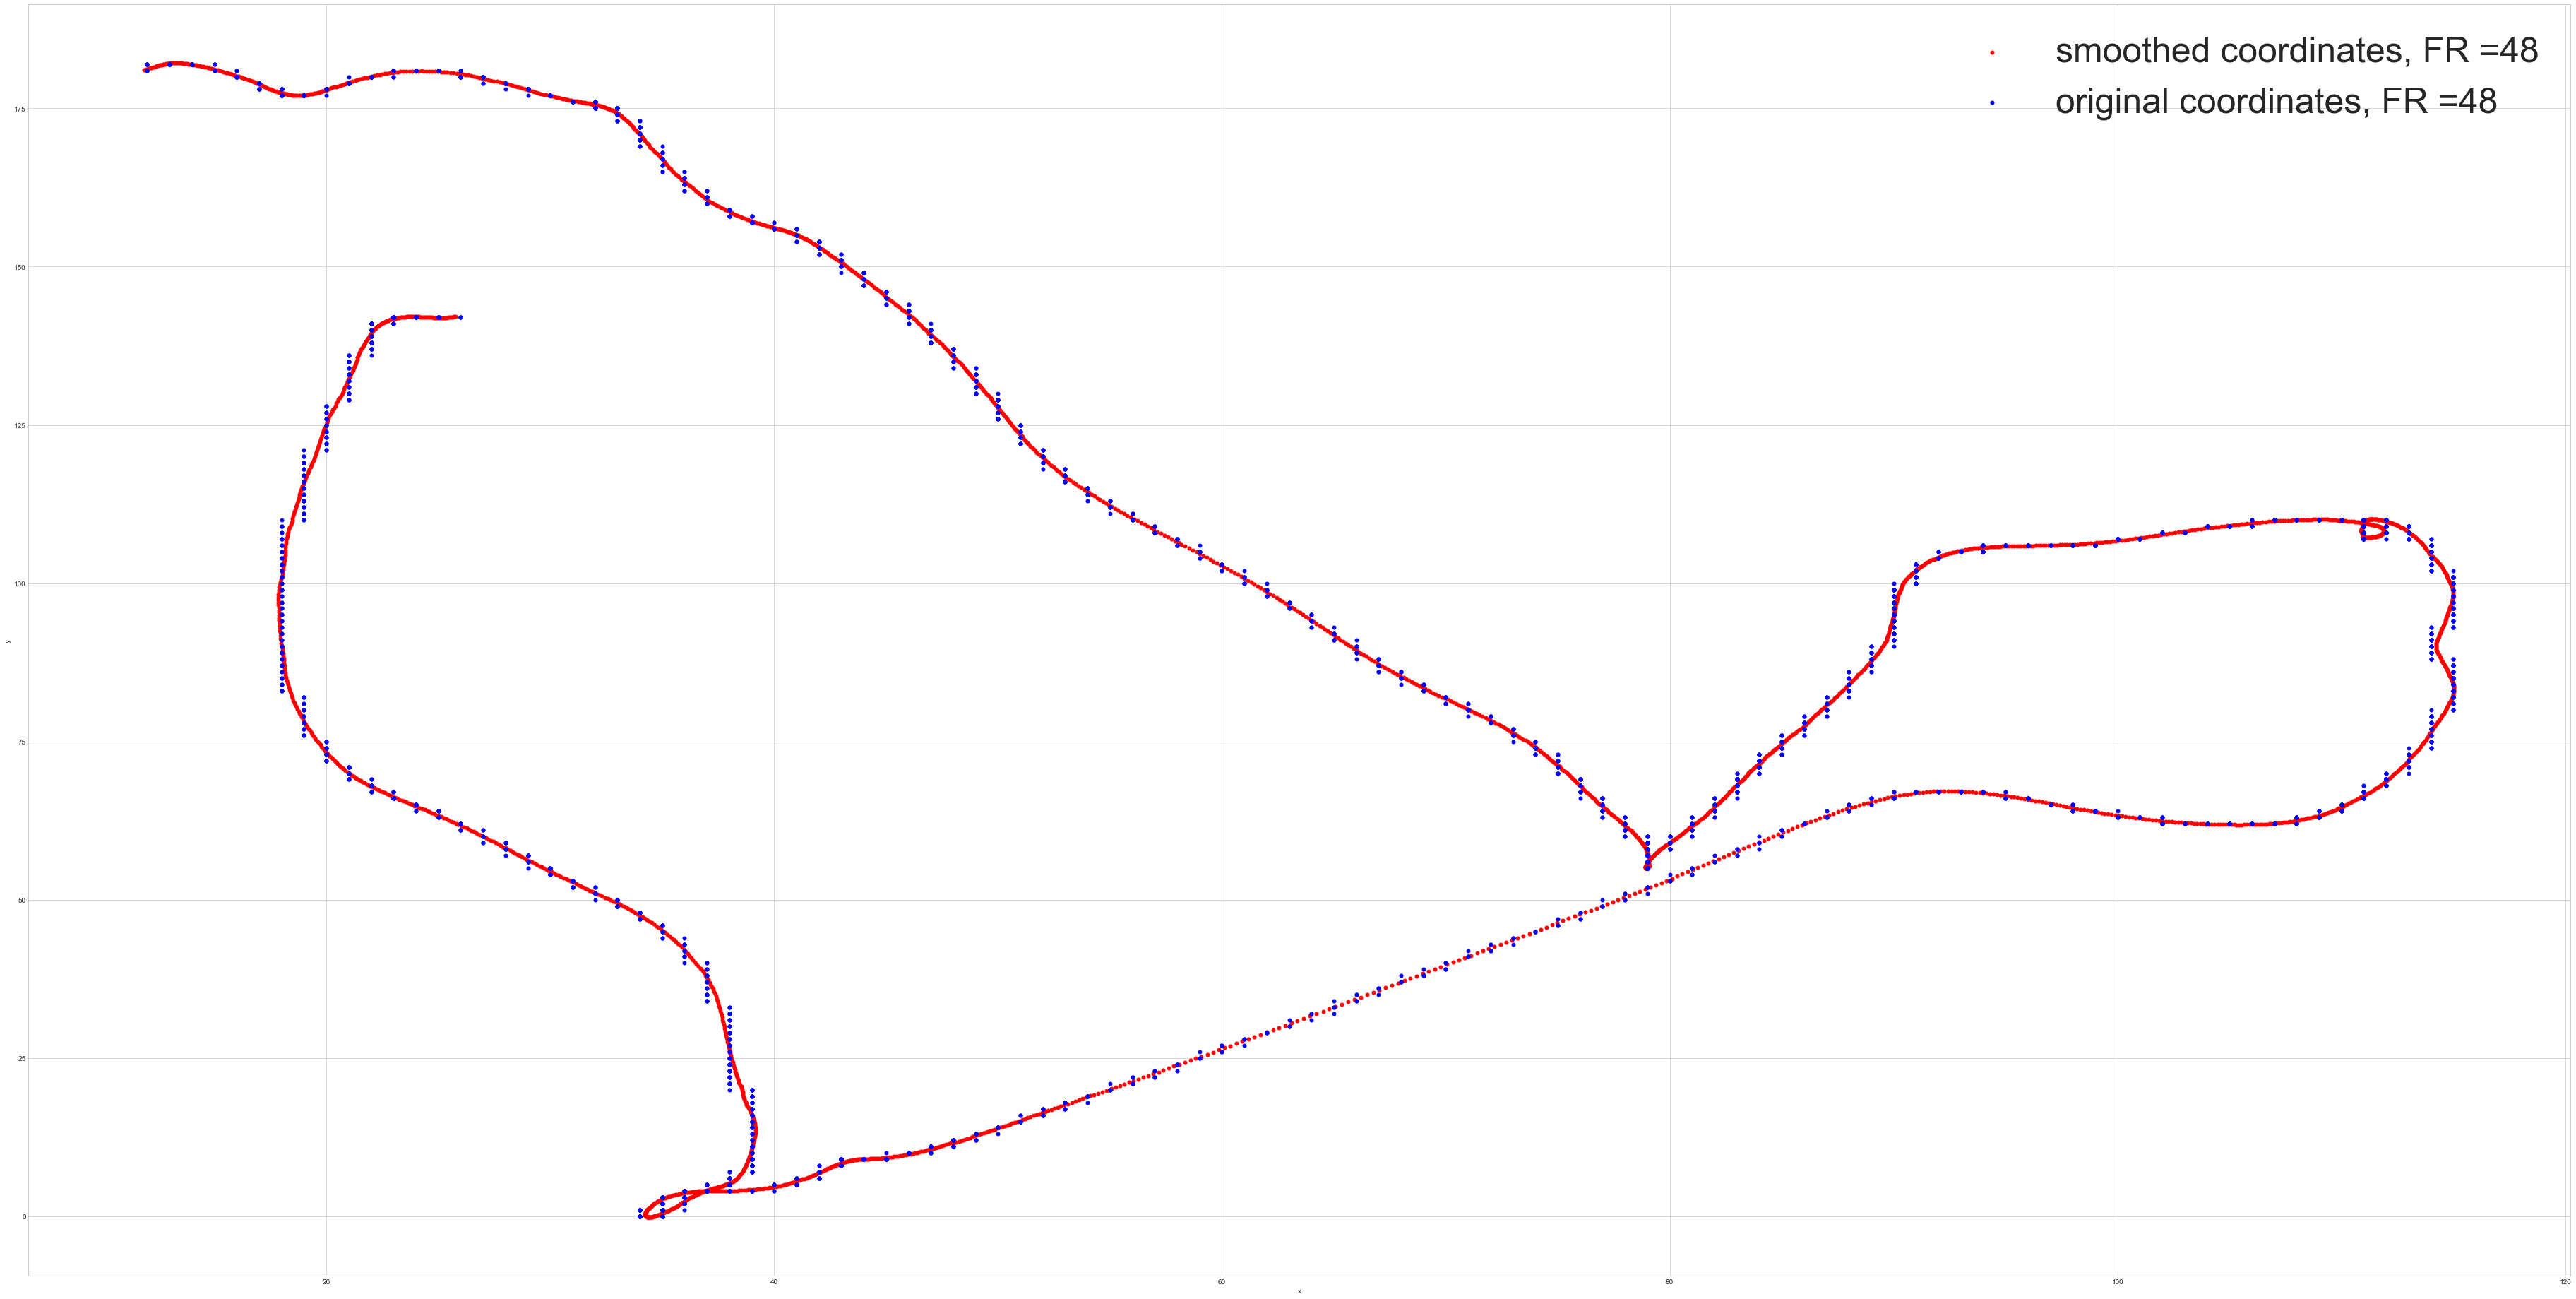

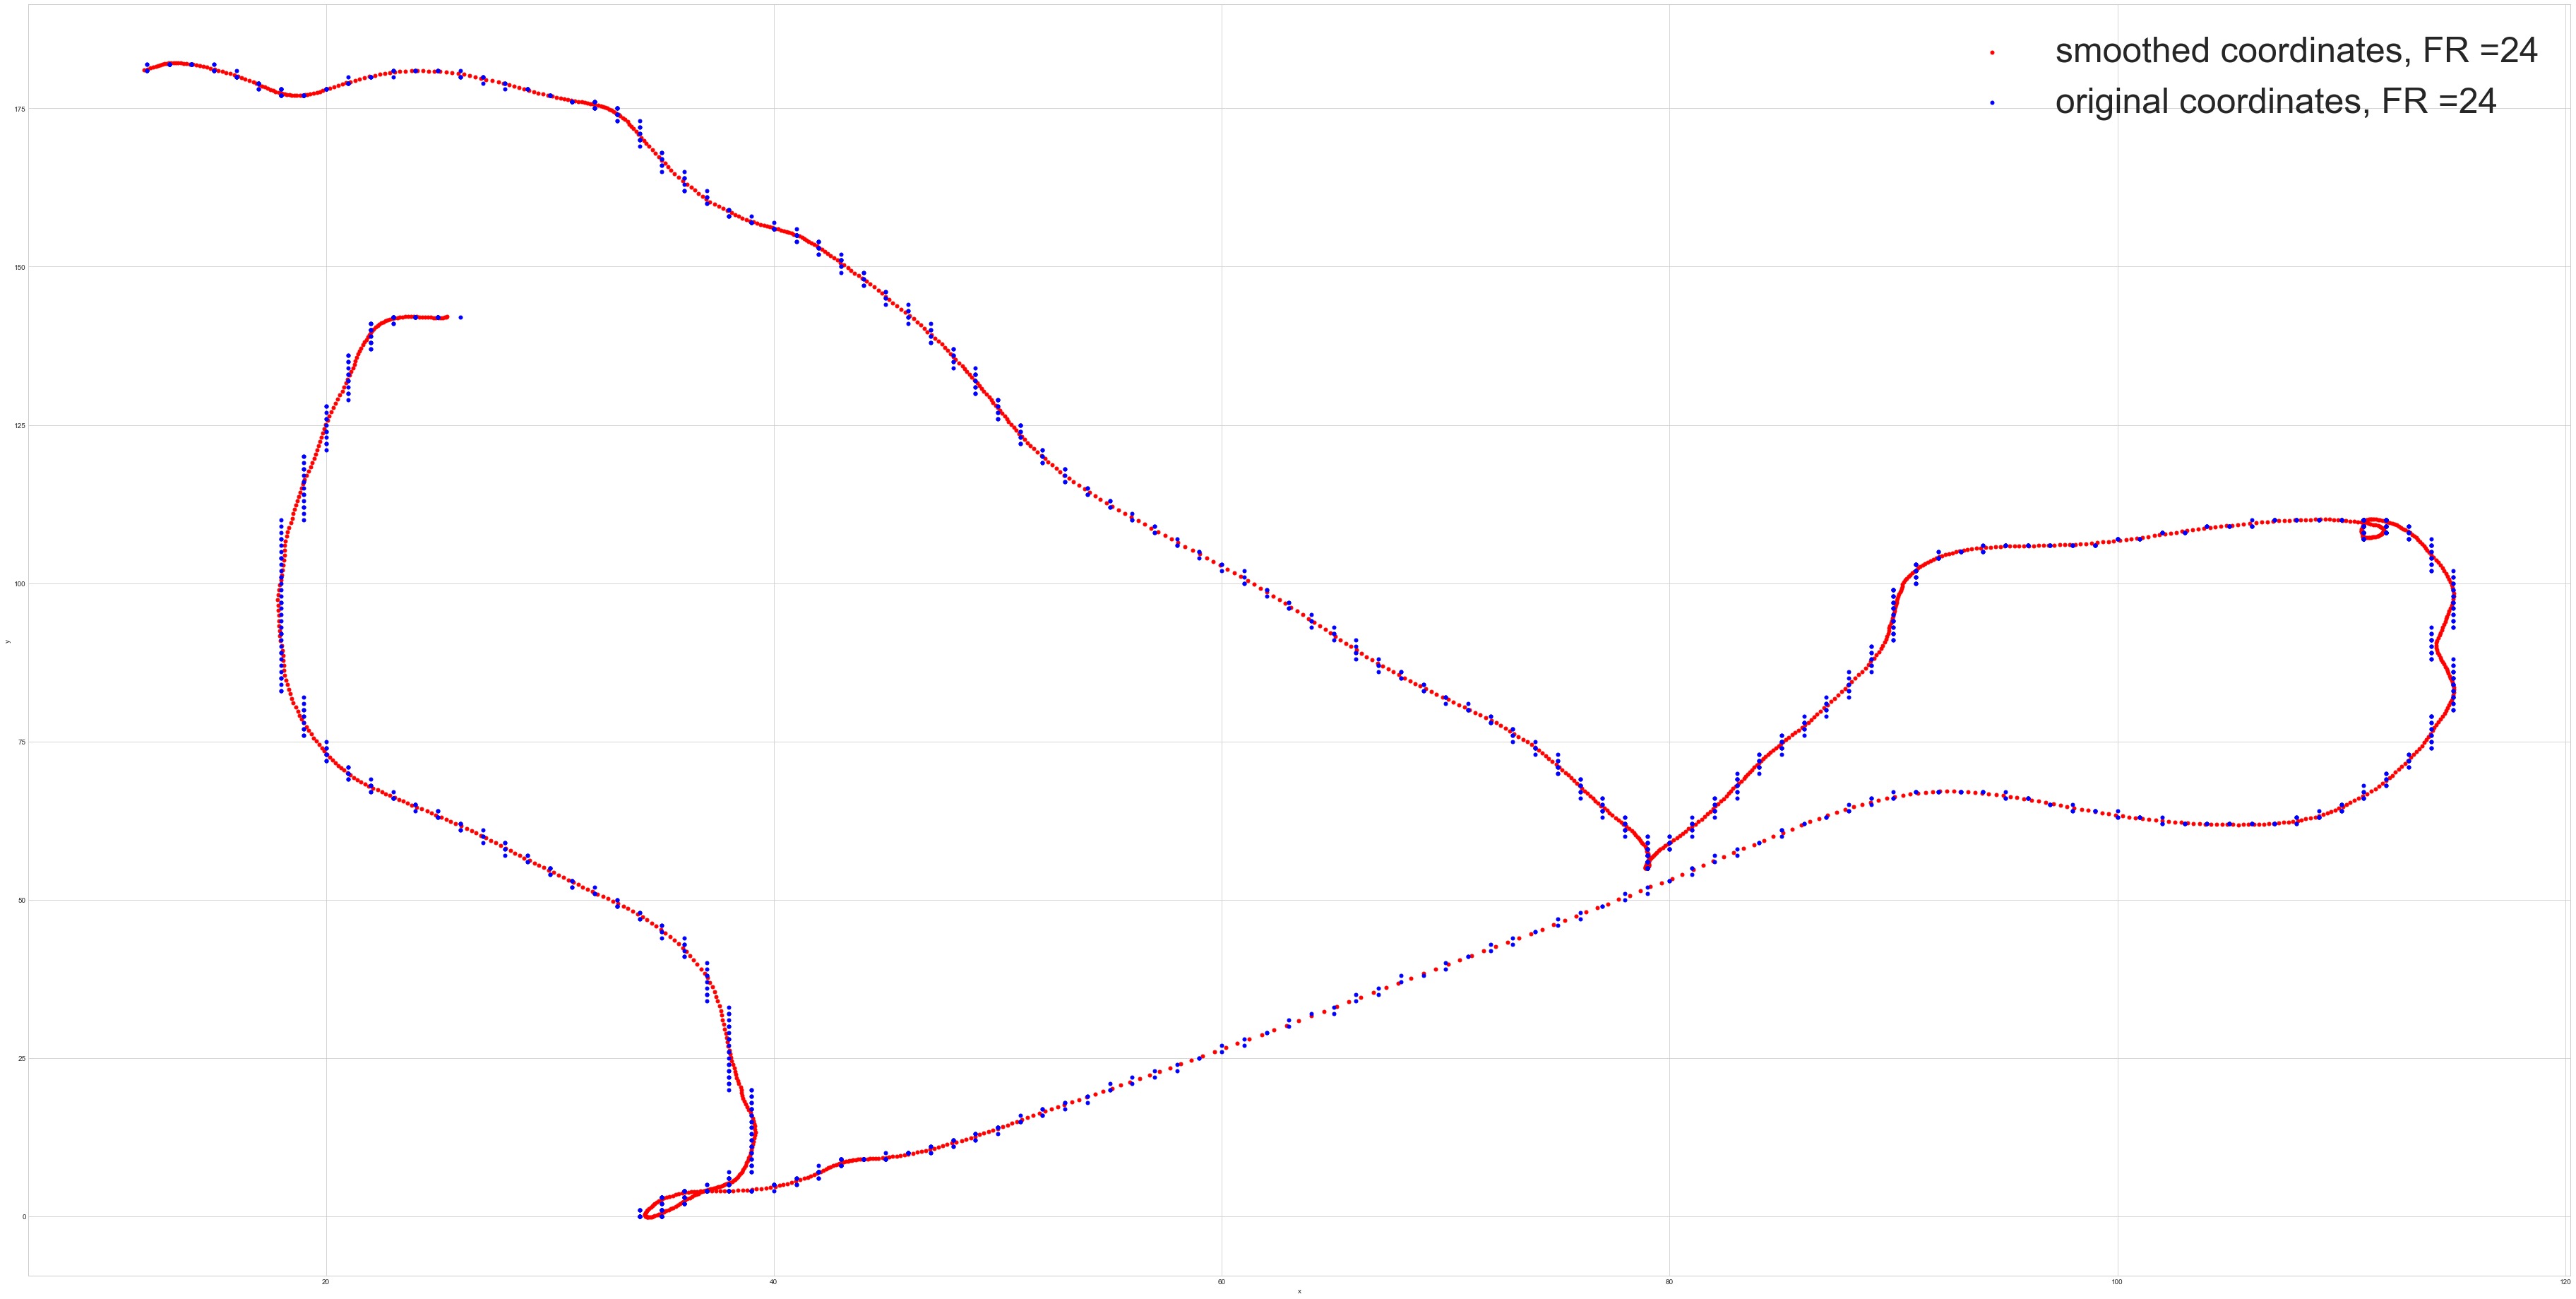

In [24]:
#curve 28 fr = 60, 48
#should have low bdd, velocity-curvature alignment is a straight line
#still for curvature alignment for fr = 48 the curves are not fully aligned

plotting_fun_for_curves.PlotCurve(28, 46, mode = 'both')
plotting_fun_for_curves.PlotCurve(28, 48, mode = 'both')
plotting_fun_for_curves.PlotCurve(28, 24, mode = 'both')

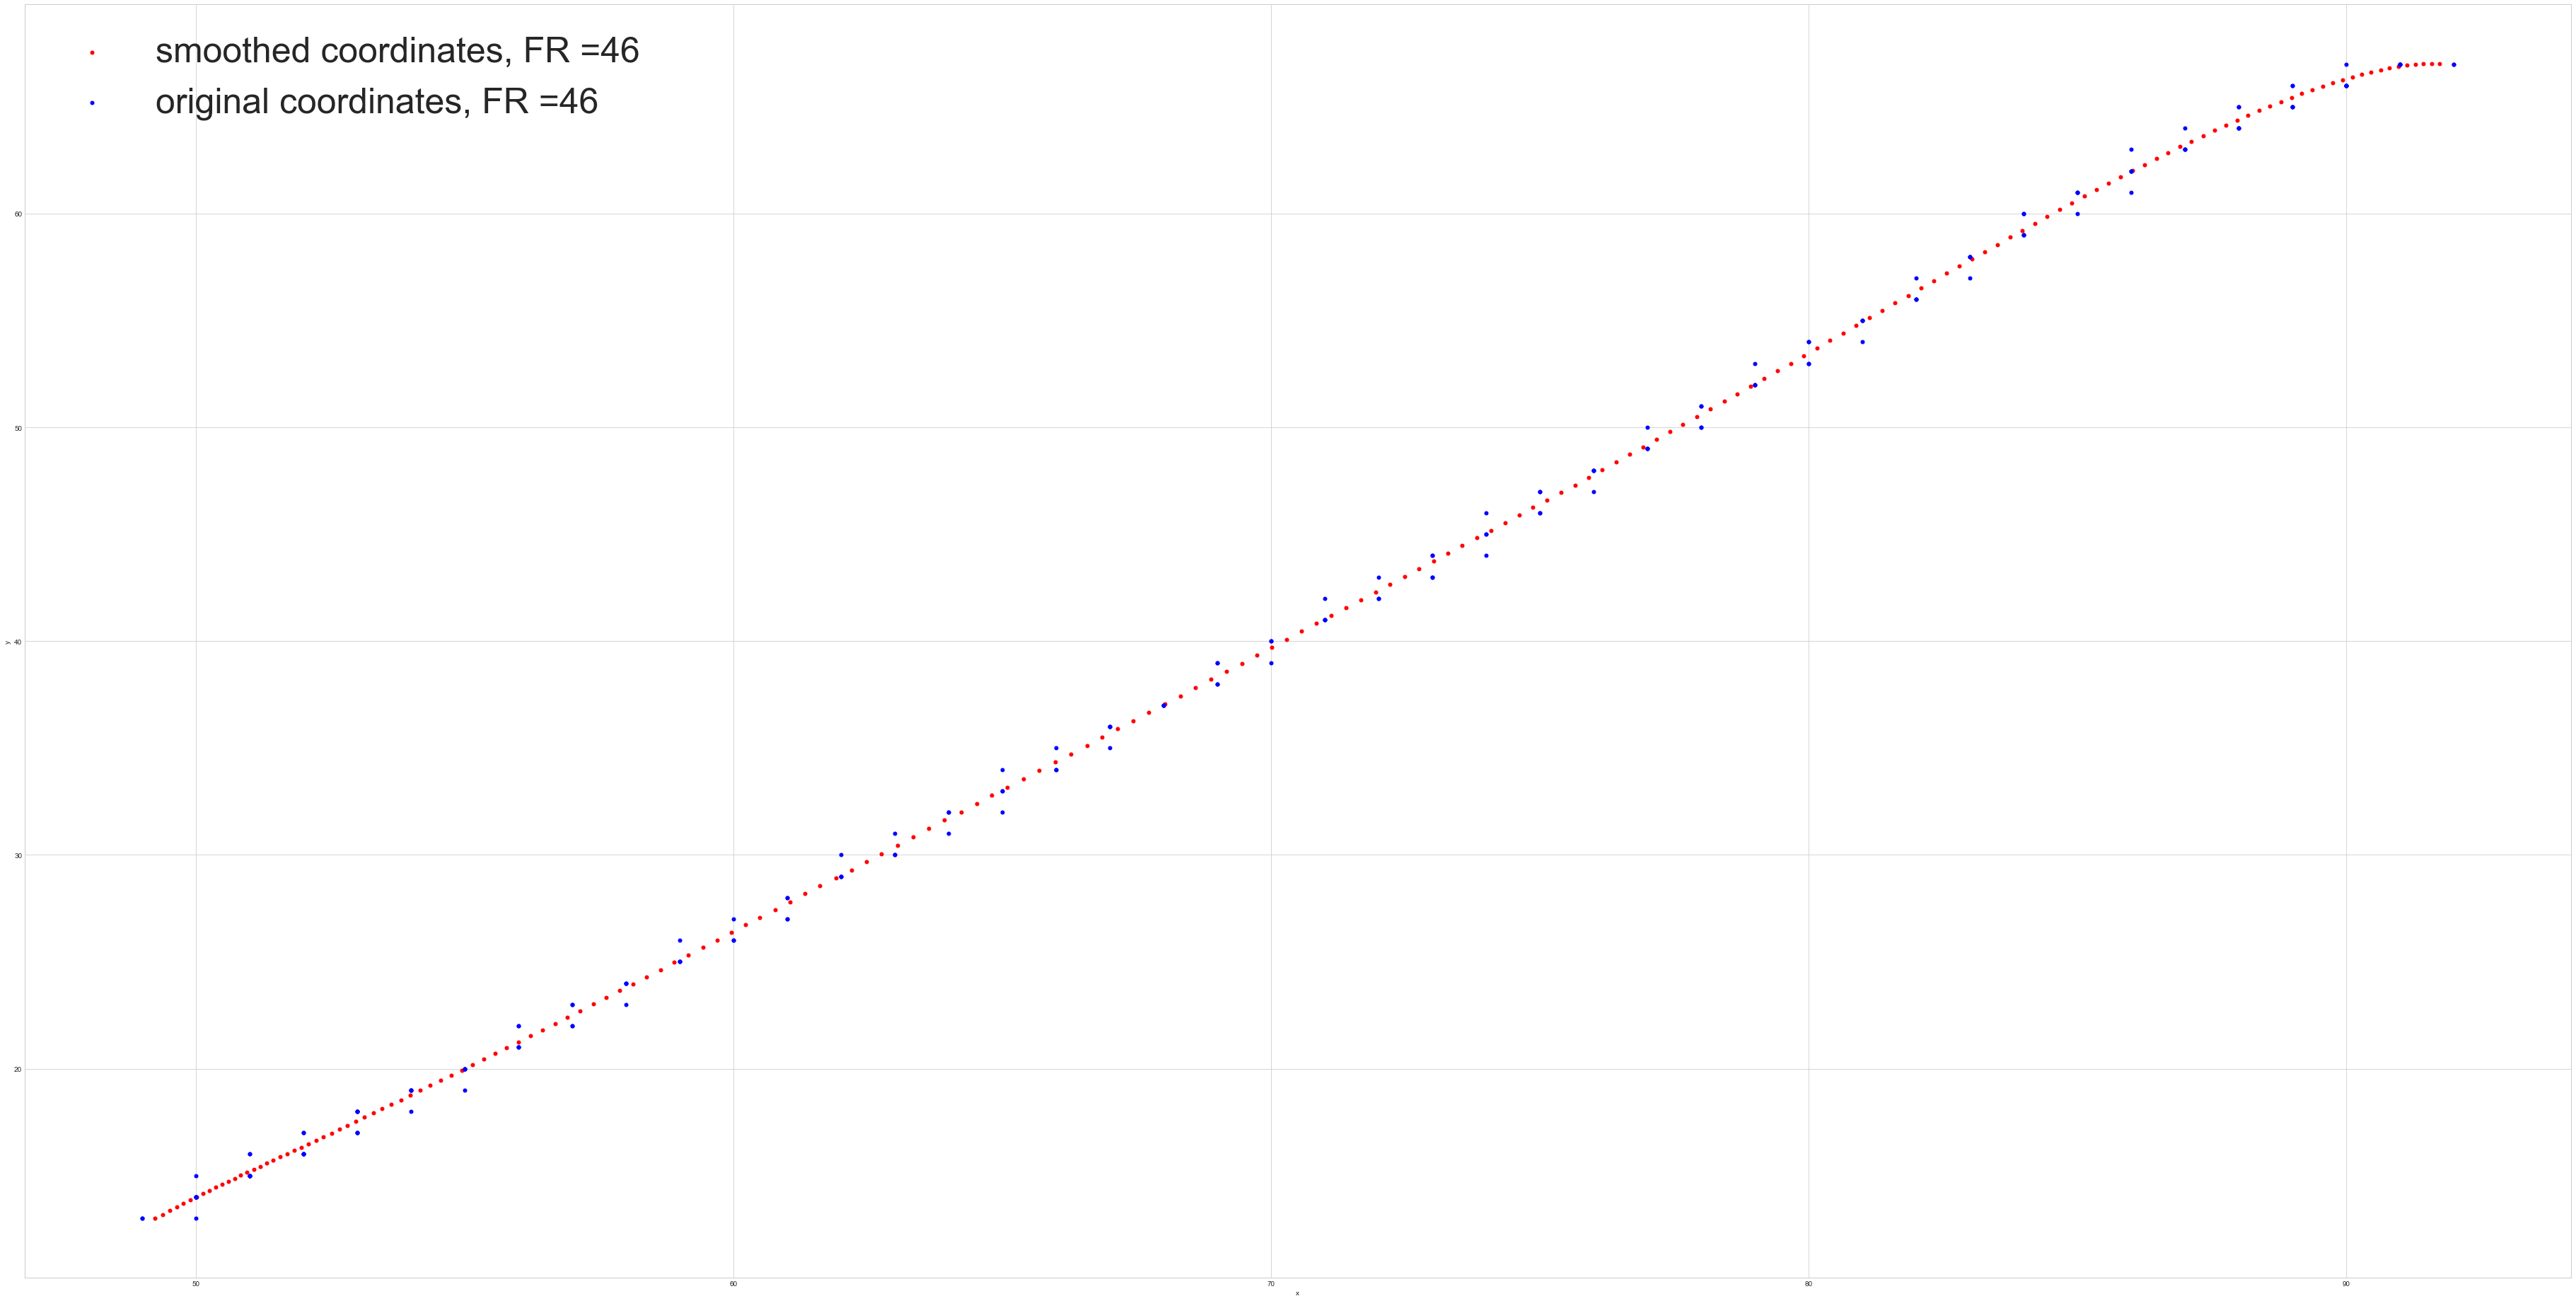

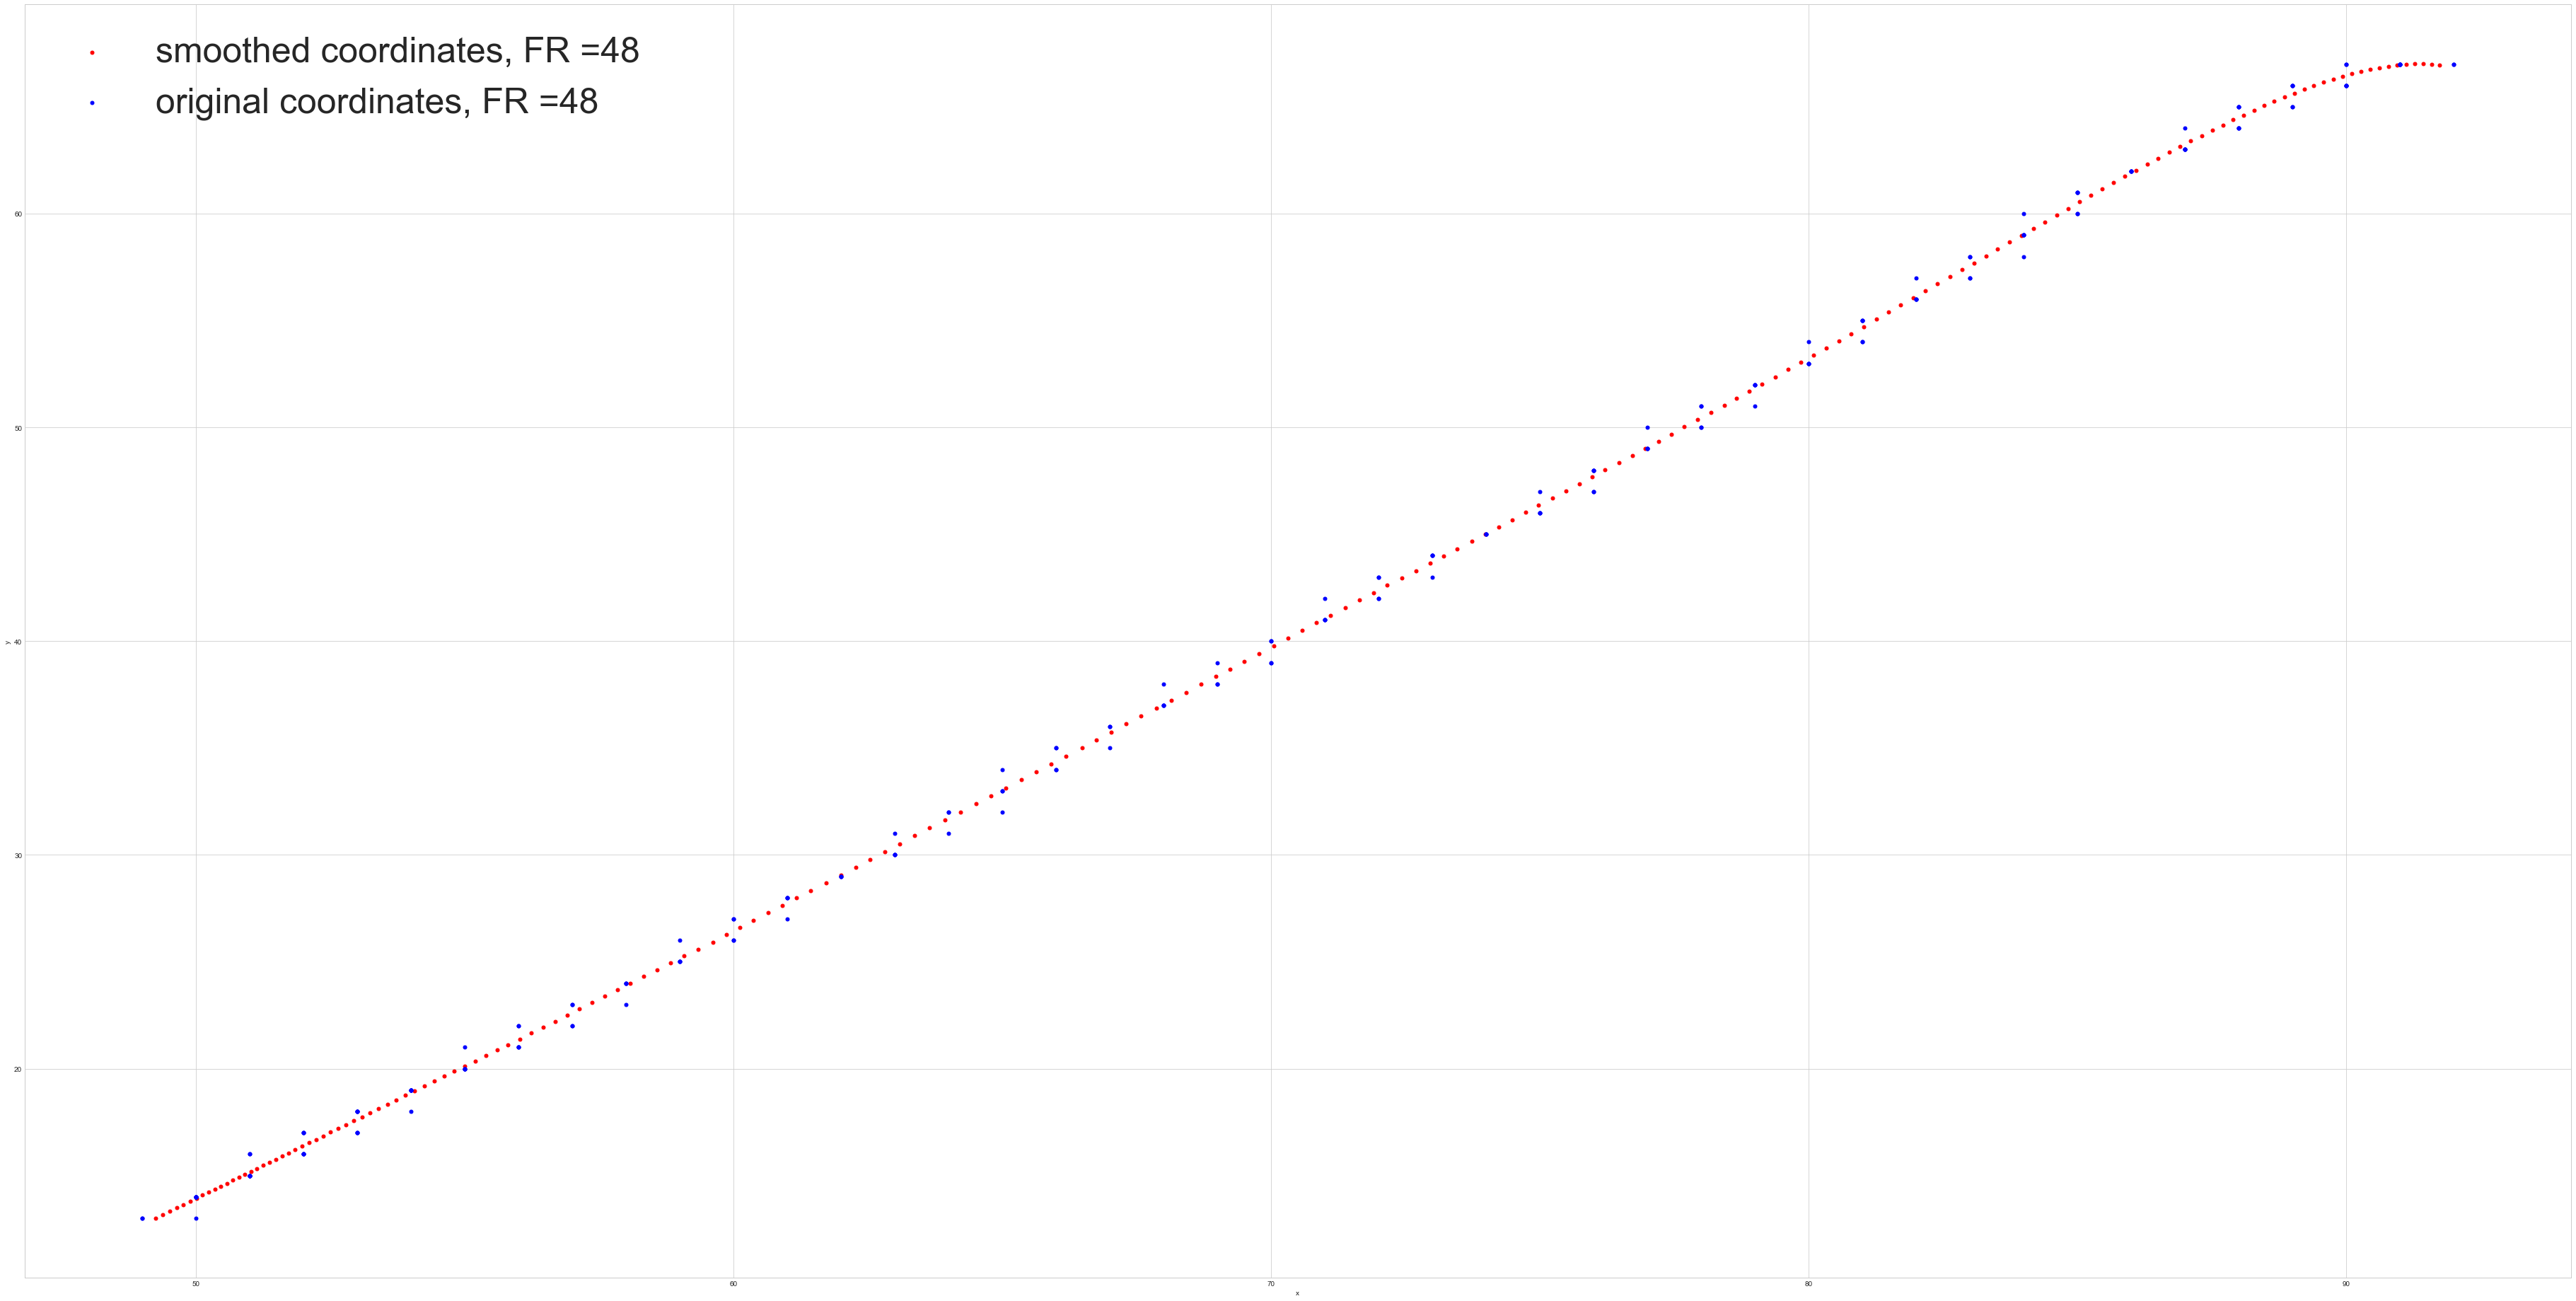

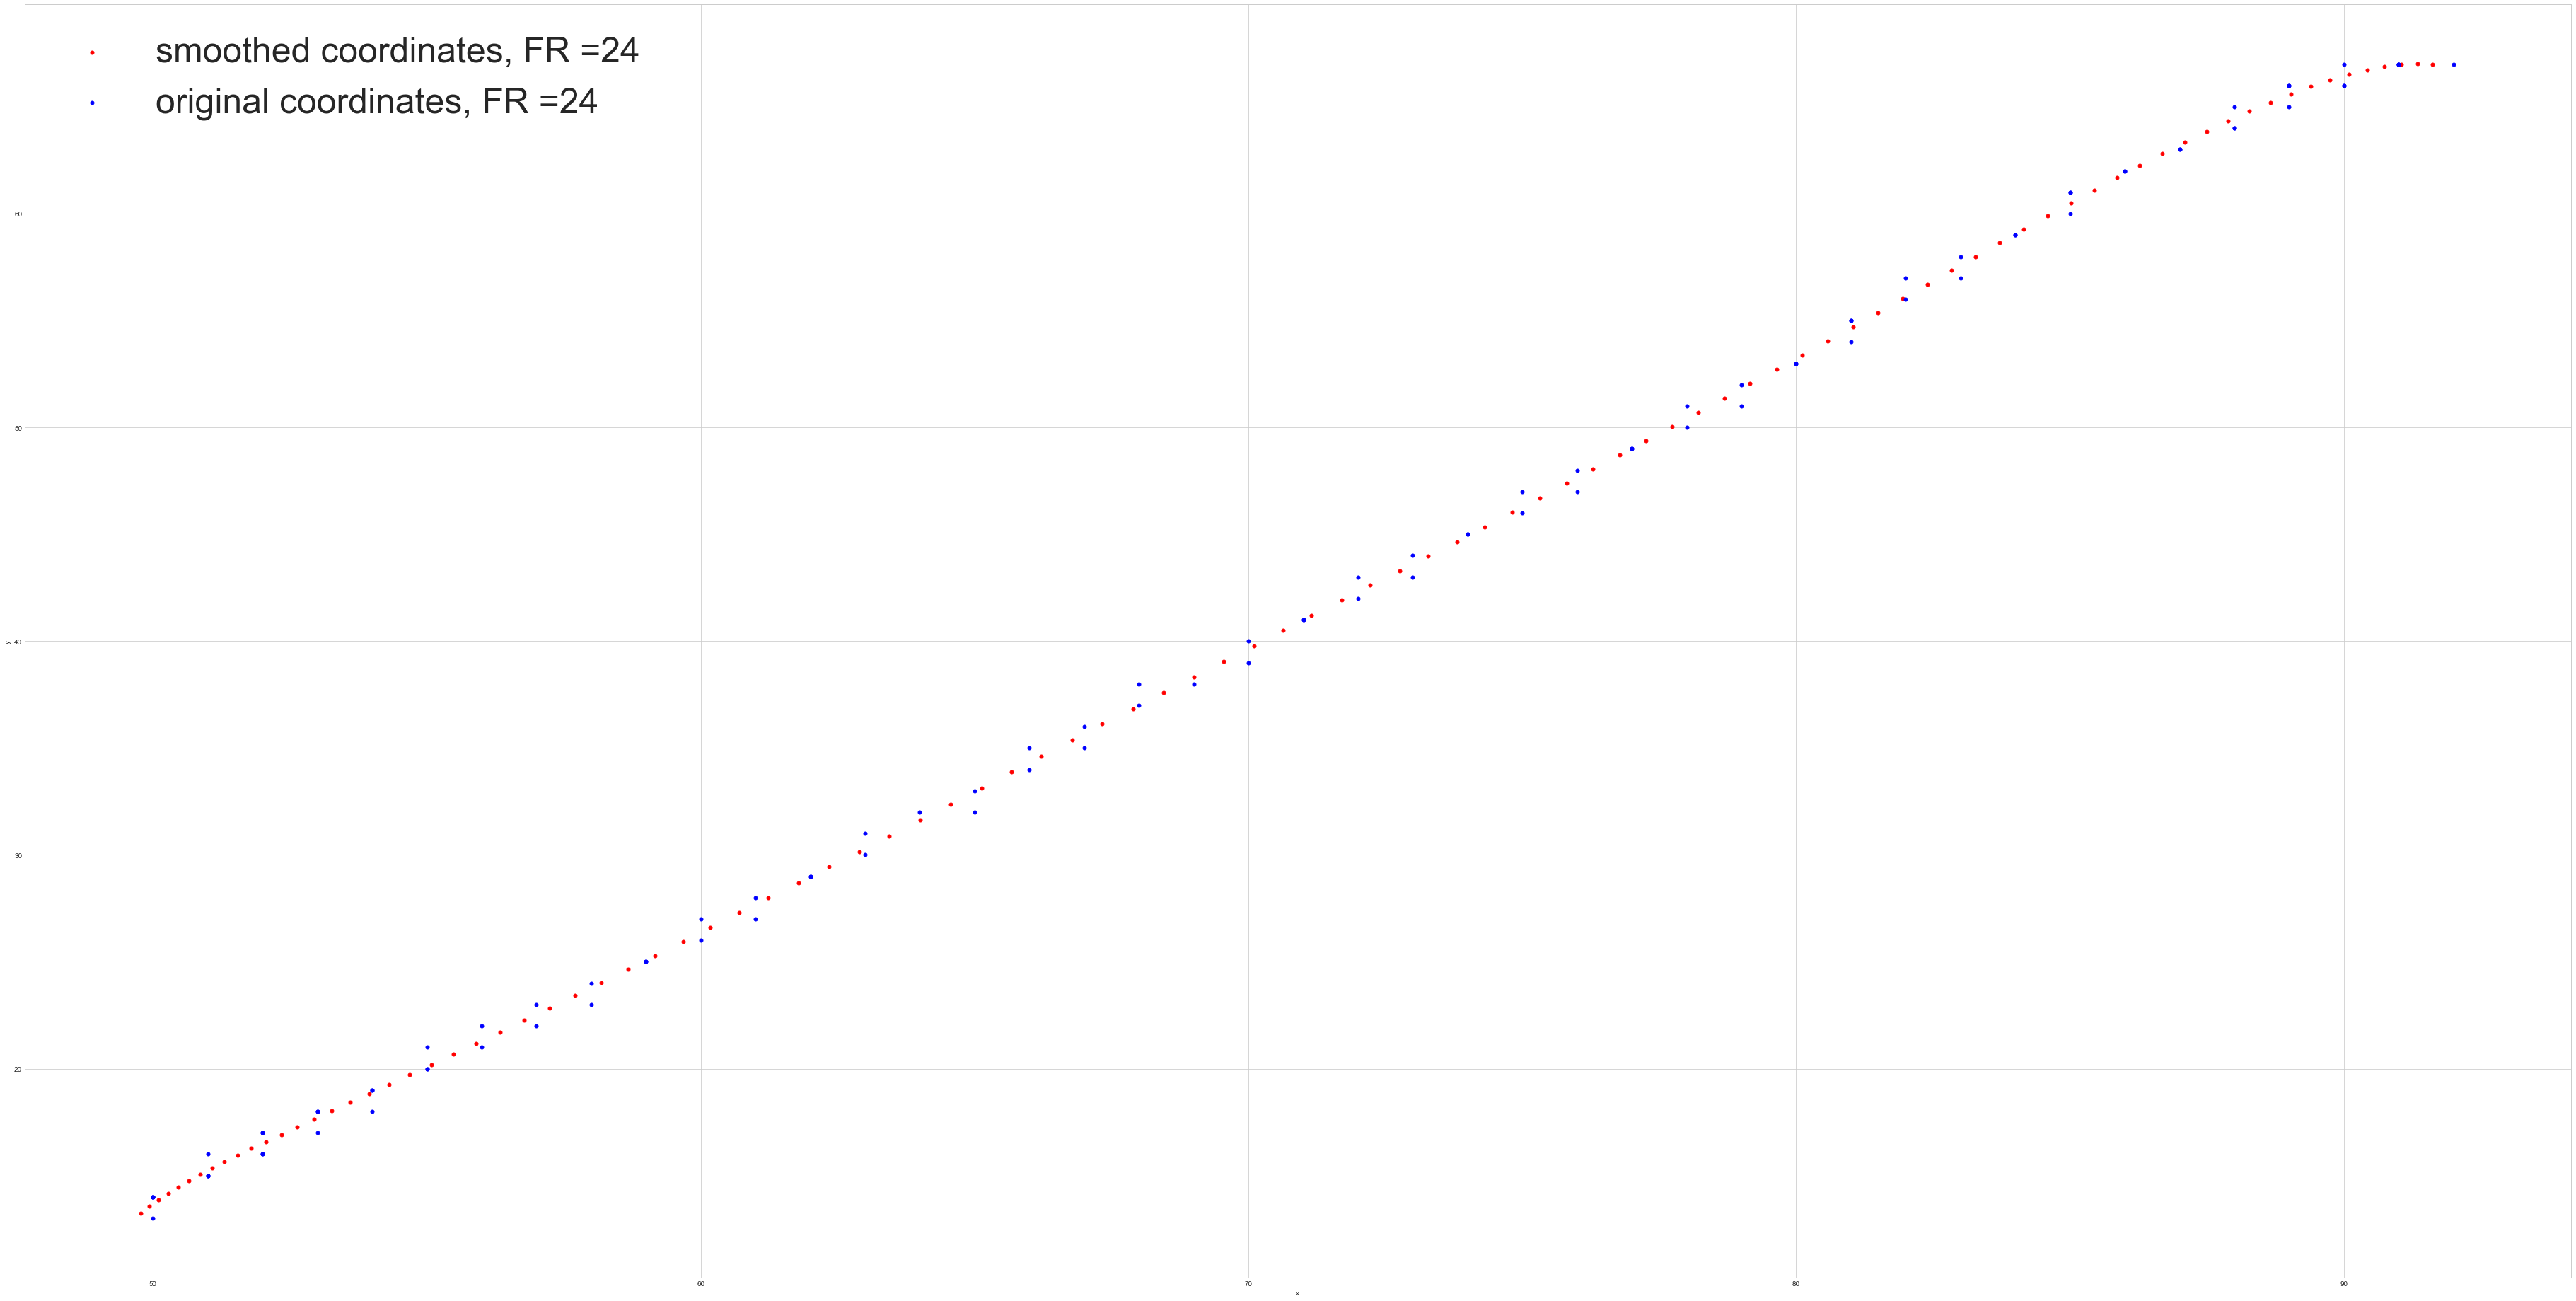

In [27]:
plotting_fun_for_curves.PlotCurve(28, 46, mode = 'both', zoom_in_for_fr_range = range(1725,1917))
plotting_fun_for_curves.PlotCurve(28, 48, mode = 'both', zoom_in_for_fr_range = range(1800,2000))
plotting_fun_for_curves.PlotCurve(28, 24, mode = 'both', zoom_in_for_fr_range = range(900,1000))

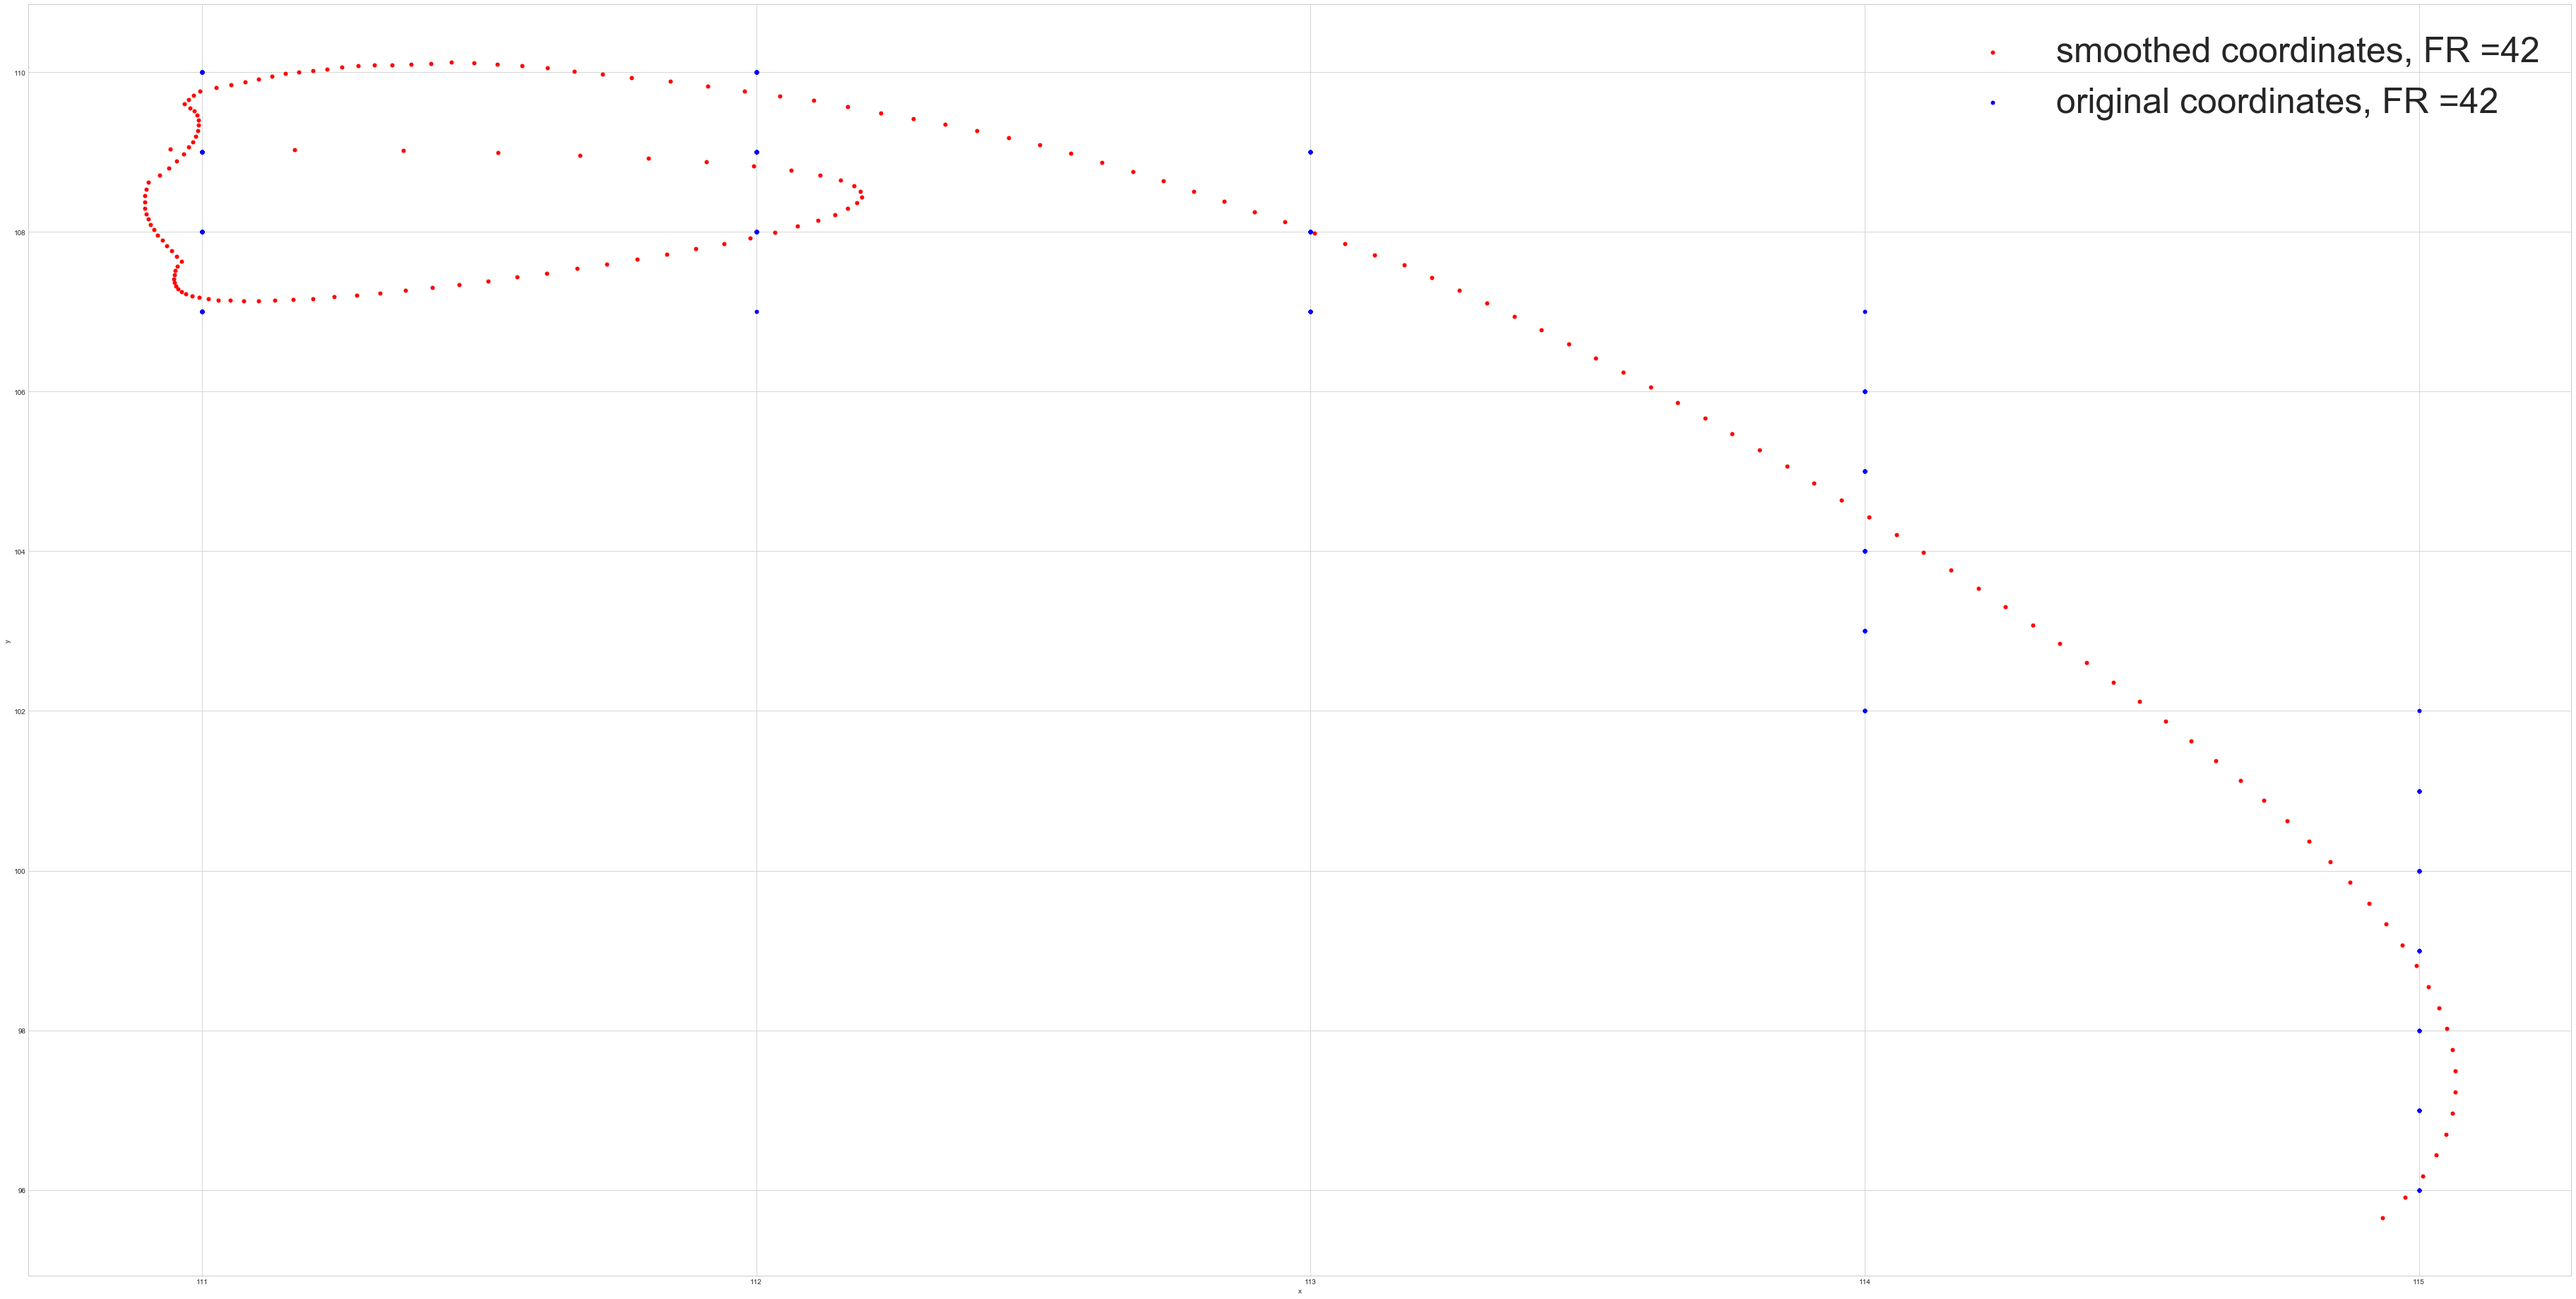

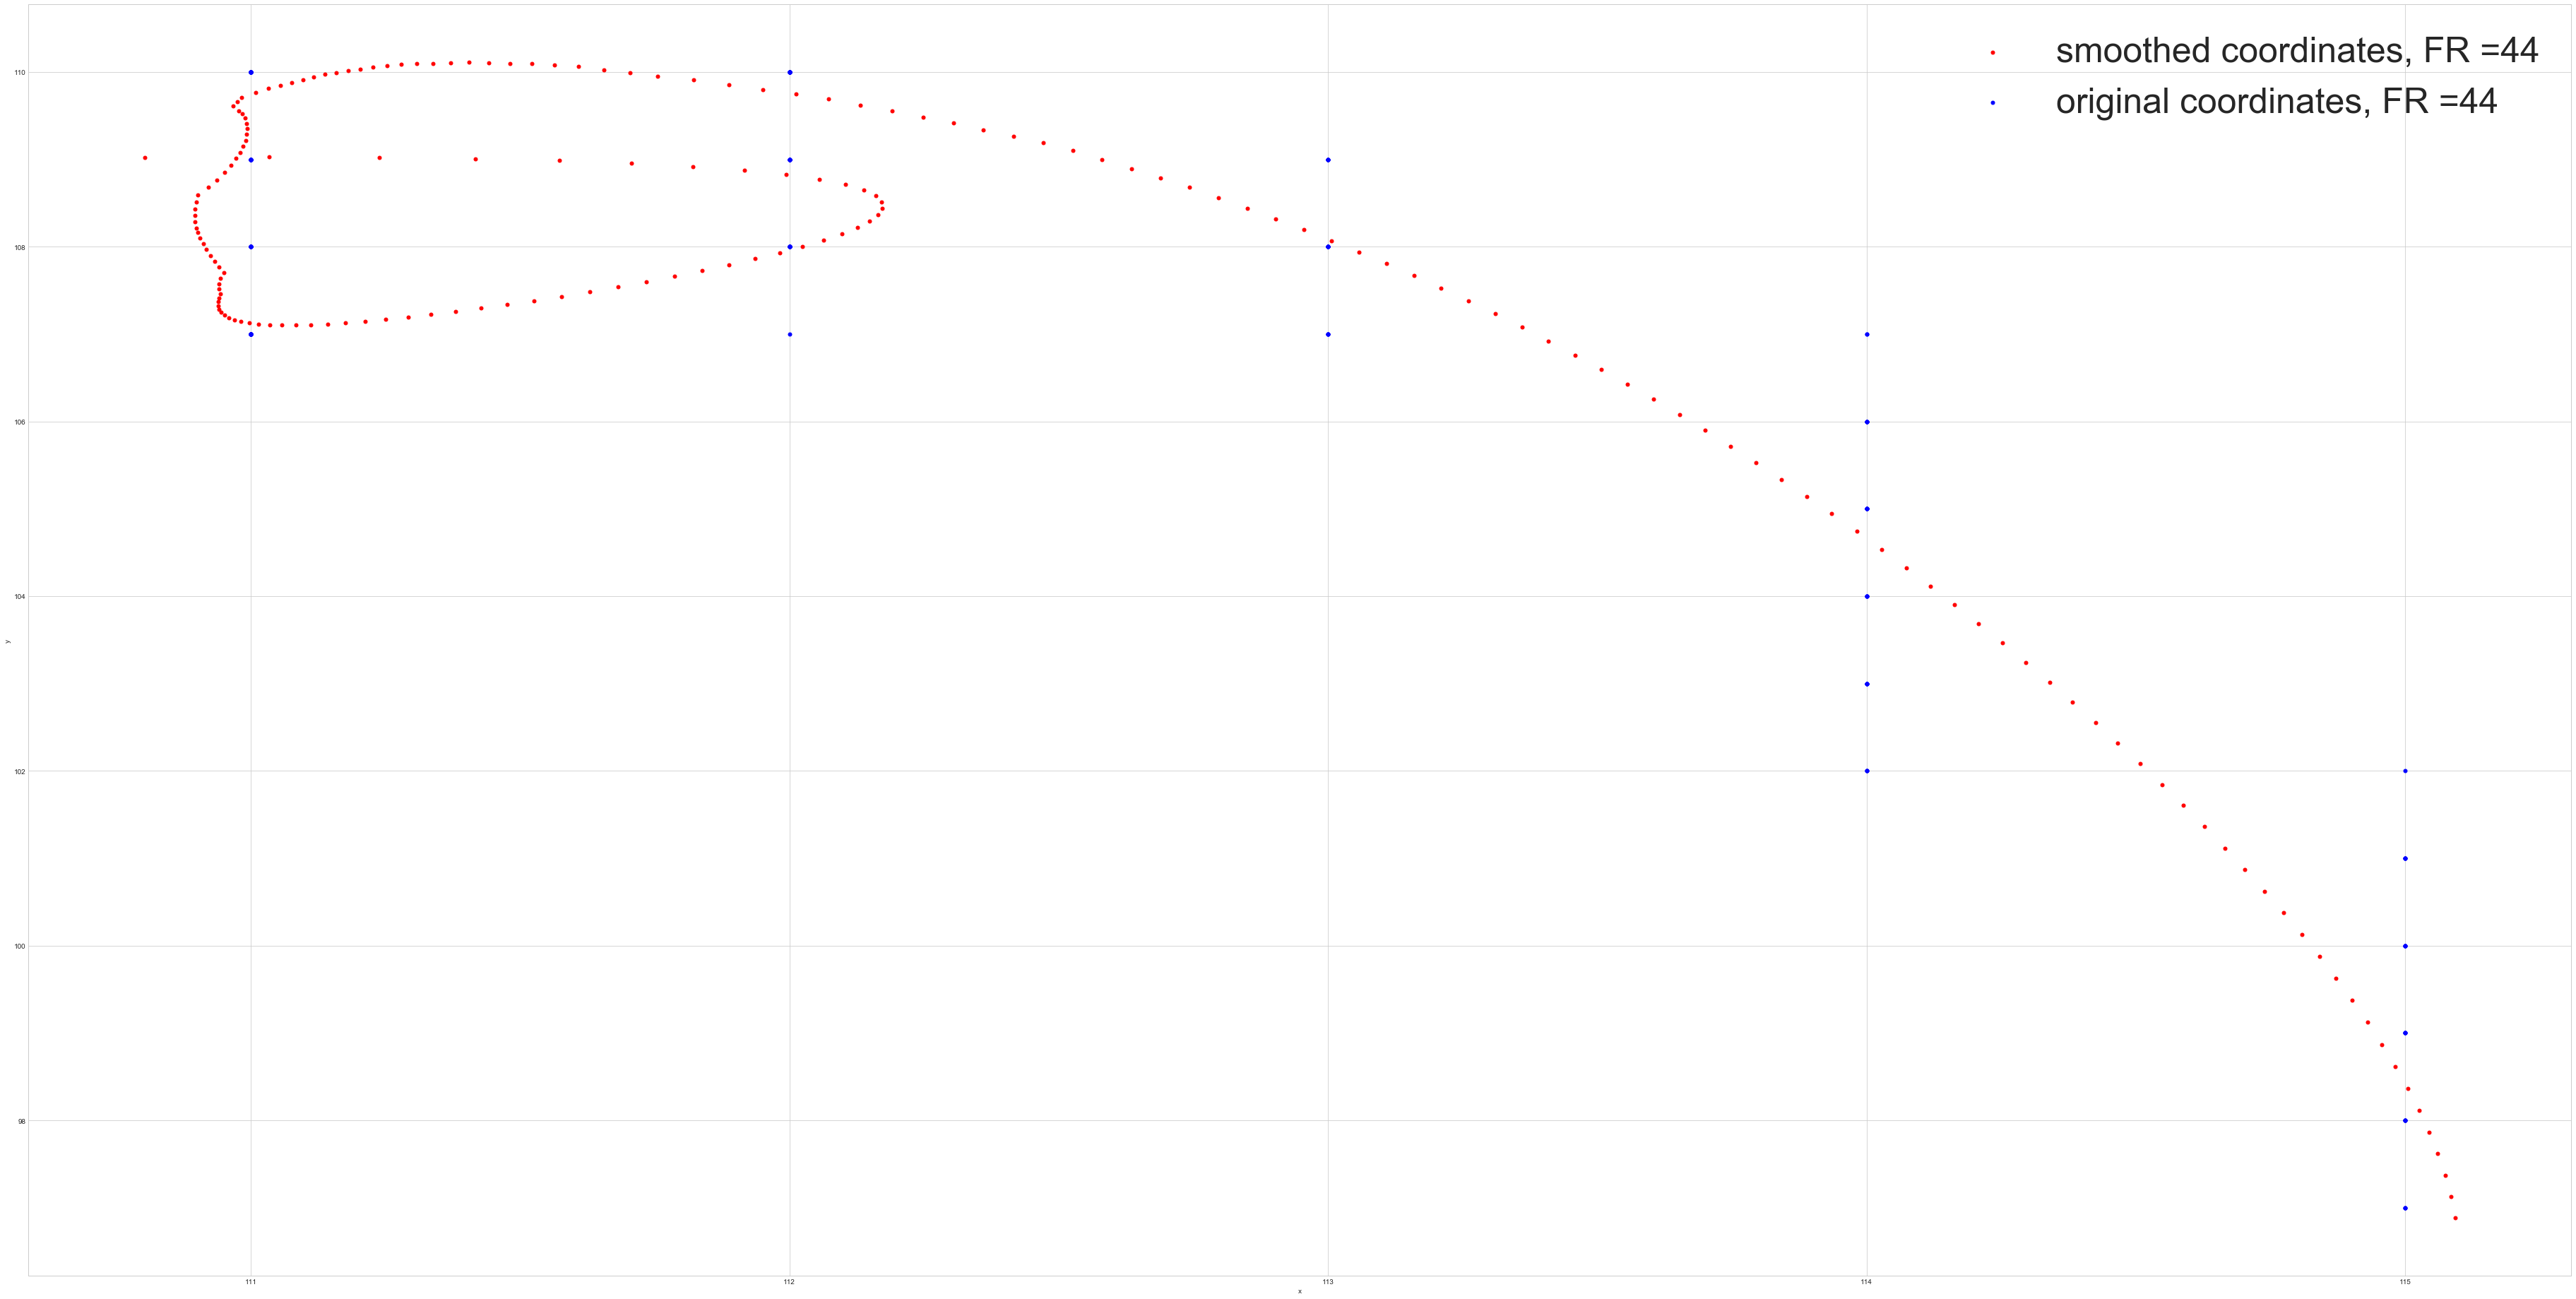

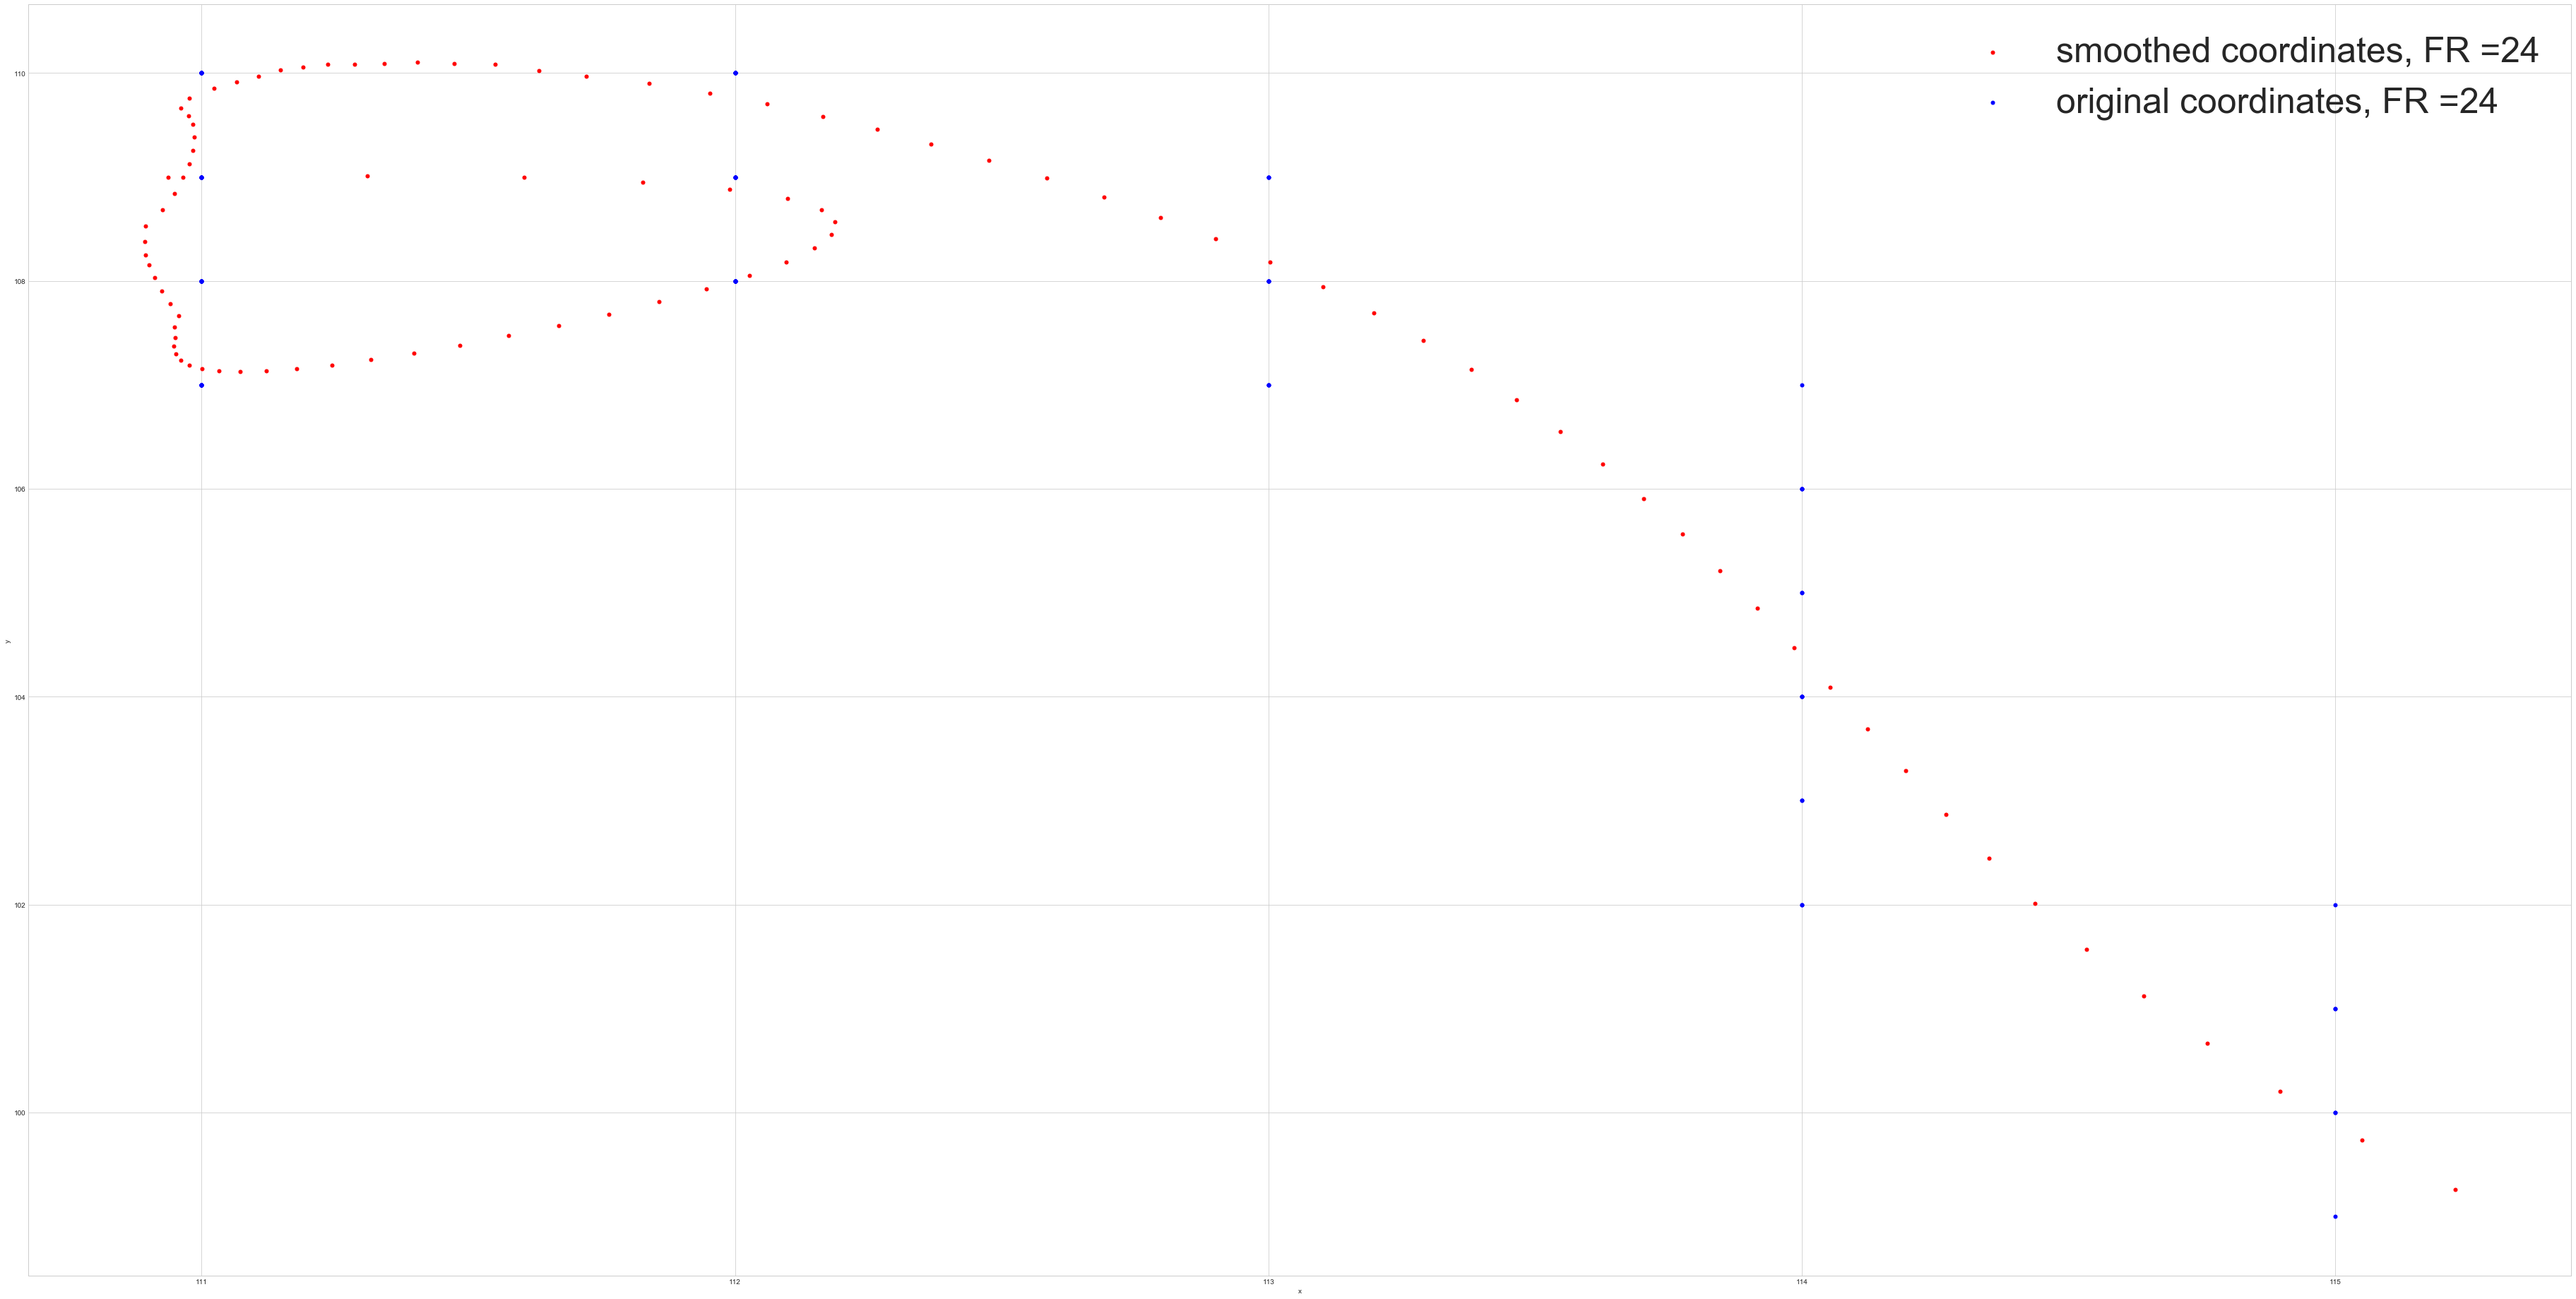

In [32]:
#for curve 28 fr = 44 small dip for frames 650-700 (in fr = 24)
plotting_fun_for_curves.PlotCurve(28, 42, mode = 'both', zoom_in_for_fr_range = range(1138,1325))
plotting_fun_for_curves.PlotCurve(28, 44, mode = 'both', zoom_in_for_fr_range = range(1192,1383))
plotting_fun_for_curves.PlotCurve(28, 24, mode = 'both', zoom_in_for_fr_range = range(650,750))

In [ ]:
#conclusion: small loops in curves are problematic, again FR = 44 curve differs a bit from the other 2
#jumps in BDD might be due to the shape of the curve: for some FR the loop in the curve would be smoothed differently 
#than for most FR

In [33]:
#BDD plot of curve 34 has the same shape as that of curve 28, but slightly smaller jumps, highest for FR = 62 (trial 19)
#curve 34, FR = (62, 74, 86), FR_high trial no (19, 25, 31)
info_file_high = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_higher/CRV_34.json"
animals_high = locomotion.getAnimalObjs( info_file_high )

curve_34_fr62 = locomotion.trajectory.getCurveData(animals_high[20])
curve_34_fr74 = locomotion.trajectory.getCurveData(animals_high[26])
curve_34_fr86 = locomotion.trajectory.getCurveData(animals_high[32])

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

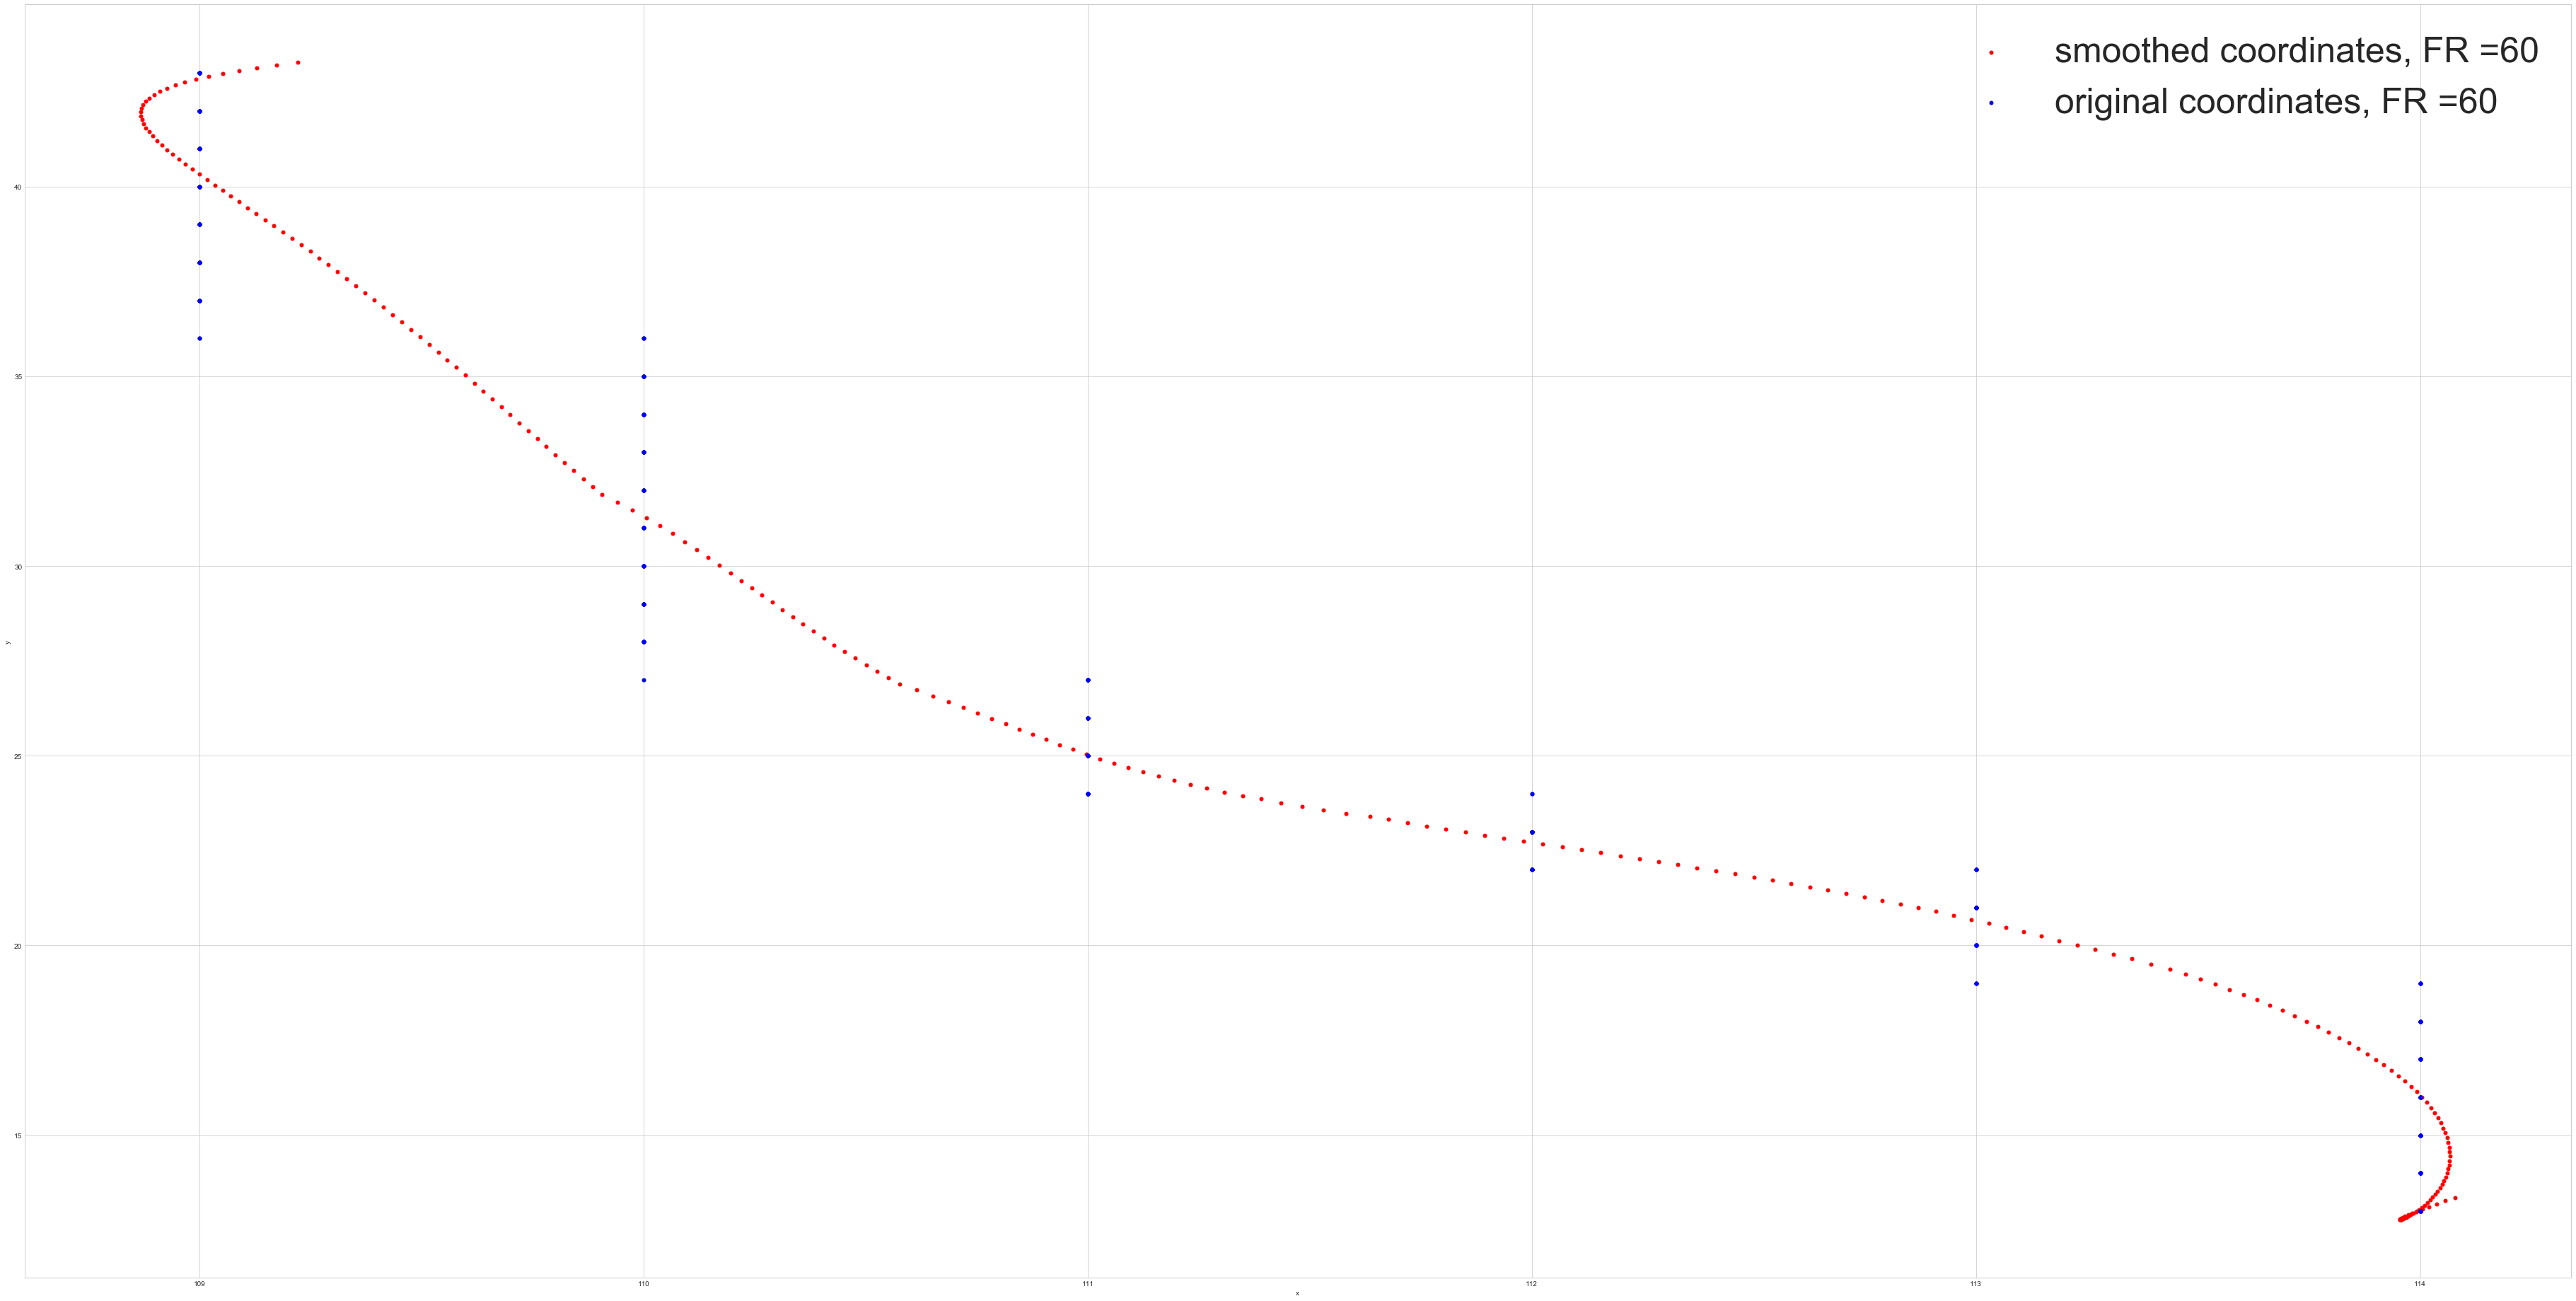

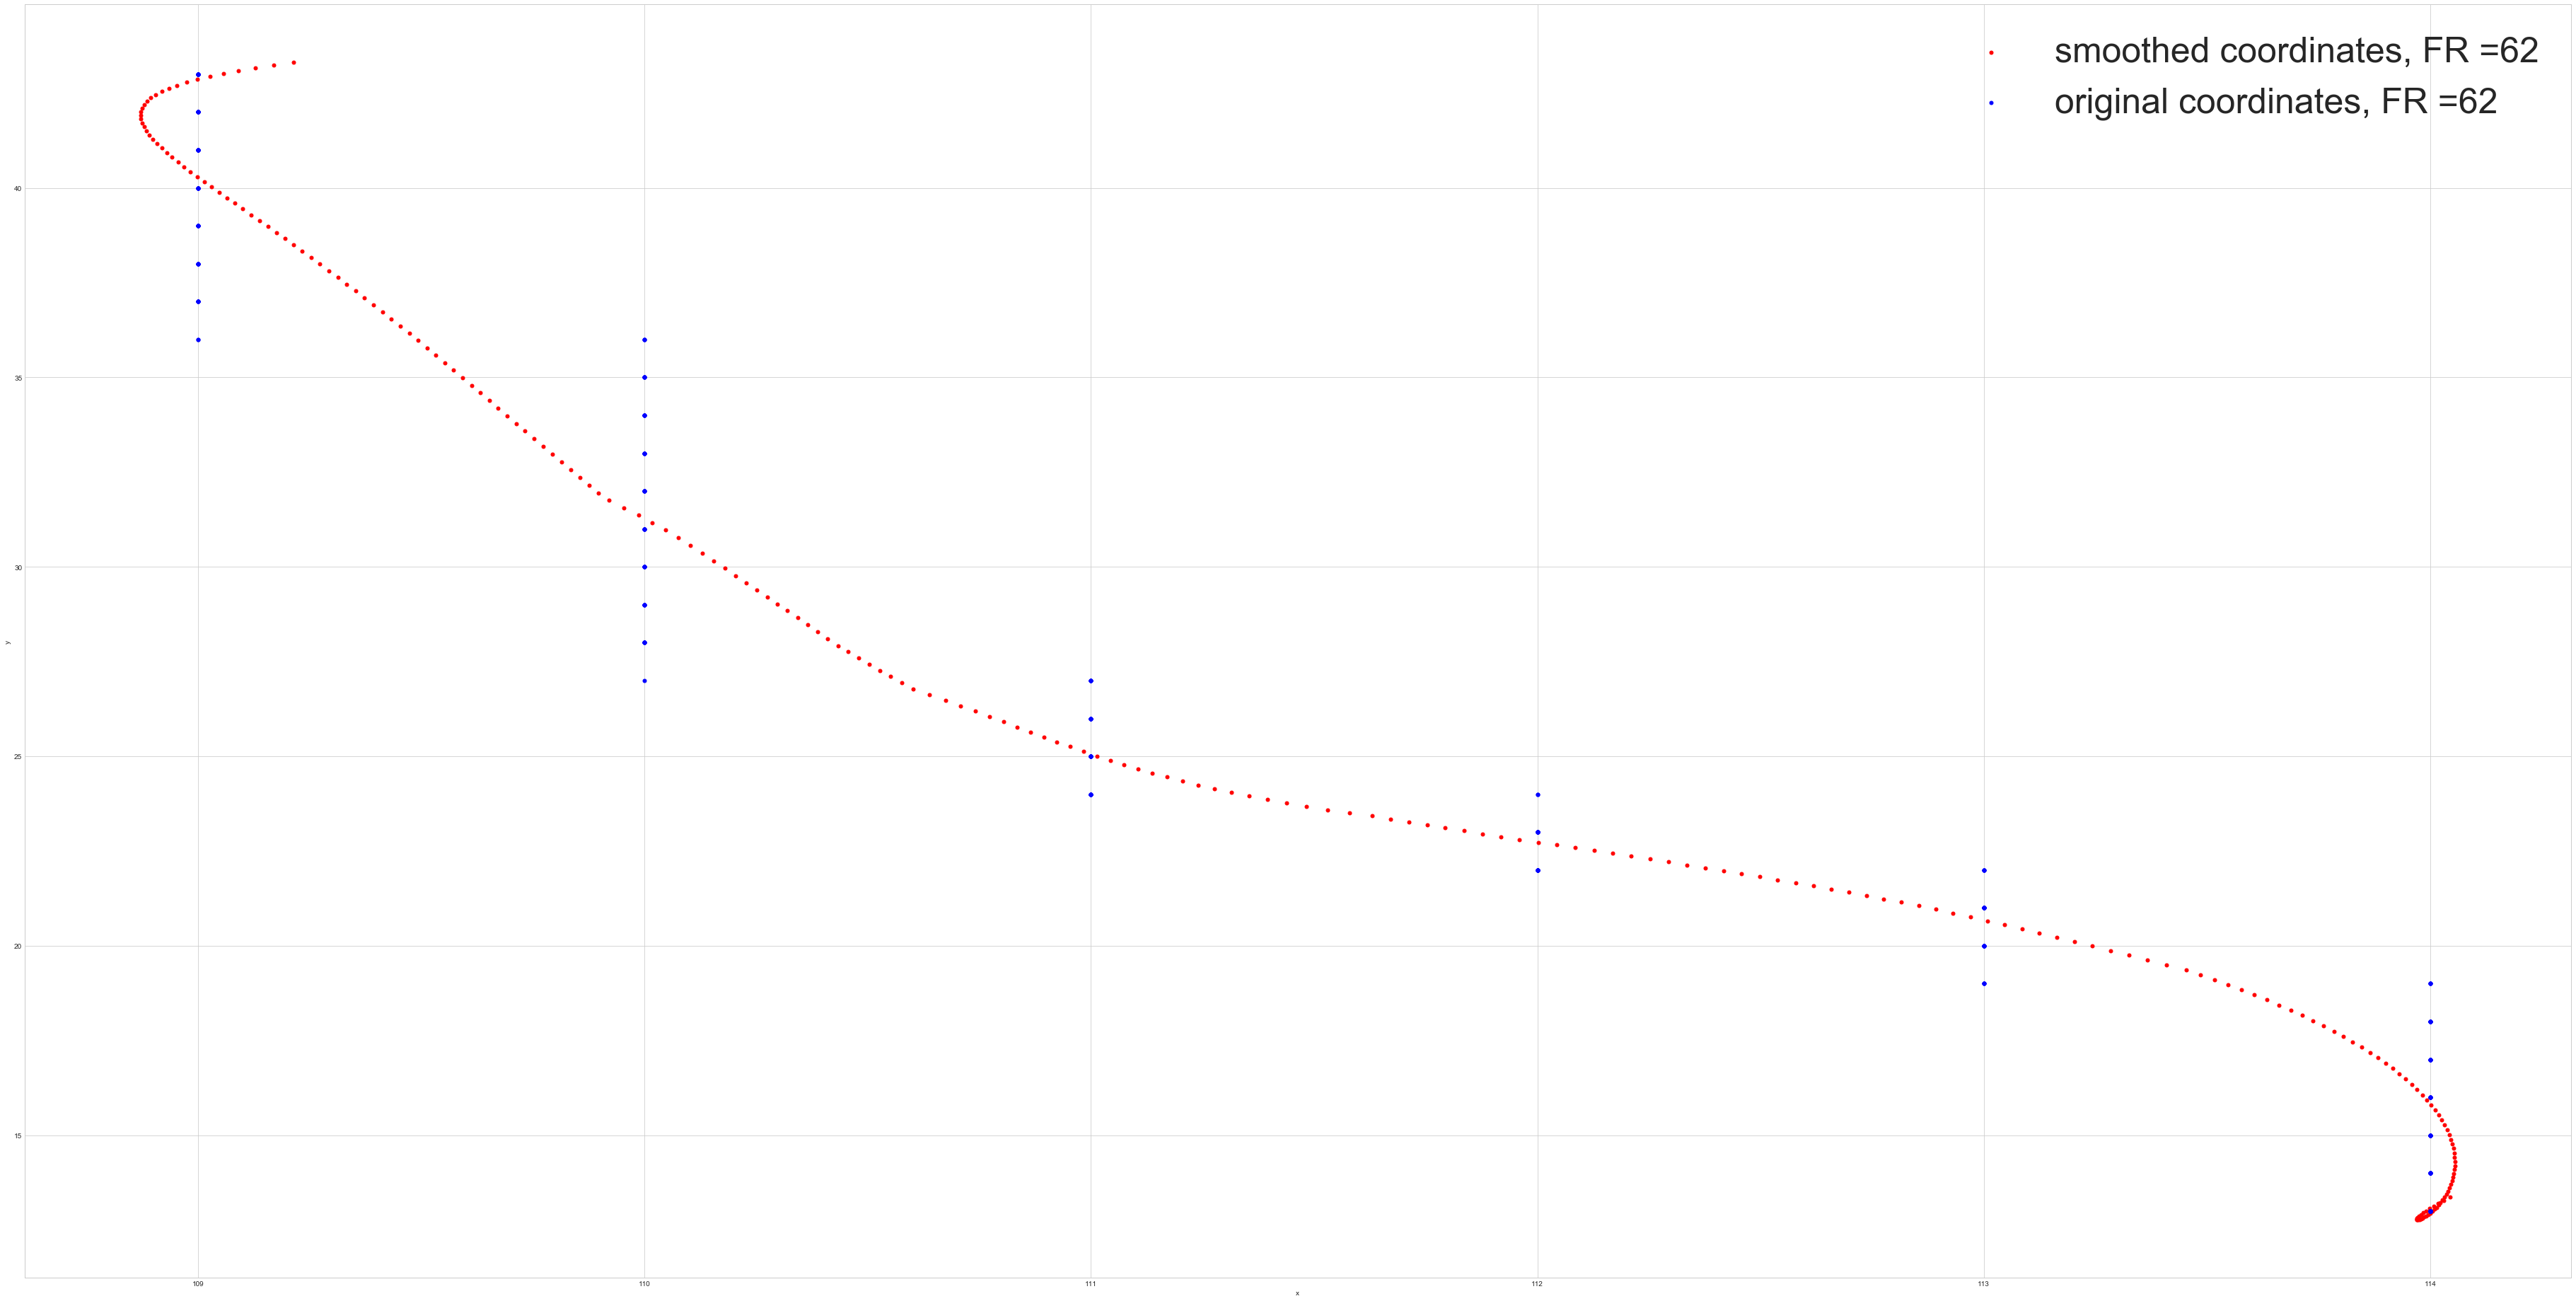

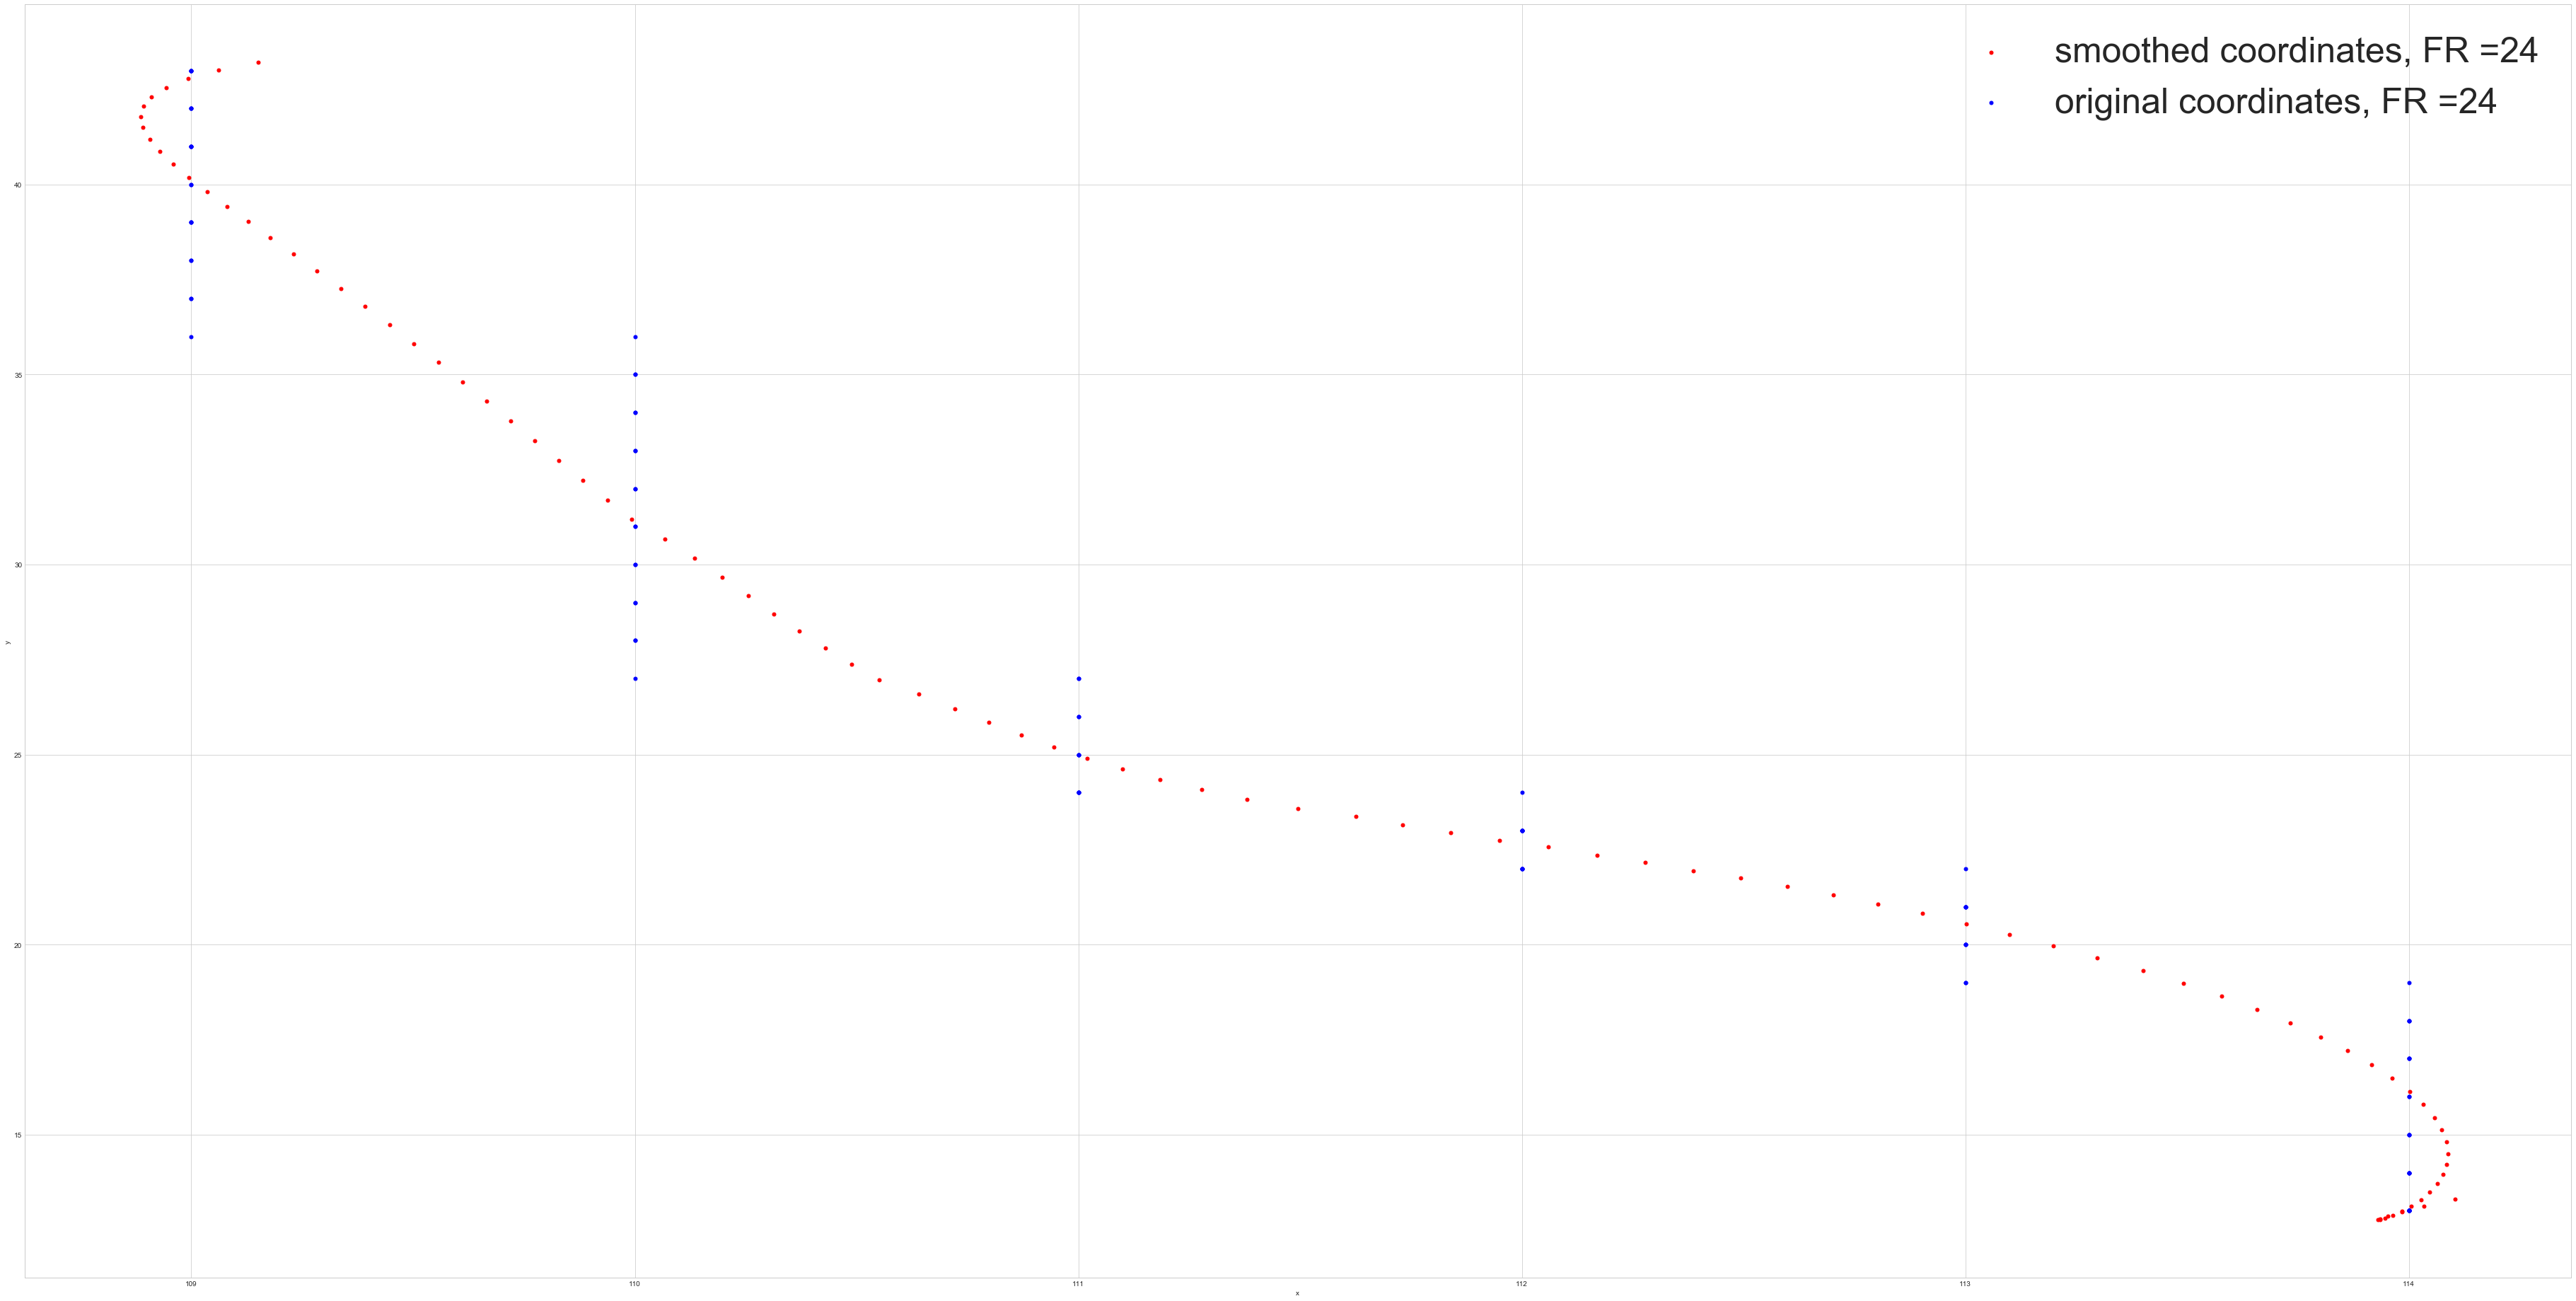

In [34]:
#curve 34 fr = 62, dip for frame (fr 24) 1100-1200
plotting_fun_for_curves.PlotCurve(34, 60, mode = 'both', zoom_in_for_fr_range = range(2750,3000))
plotting_fun_for_curves.PlotCurve(34, 62, mode = 'both', zoom_in_for_fr_range = range(2842,3100))
plotting_fun_for_curves.PlotCurve(34, 24, mode = 'both', zoom_in_for_fr_range = range(1100,1200))

In [ ]:
#small loop/sharp turn again (unrealistically sharp turn here)

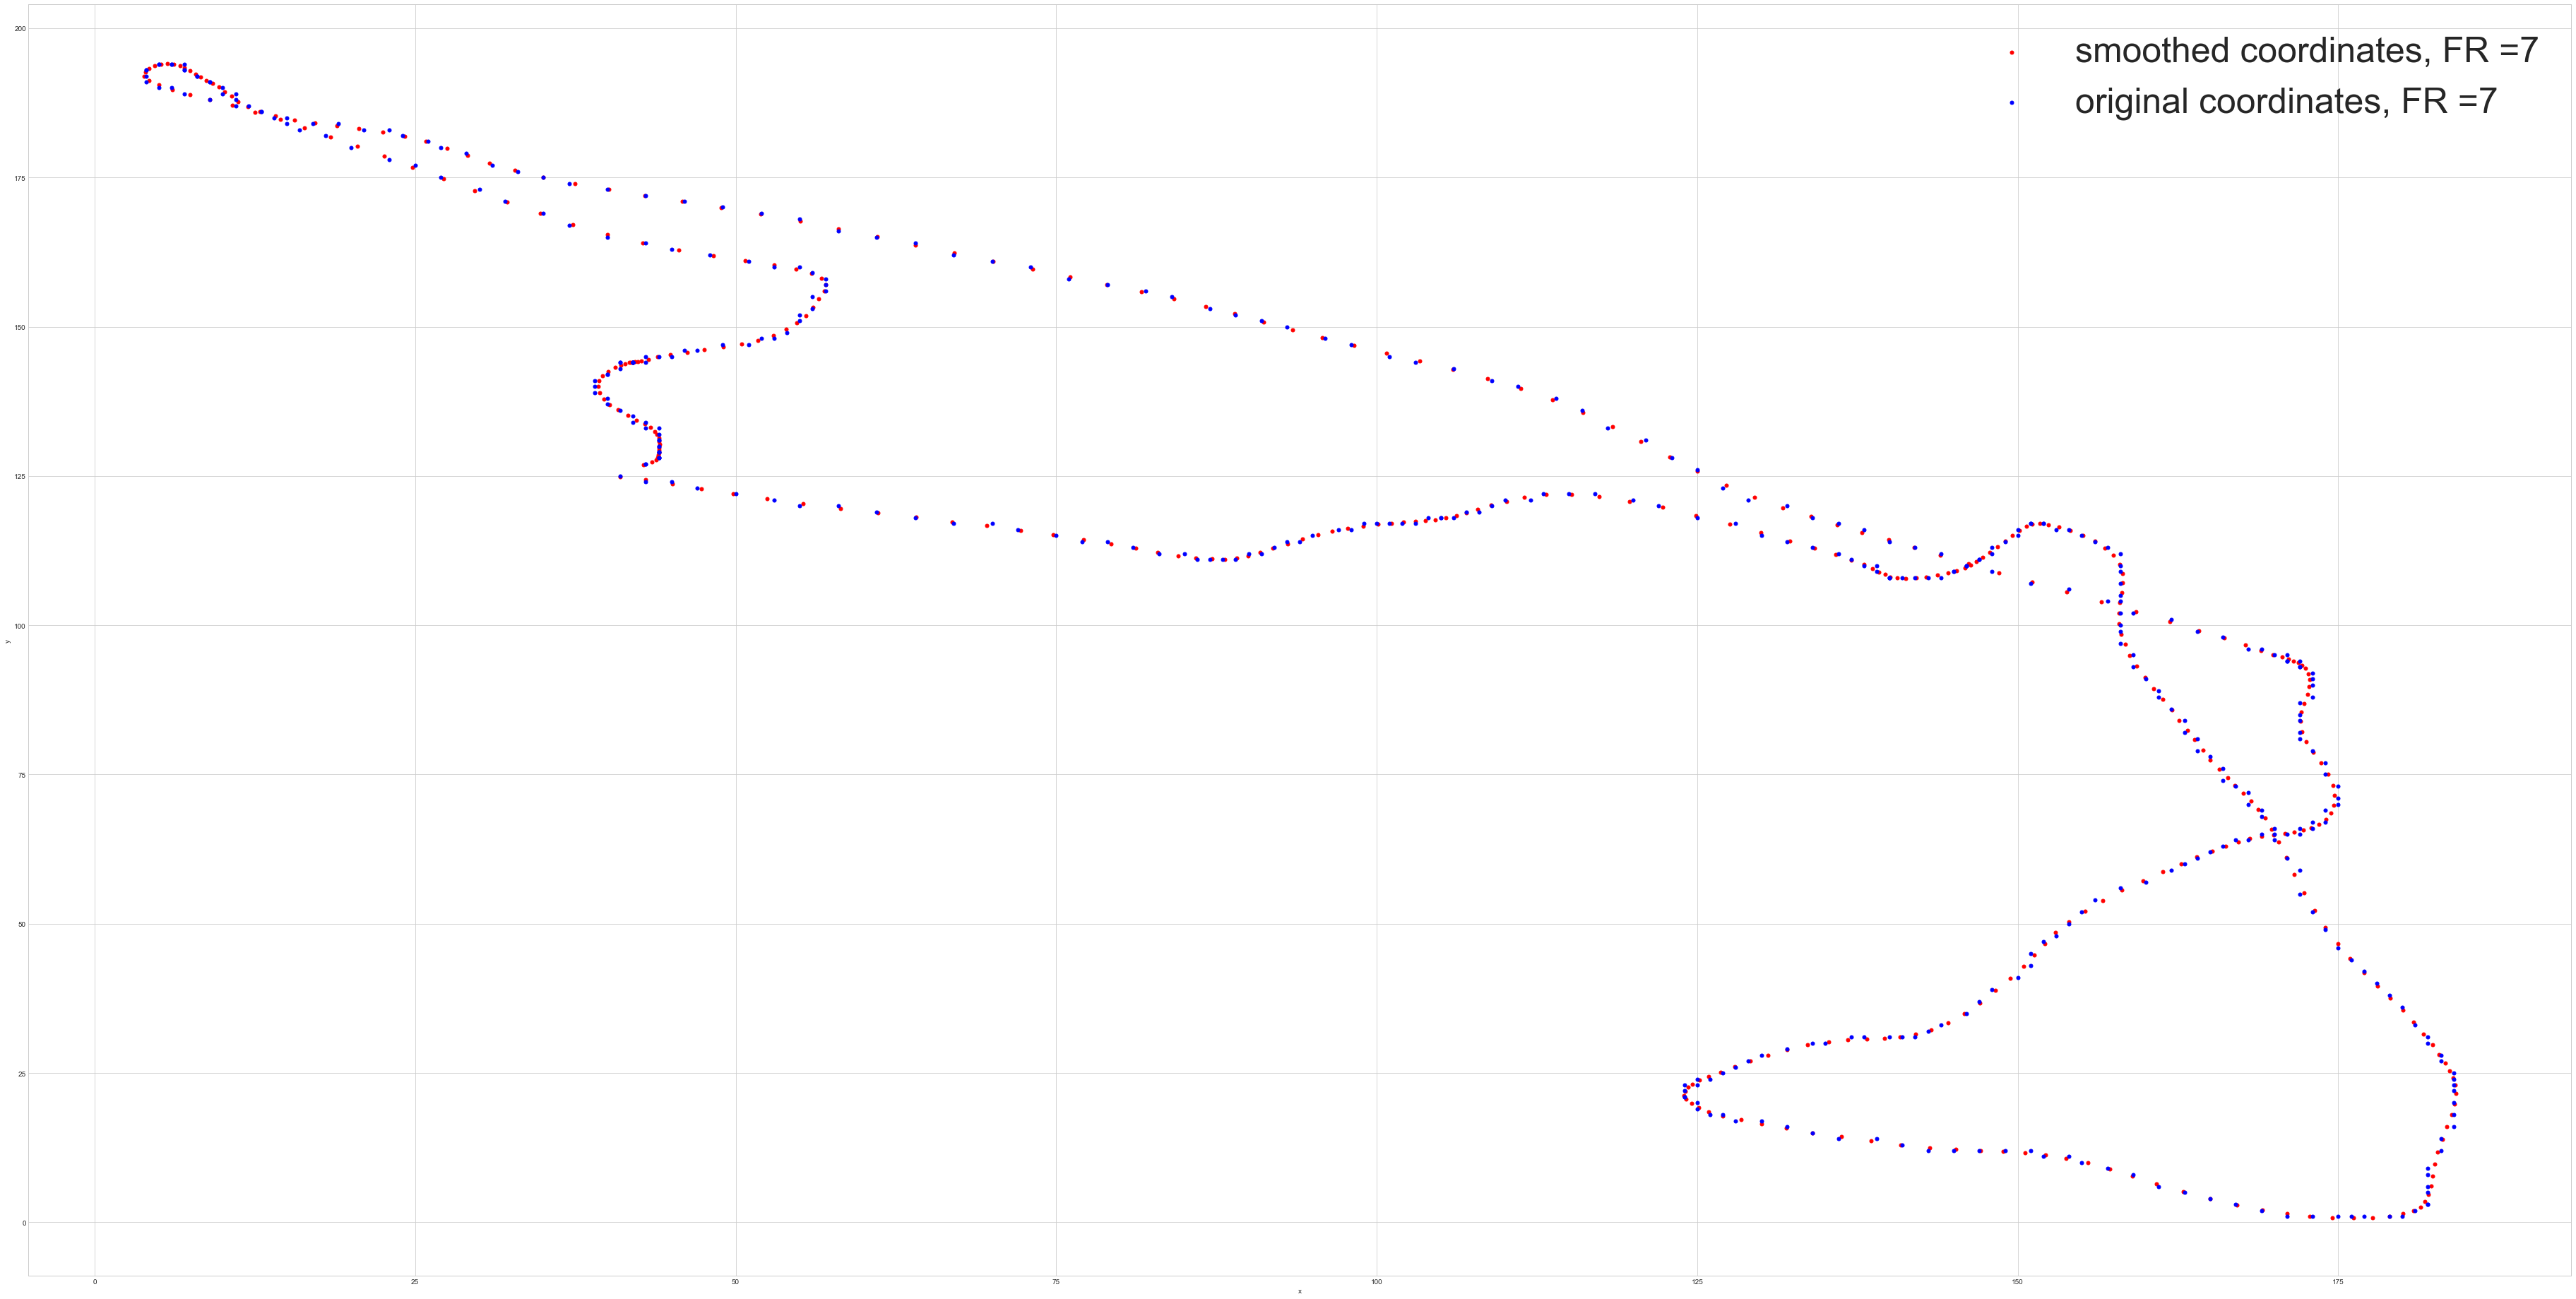

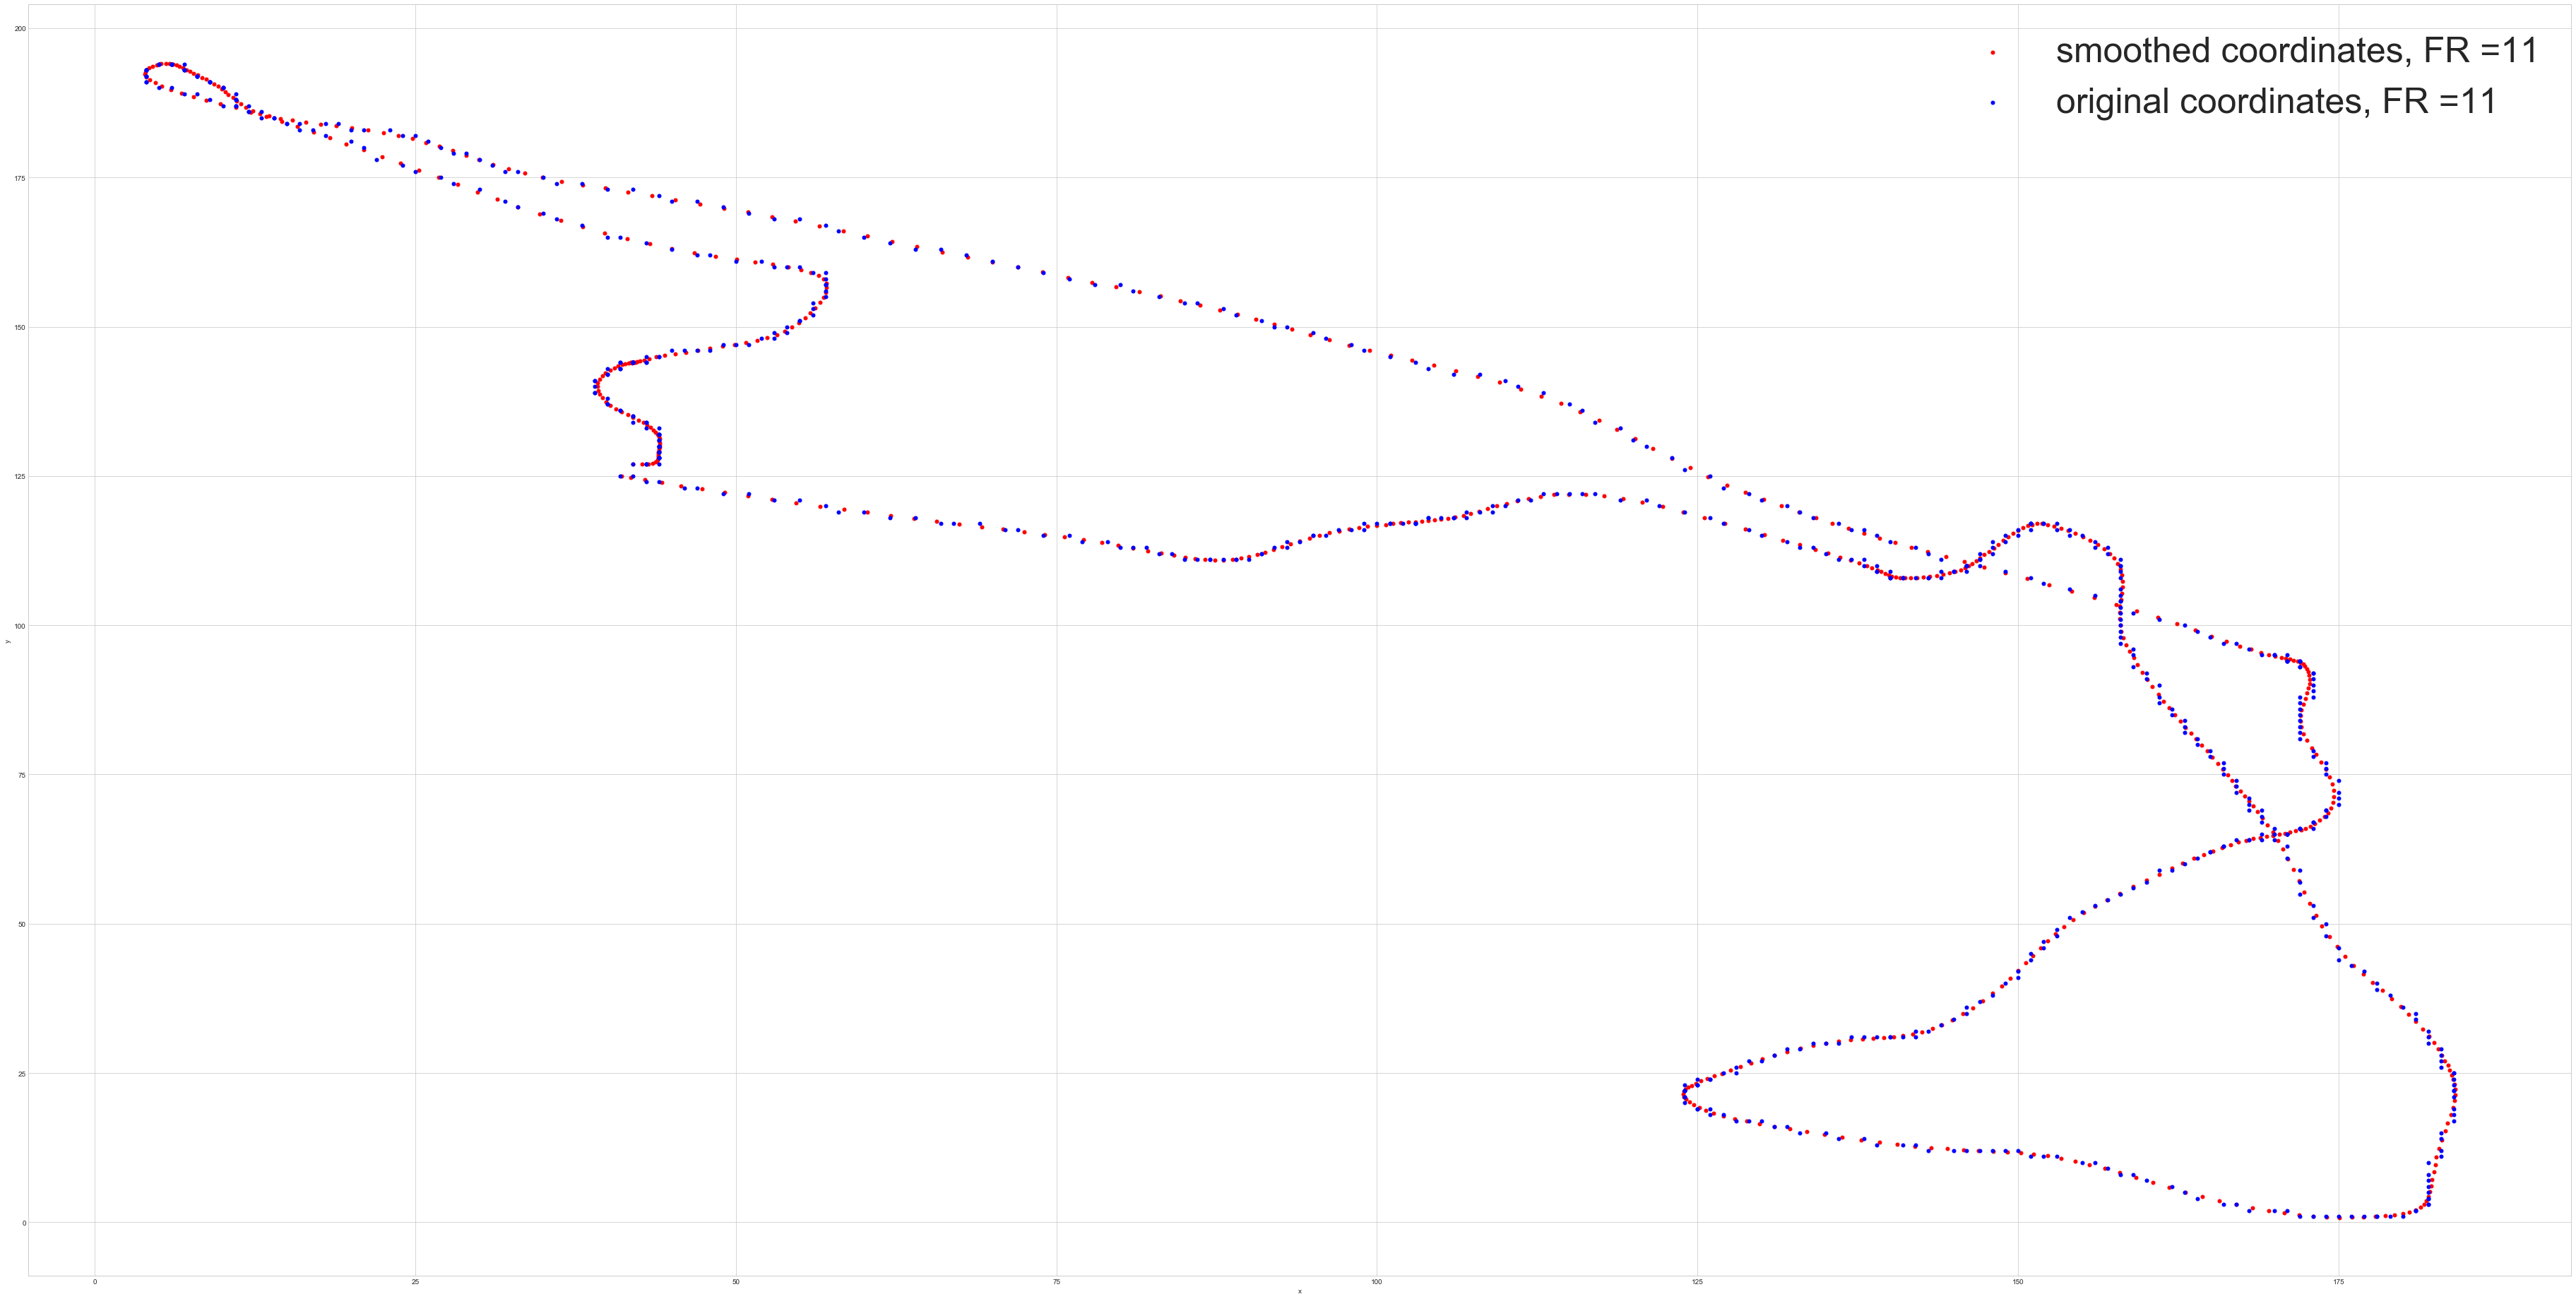

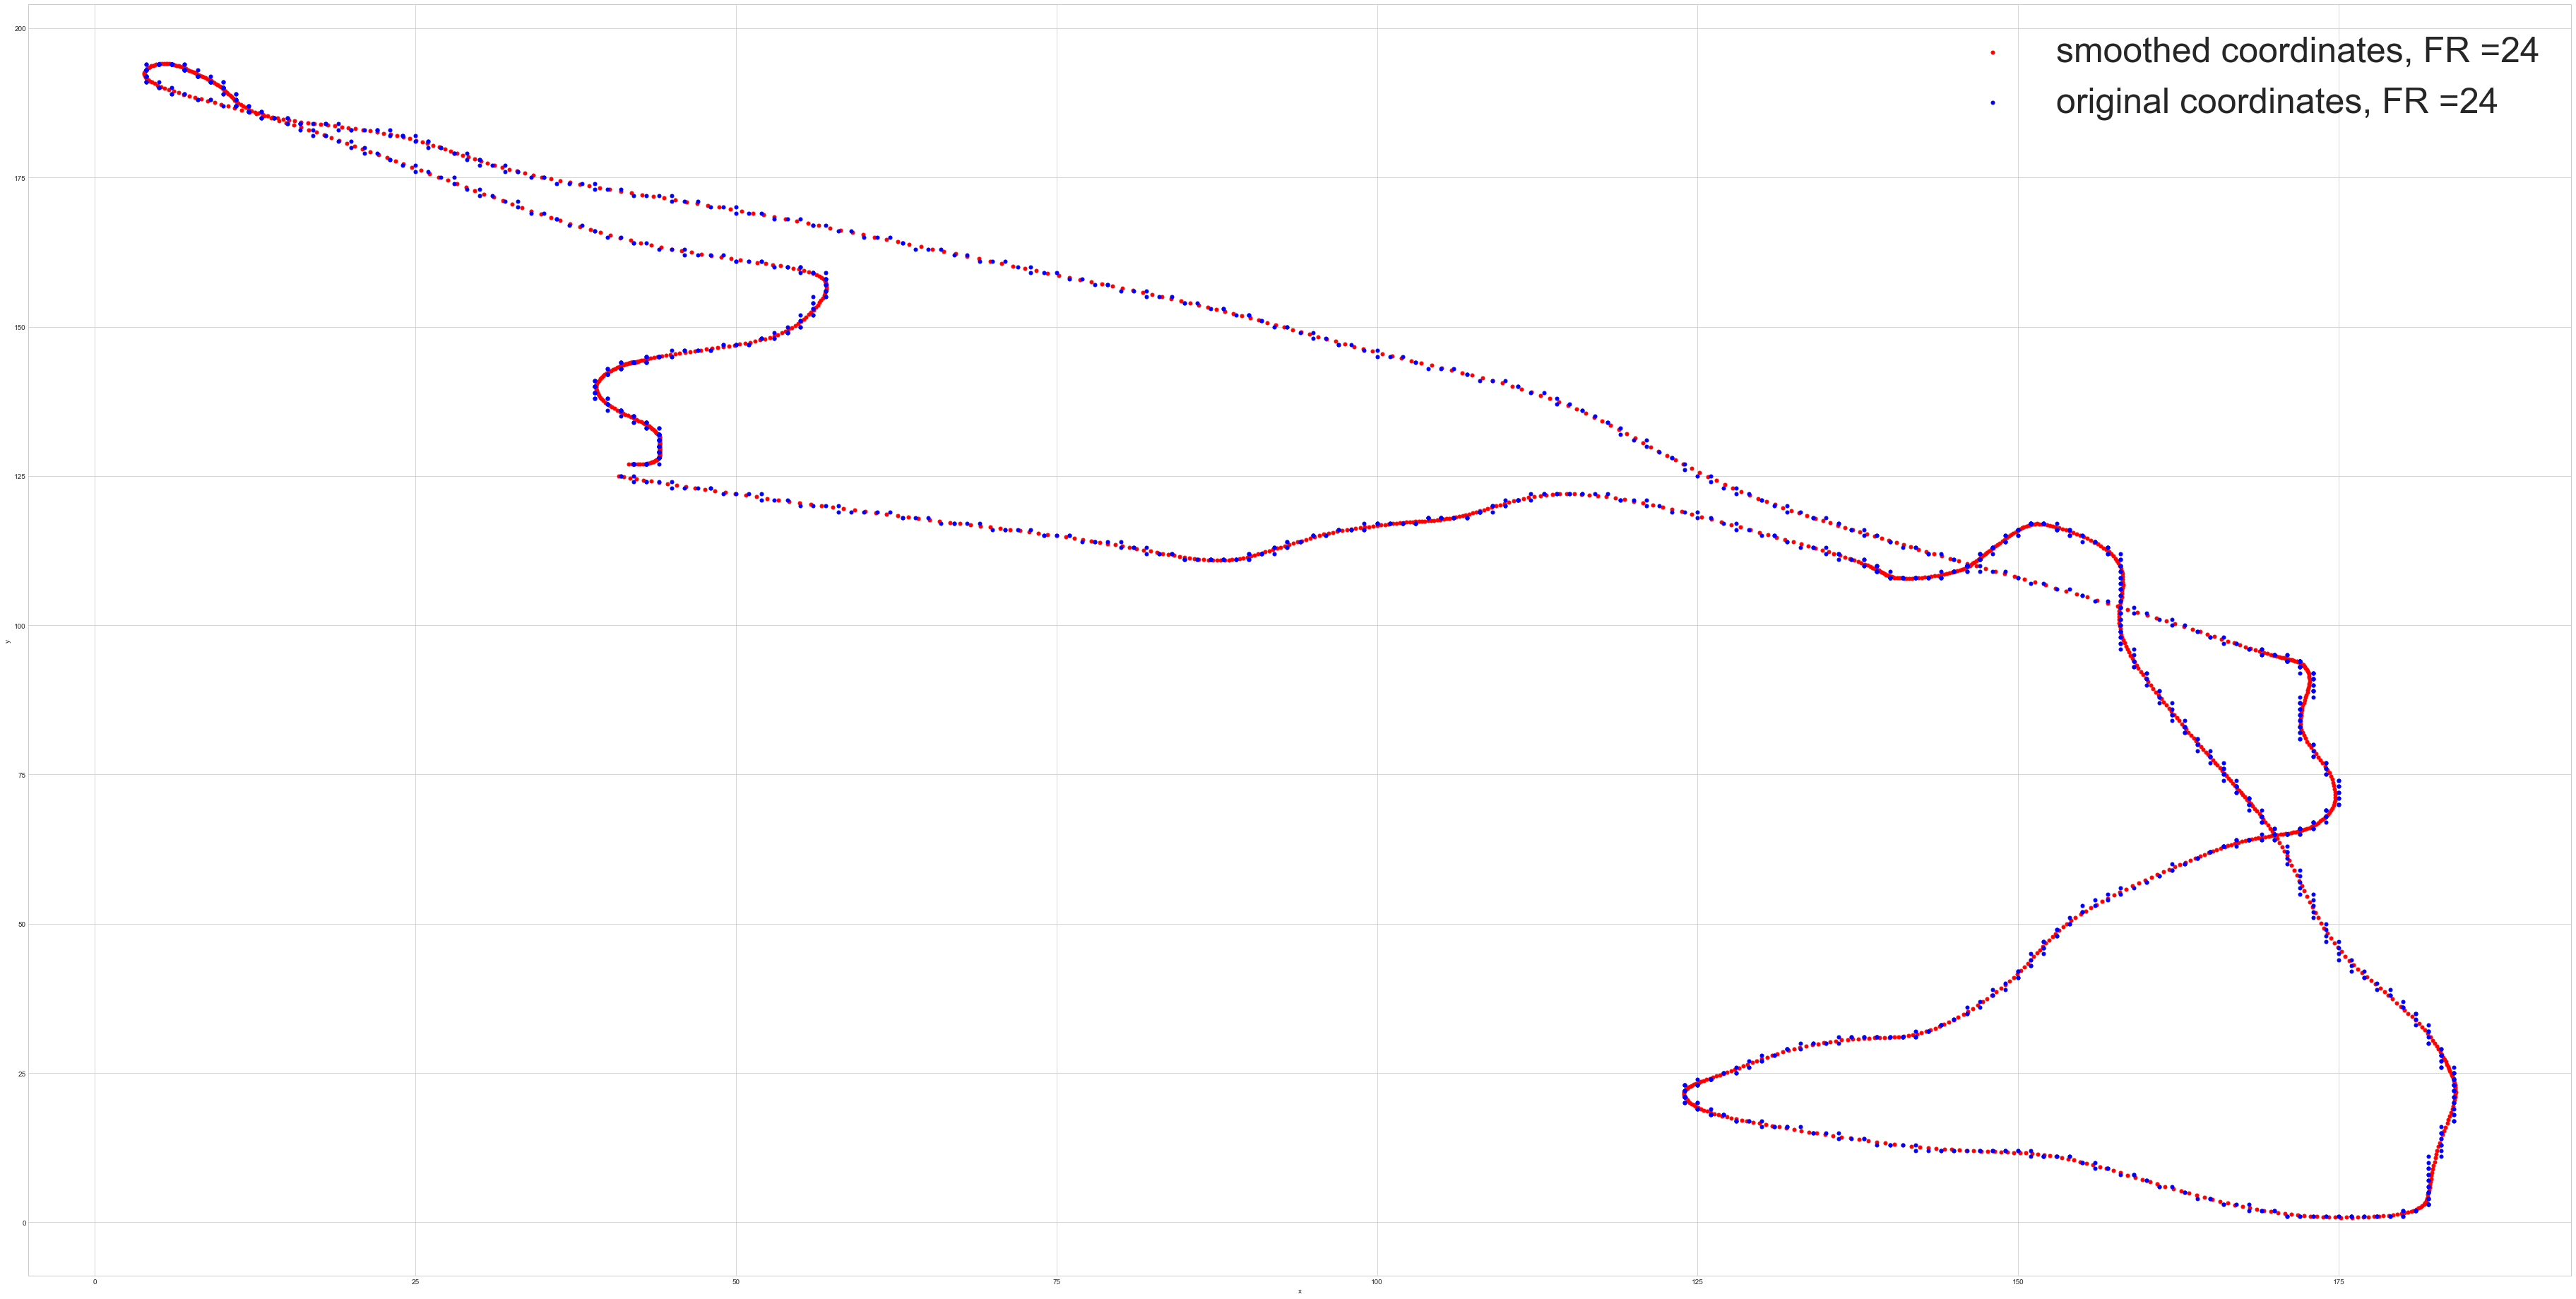

In [35]:
#curve 38, FR = (7, 11), FR_low trial no (01, 05)
plotting_fun_for_curves.PlotCurve(38, 7, mode = 'both')
plotting_fun_for_curves.PlotCurve(38, 11, mode = 'both')
plotting_fun_for_curves.PlotCurve(38, 24, mode = 'both')

#a lot of turns and twists so probably susceptible to differences in FR for low FR

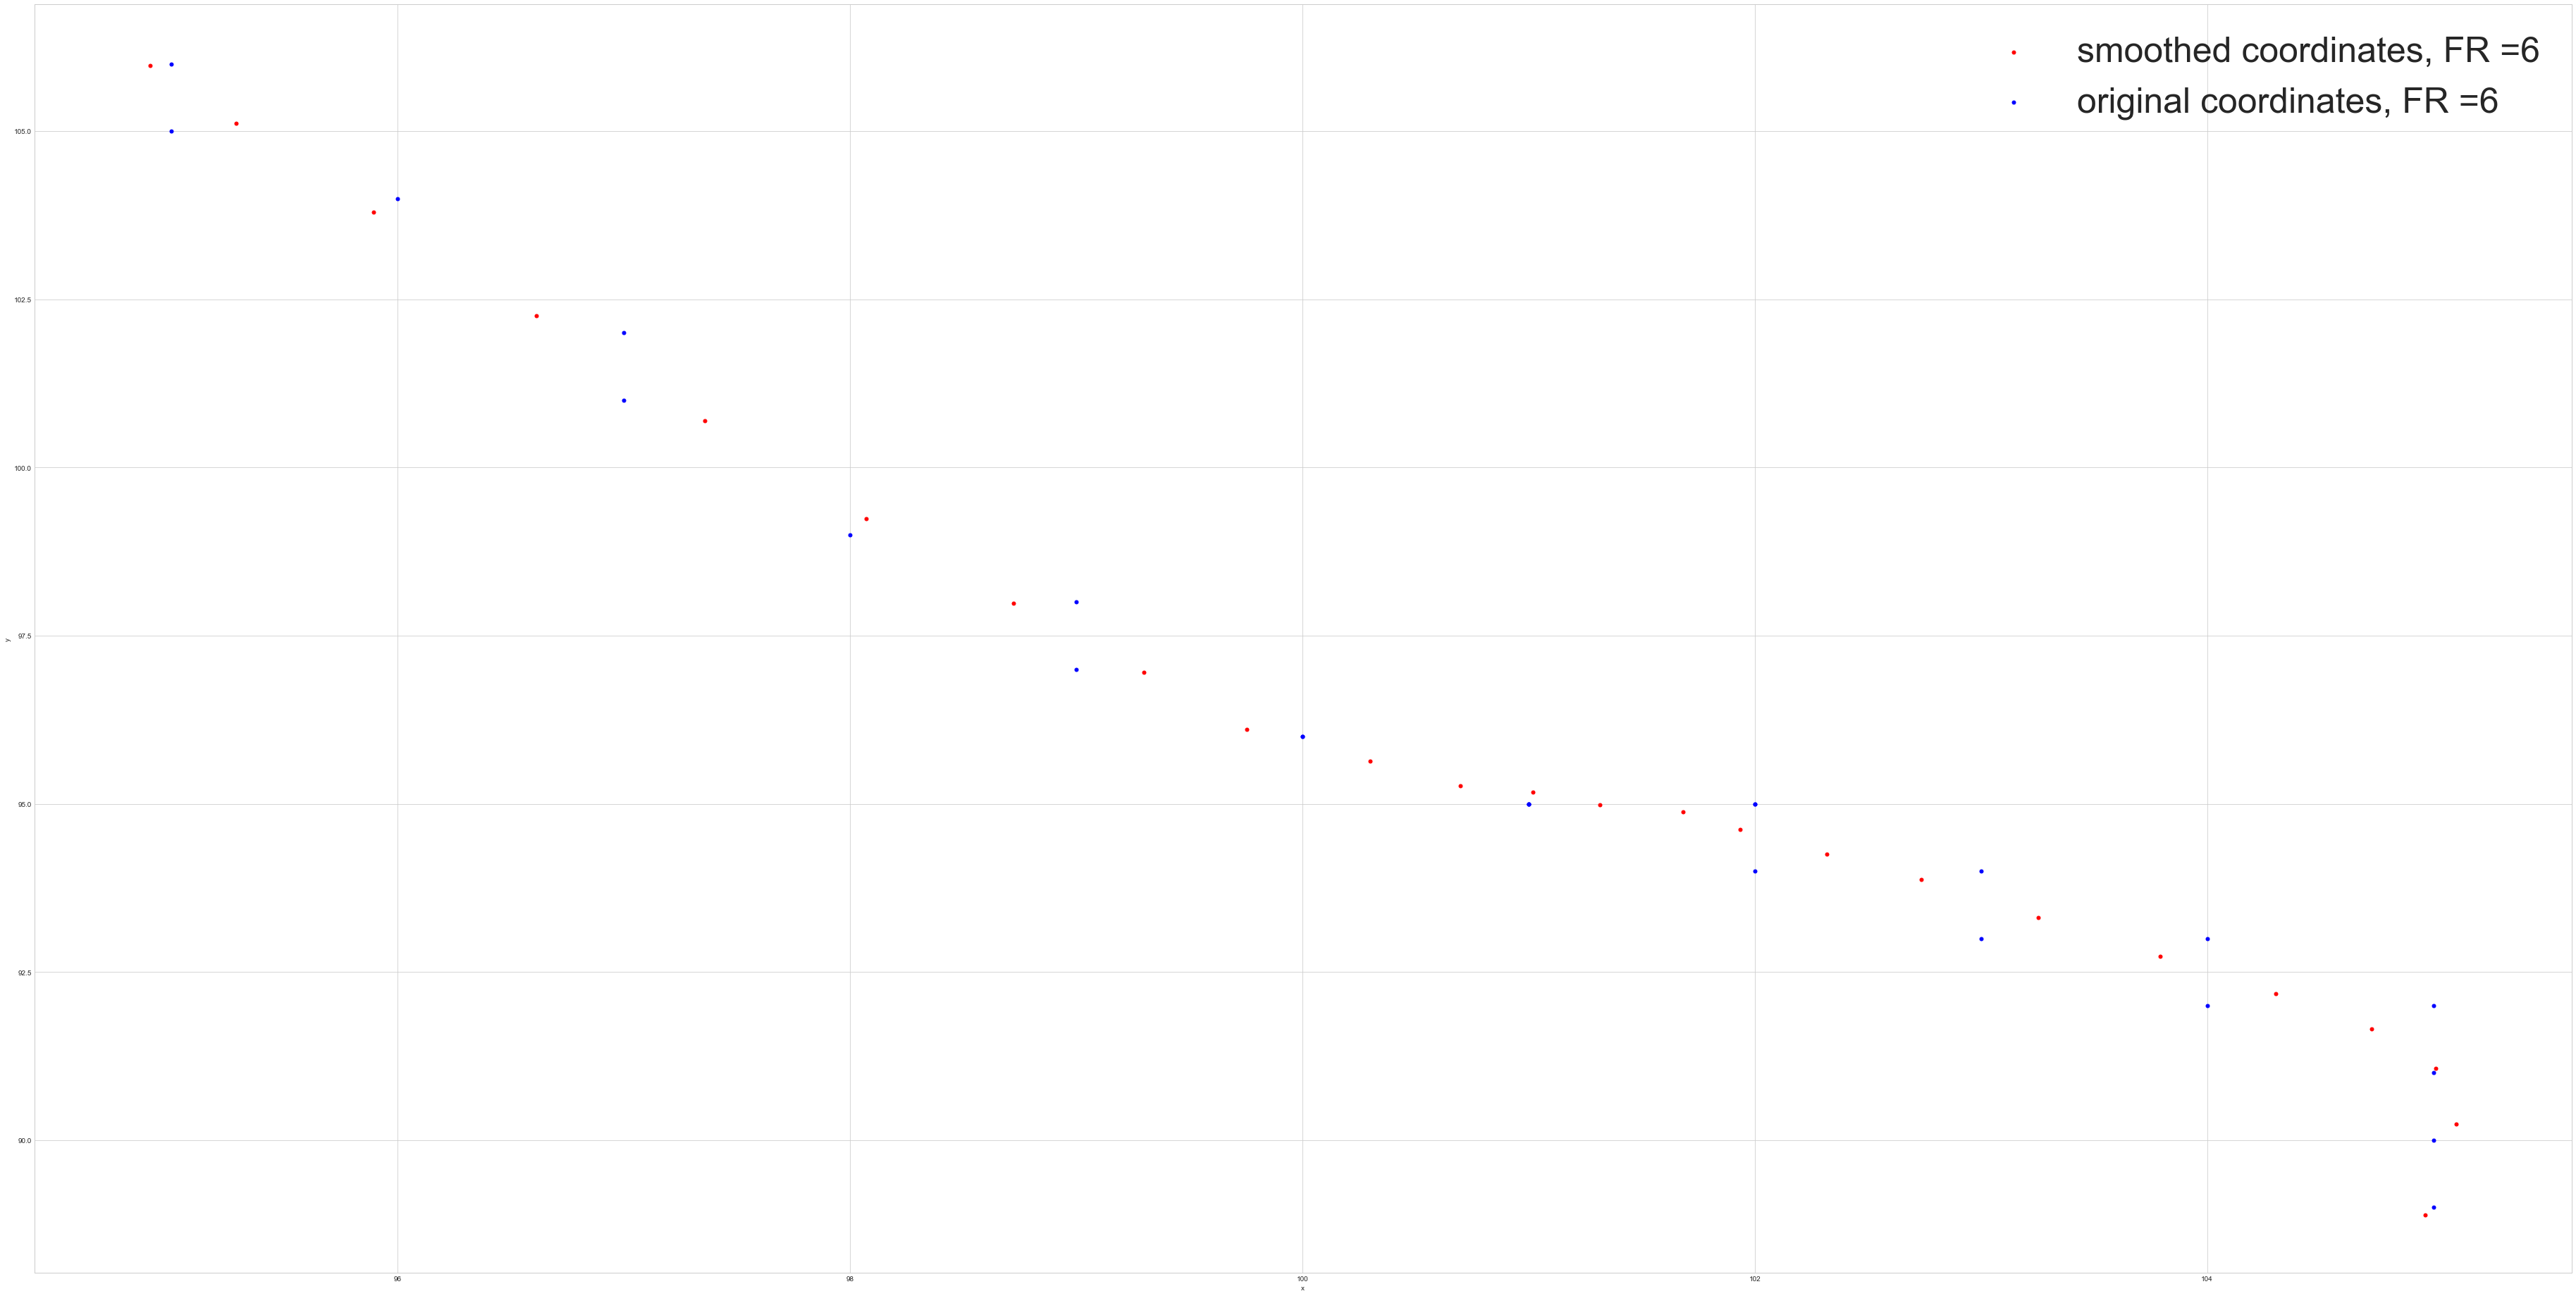

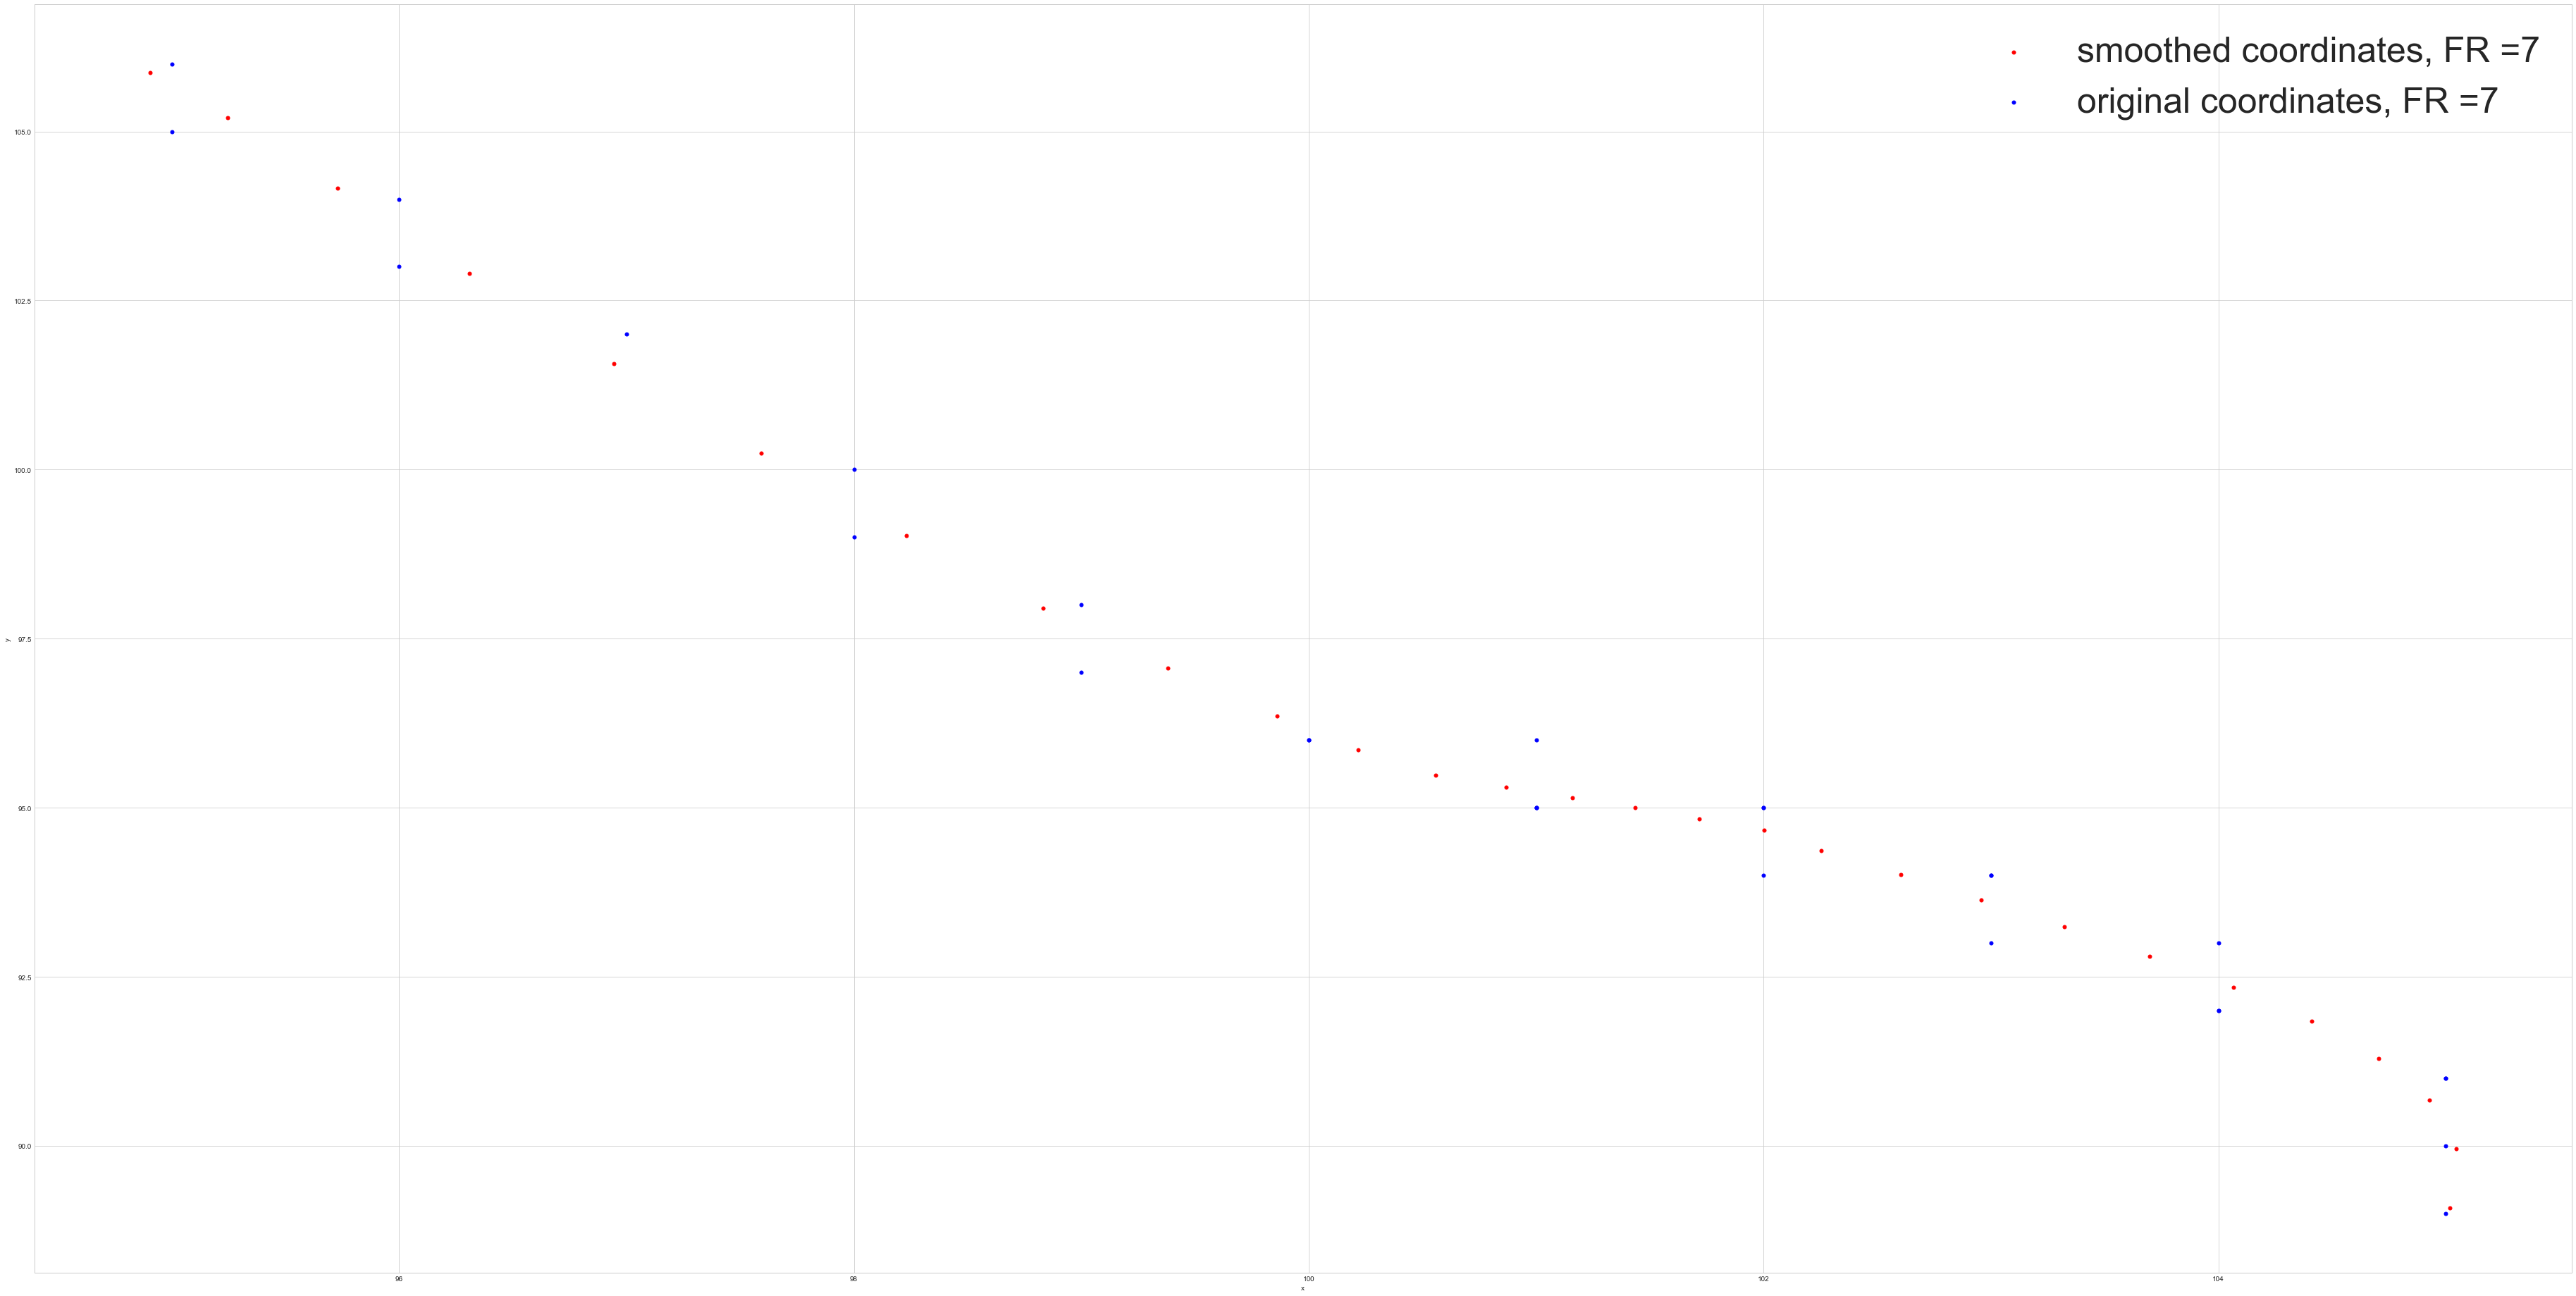

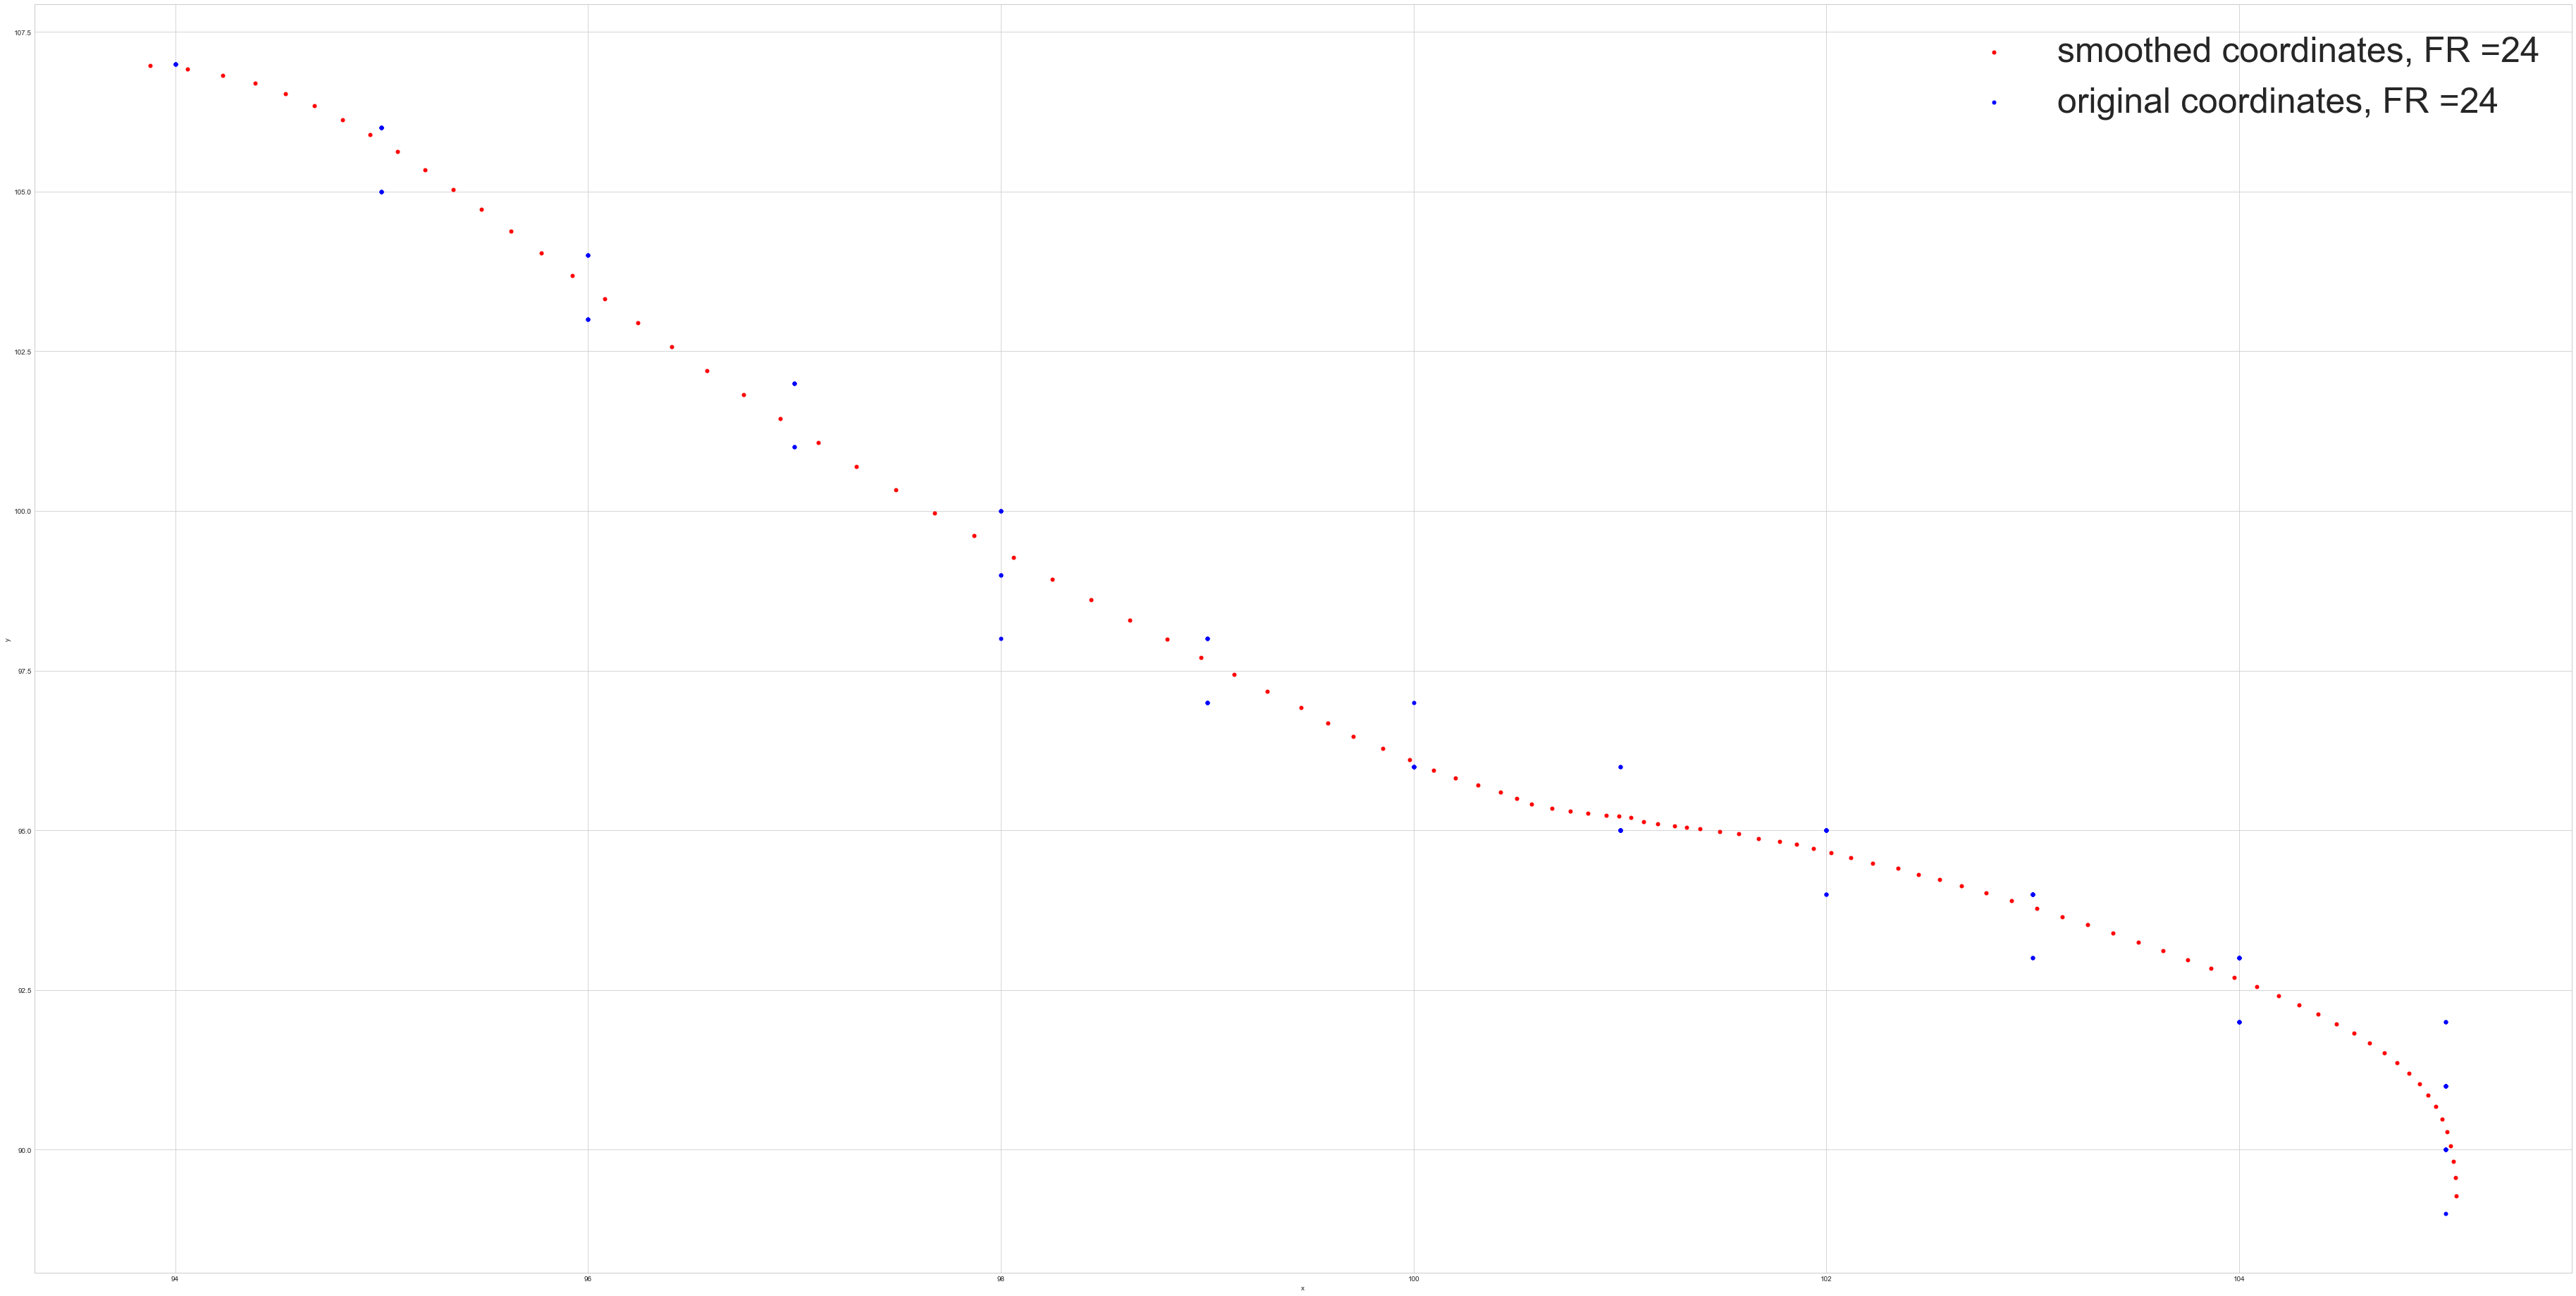

In [36]:
#curve 38 fr = 7, high distance/dip for frames 1300-1400 (fr = 24), also 200-370

plotting_fun_for_curves.PlotCurve(34, 6, mode = 'both', zoom_in_for_fr_range = range(325,350))
plotting_fun_for_curves.PlotCurve(34, 7, mode = 'both', zoom_in_for_fr_range = range(379,408))
plotting_fun_for_curves.PlotCurve(34, 24, mode = 'both', zoom_in_for_fr_range = range(1300,1400))

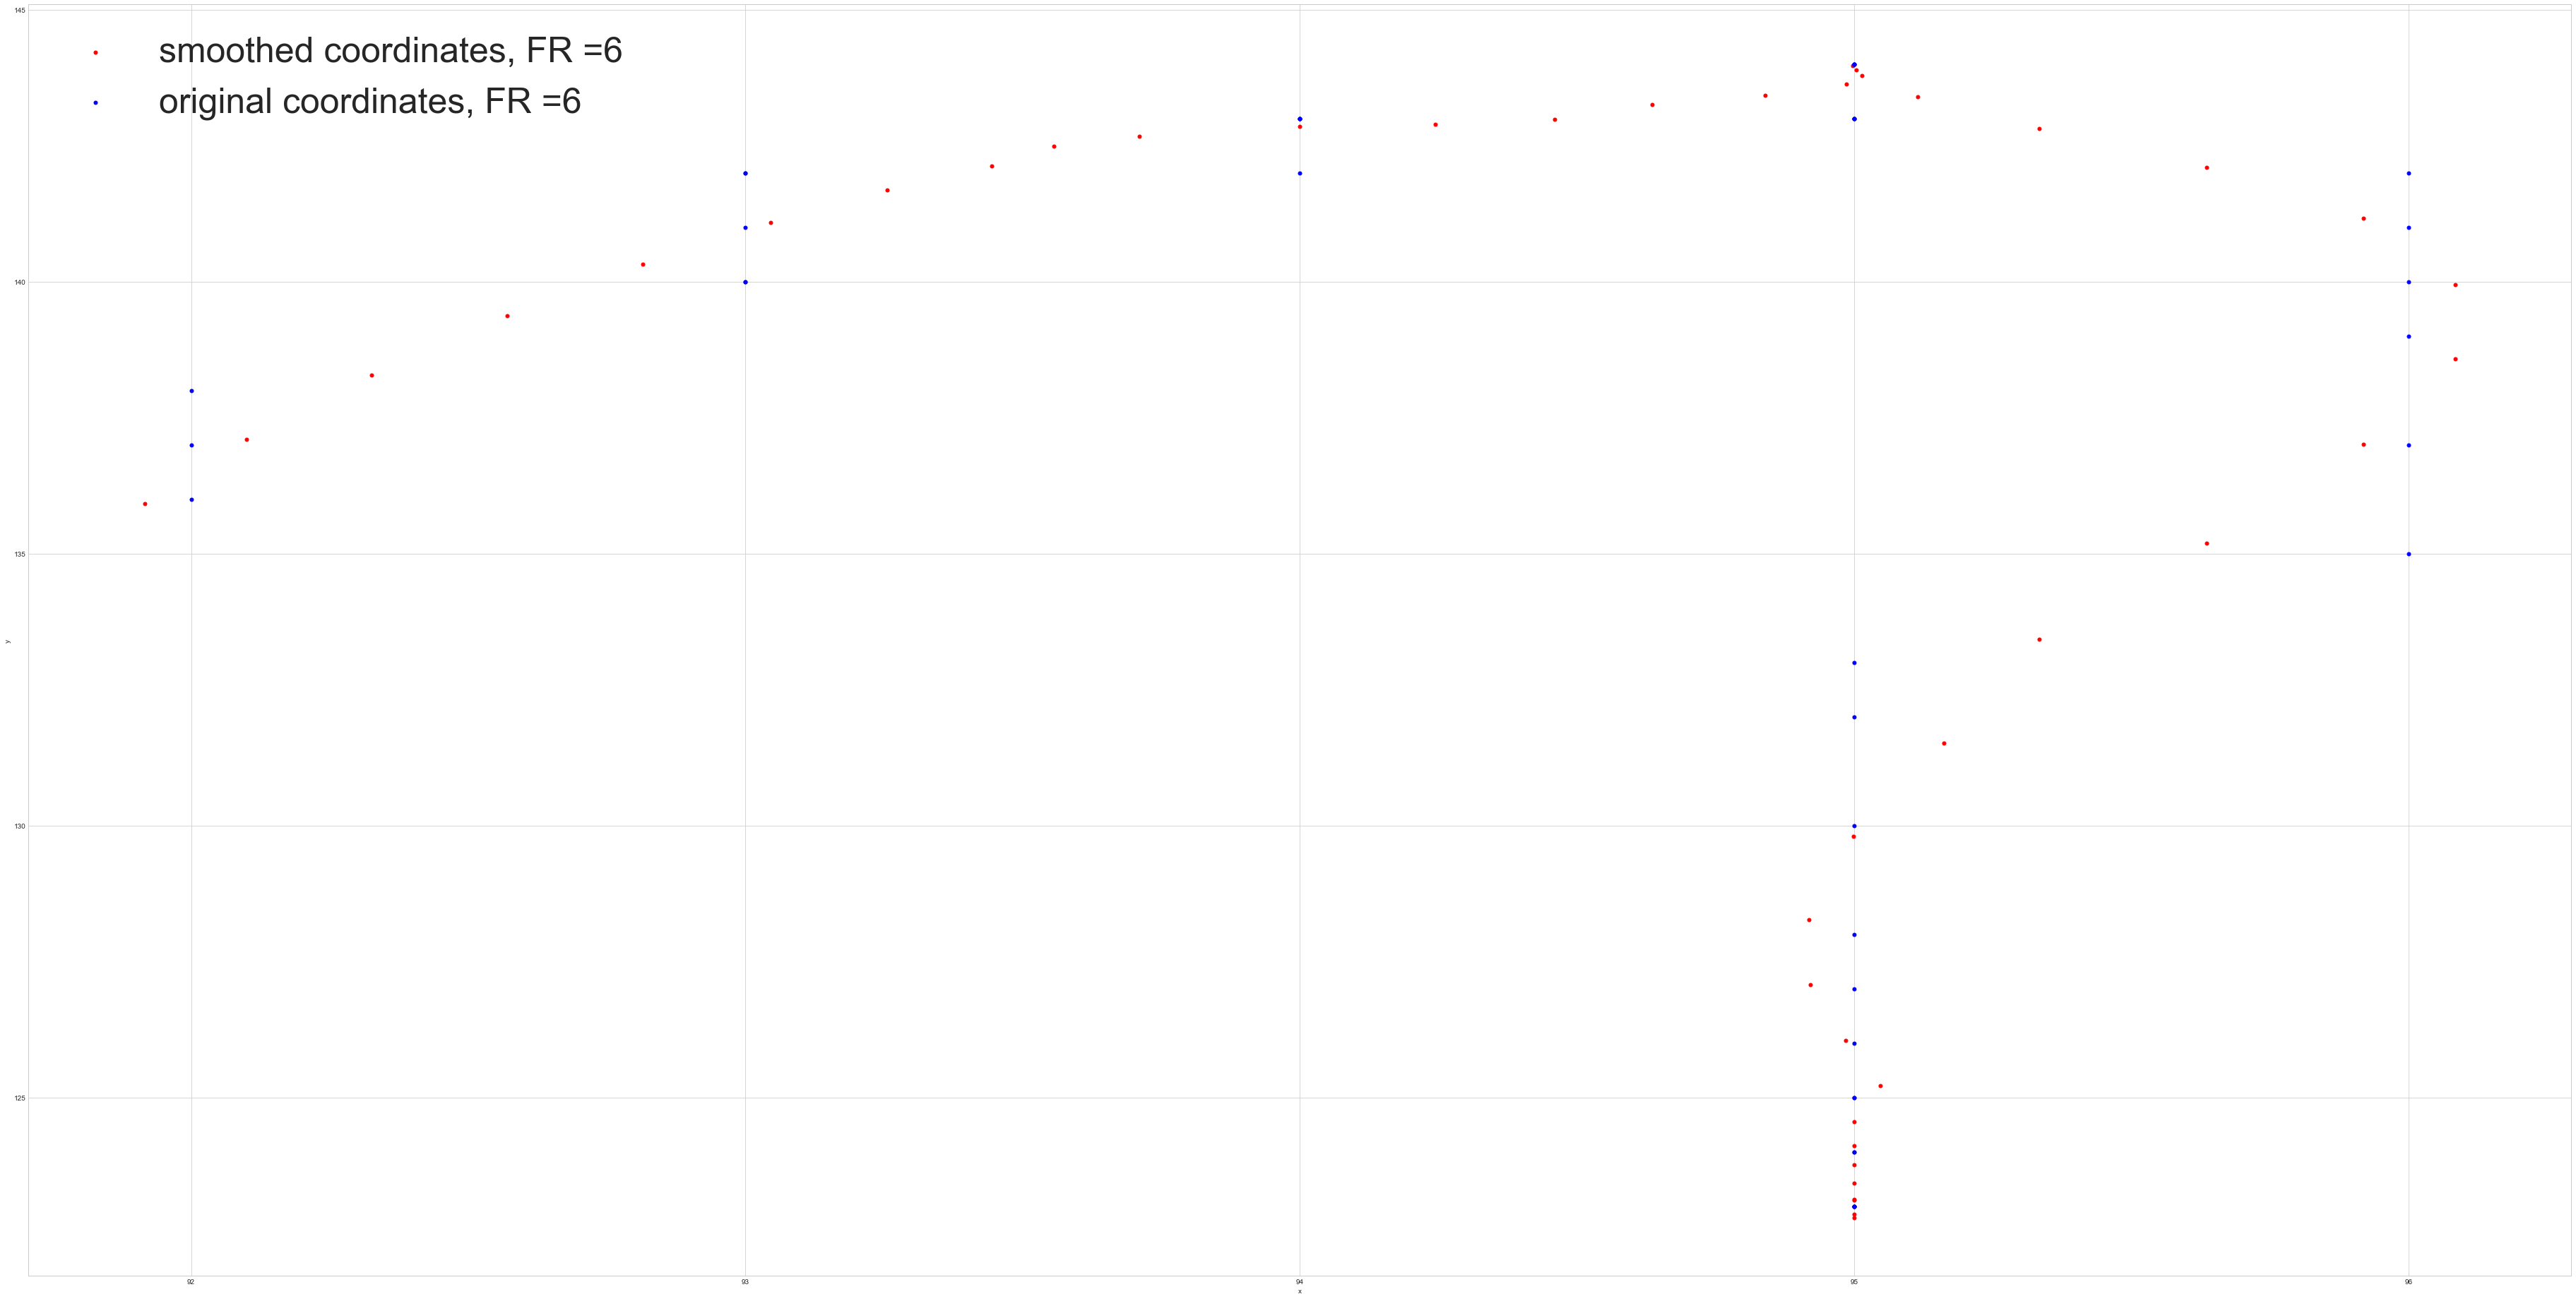

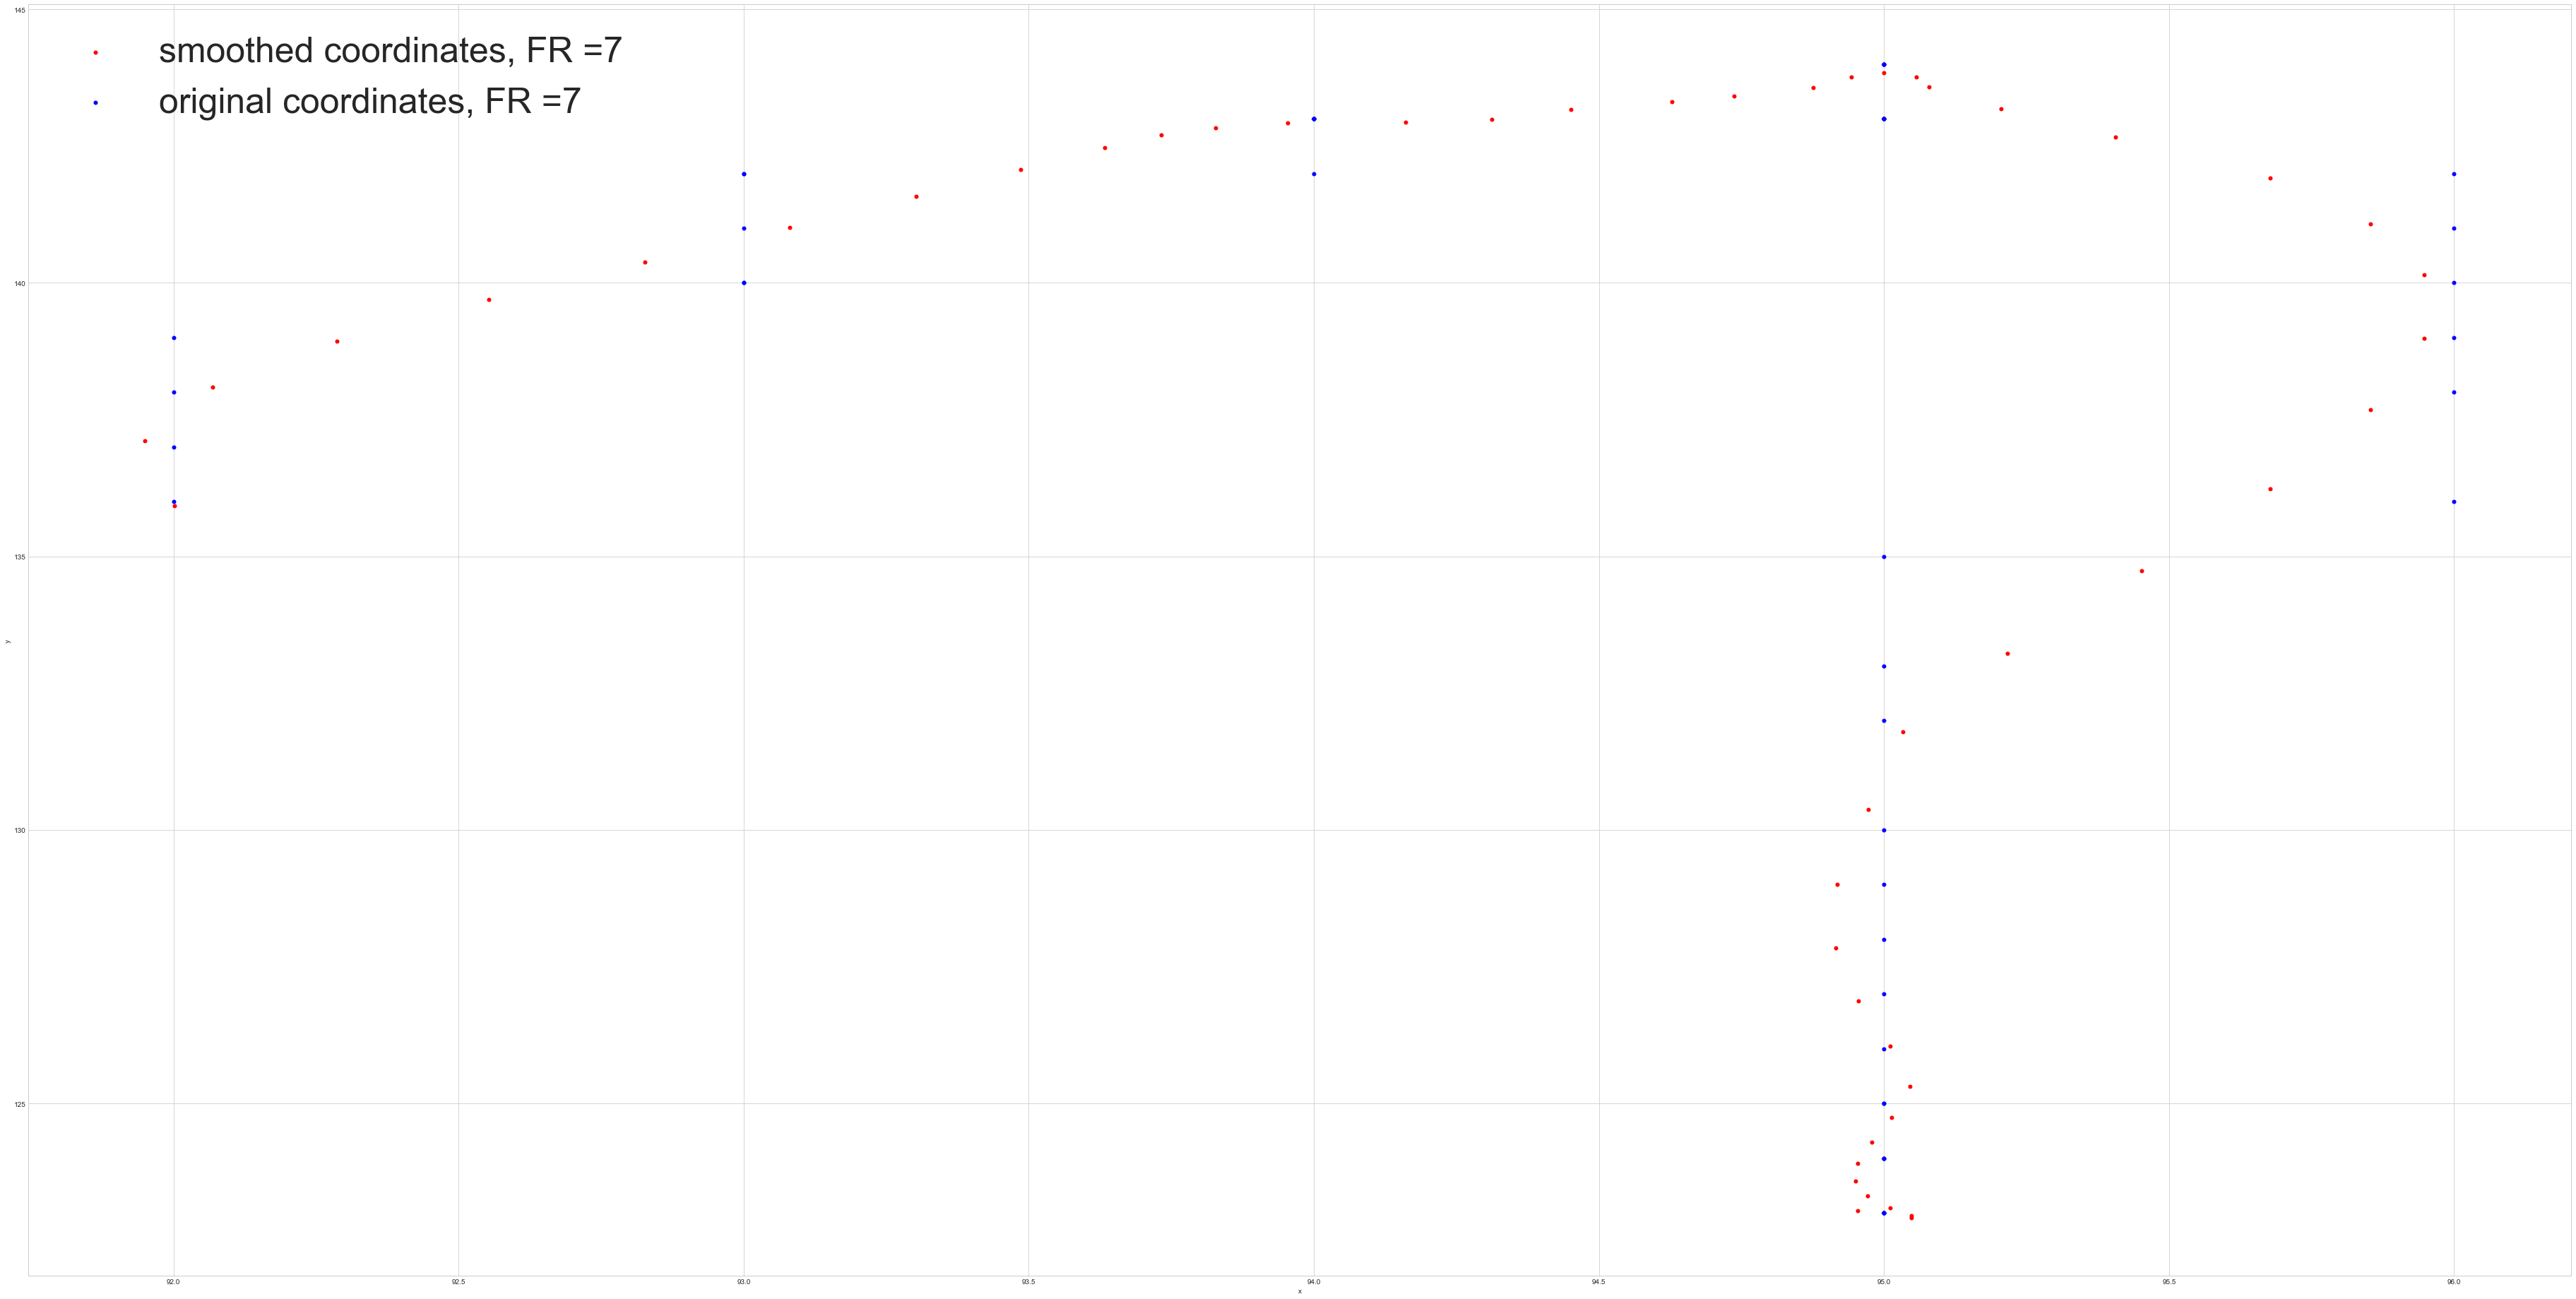

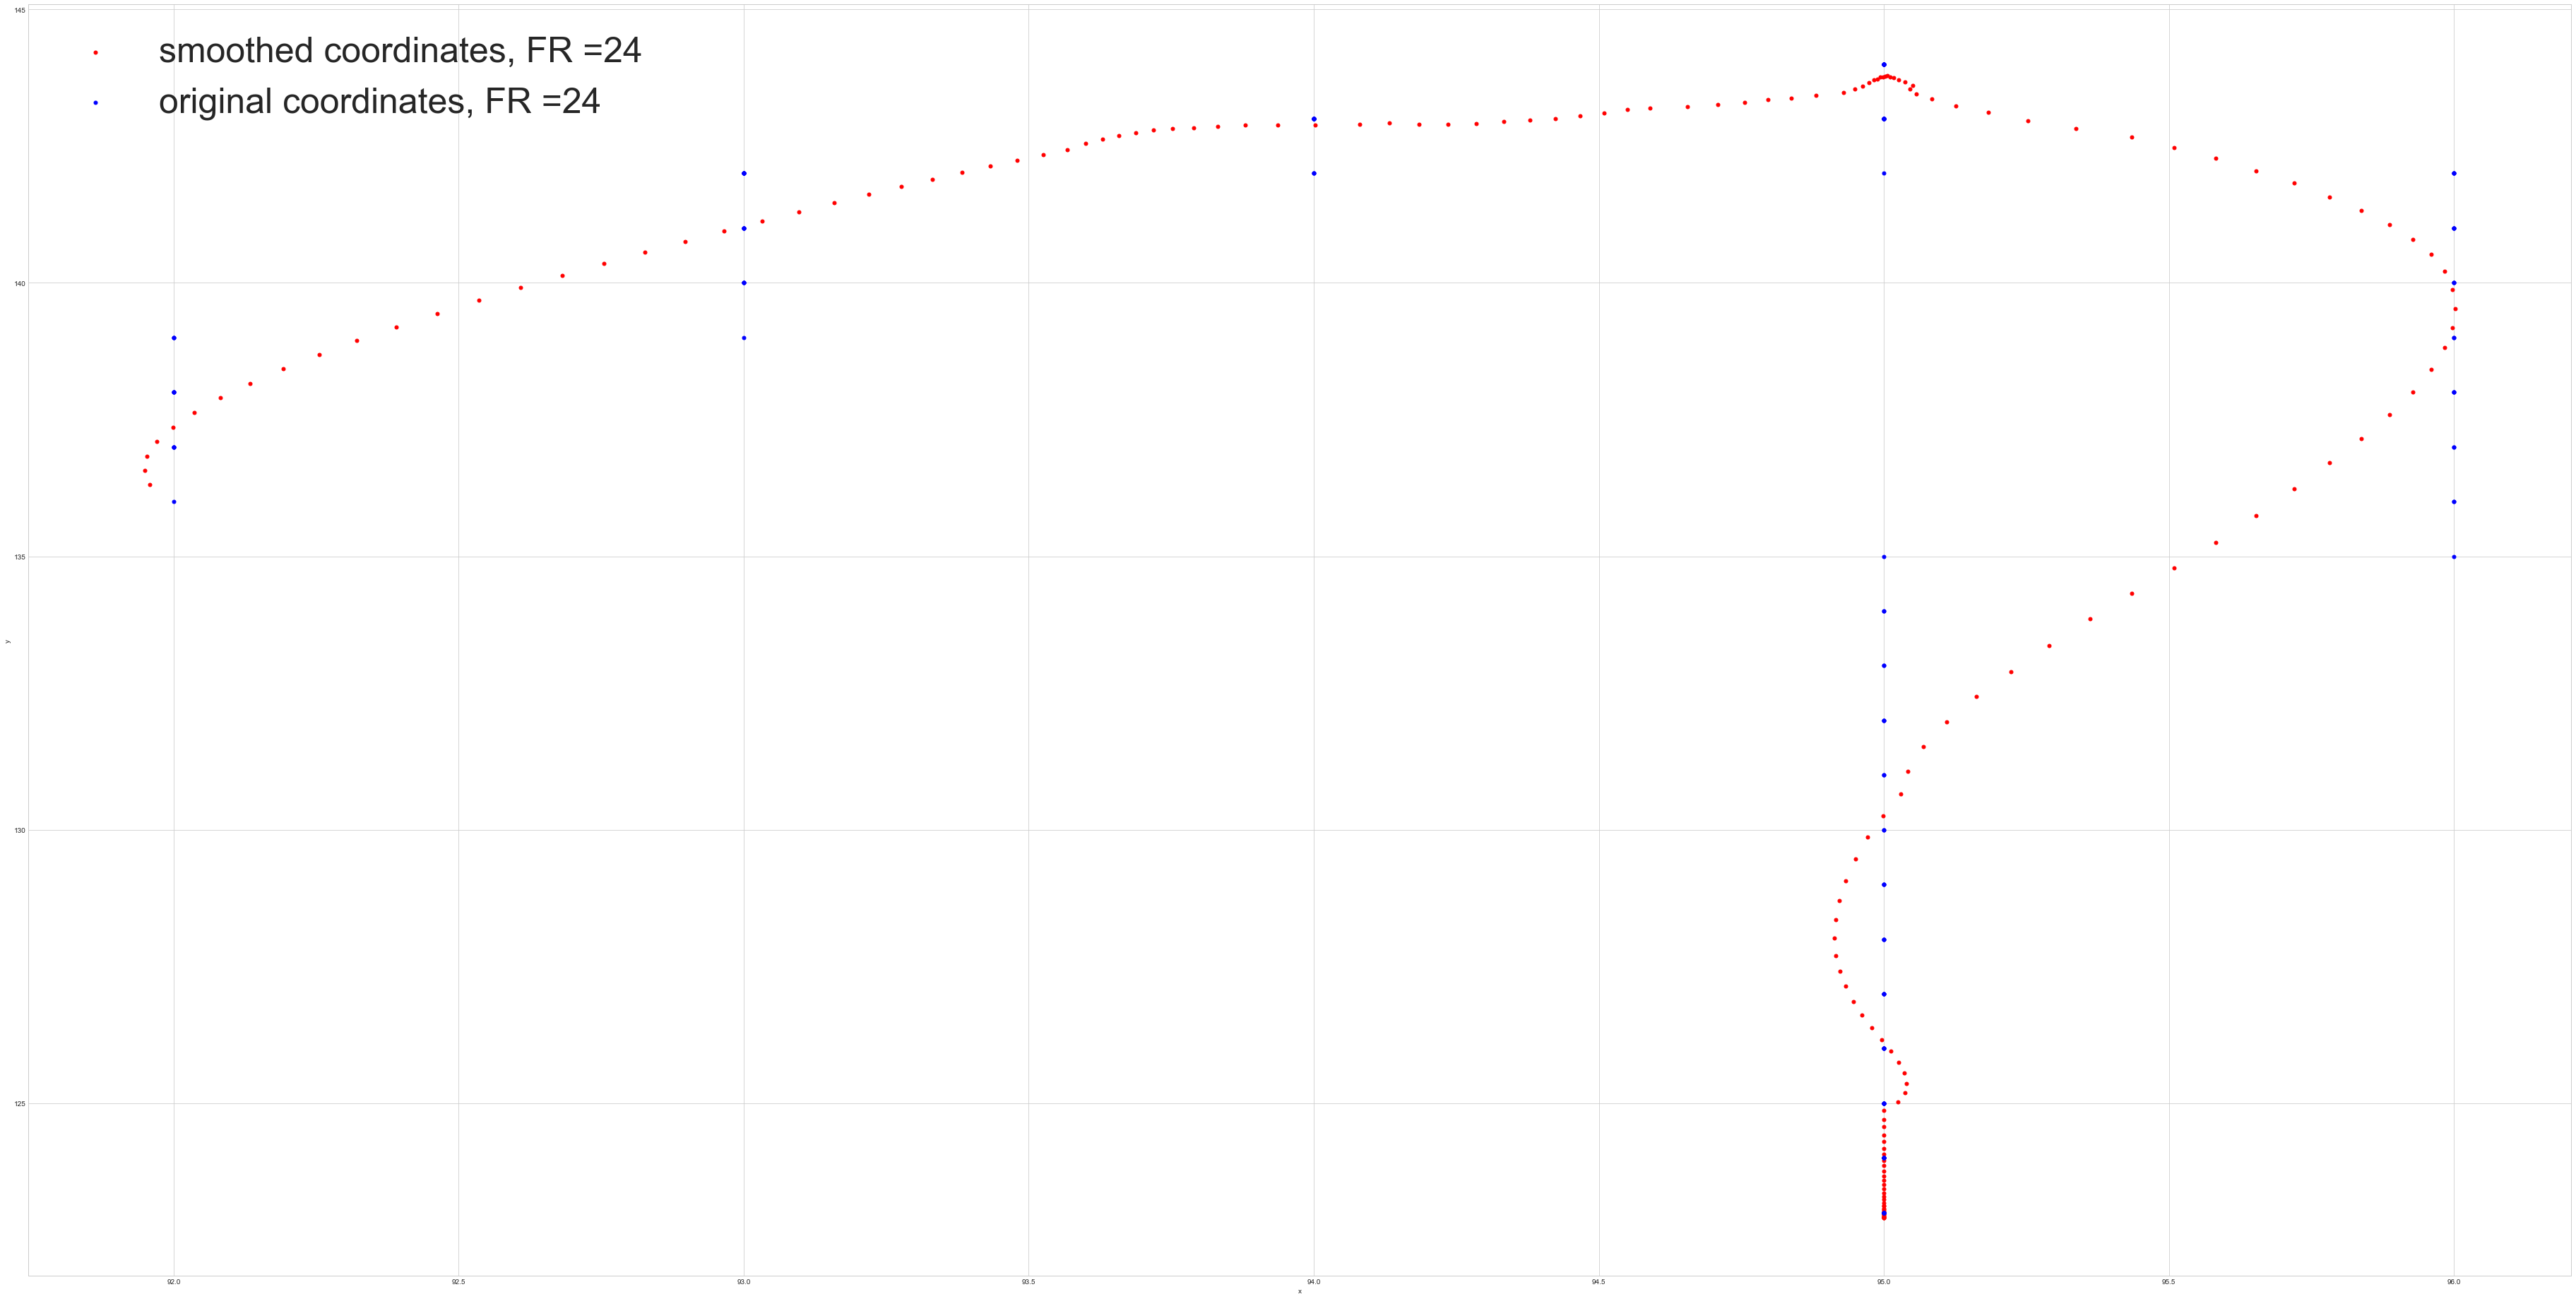

In [37]:
plotting_fun_for_curves.PlotCurve(34, 6, mode = 'both', zoom_in_for_fr_range = range(50,93))
plotting_fun_for_curves.PlotCurve(34, 7, mode = 'both', zoom_in_for_fr_range = range(58,108))
plotting_fun_for_curves.PlotCurve(34, 24, mode = 'both', zoom_in_for_fr_range = range(200,370))

#slightly different shape in the lower part of the curve for fr = 7

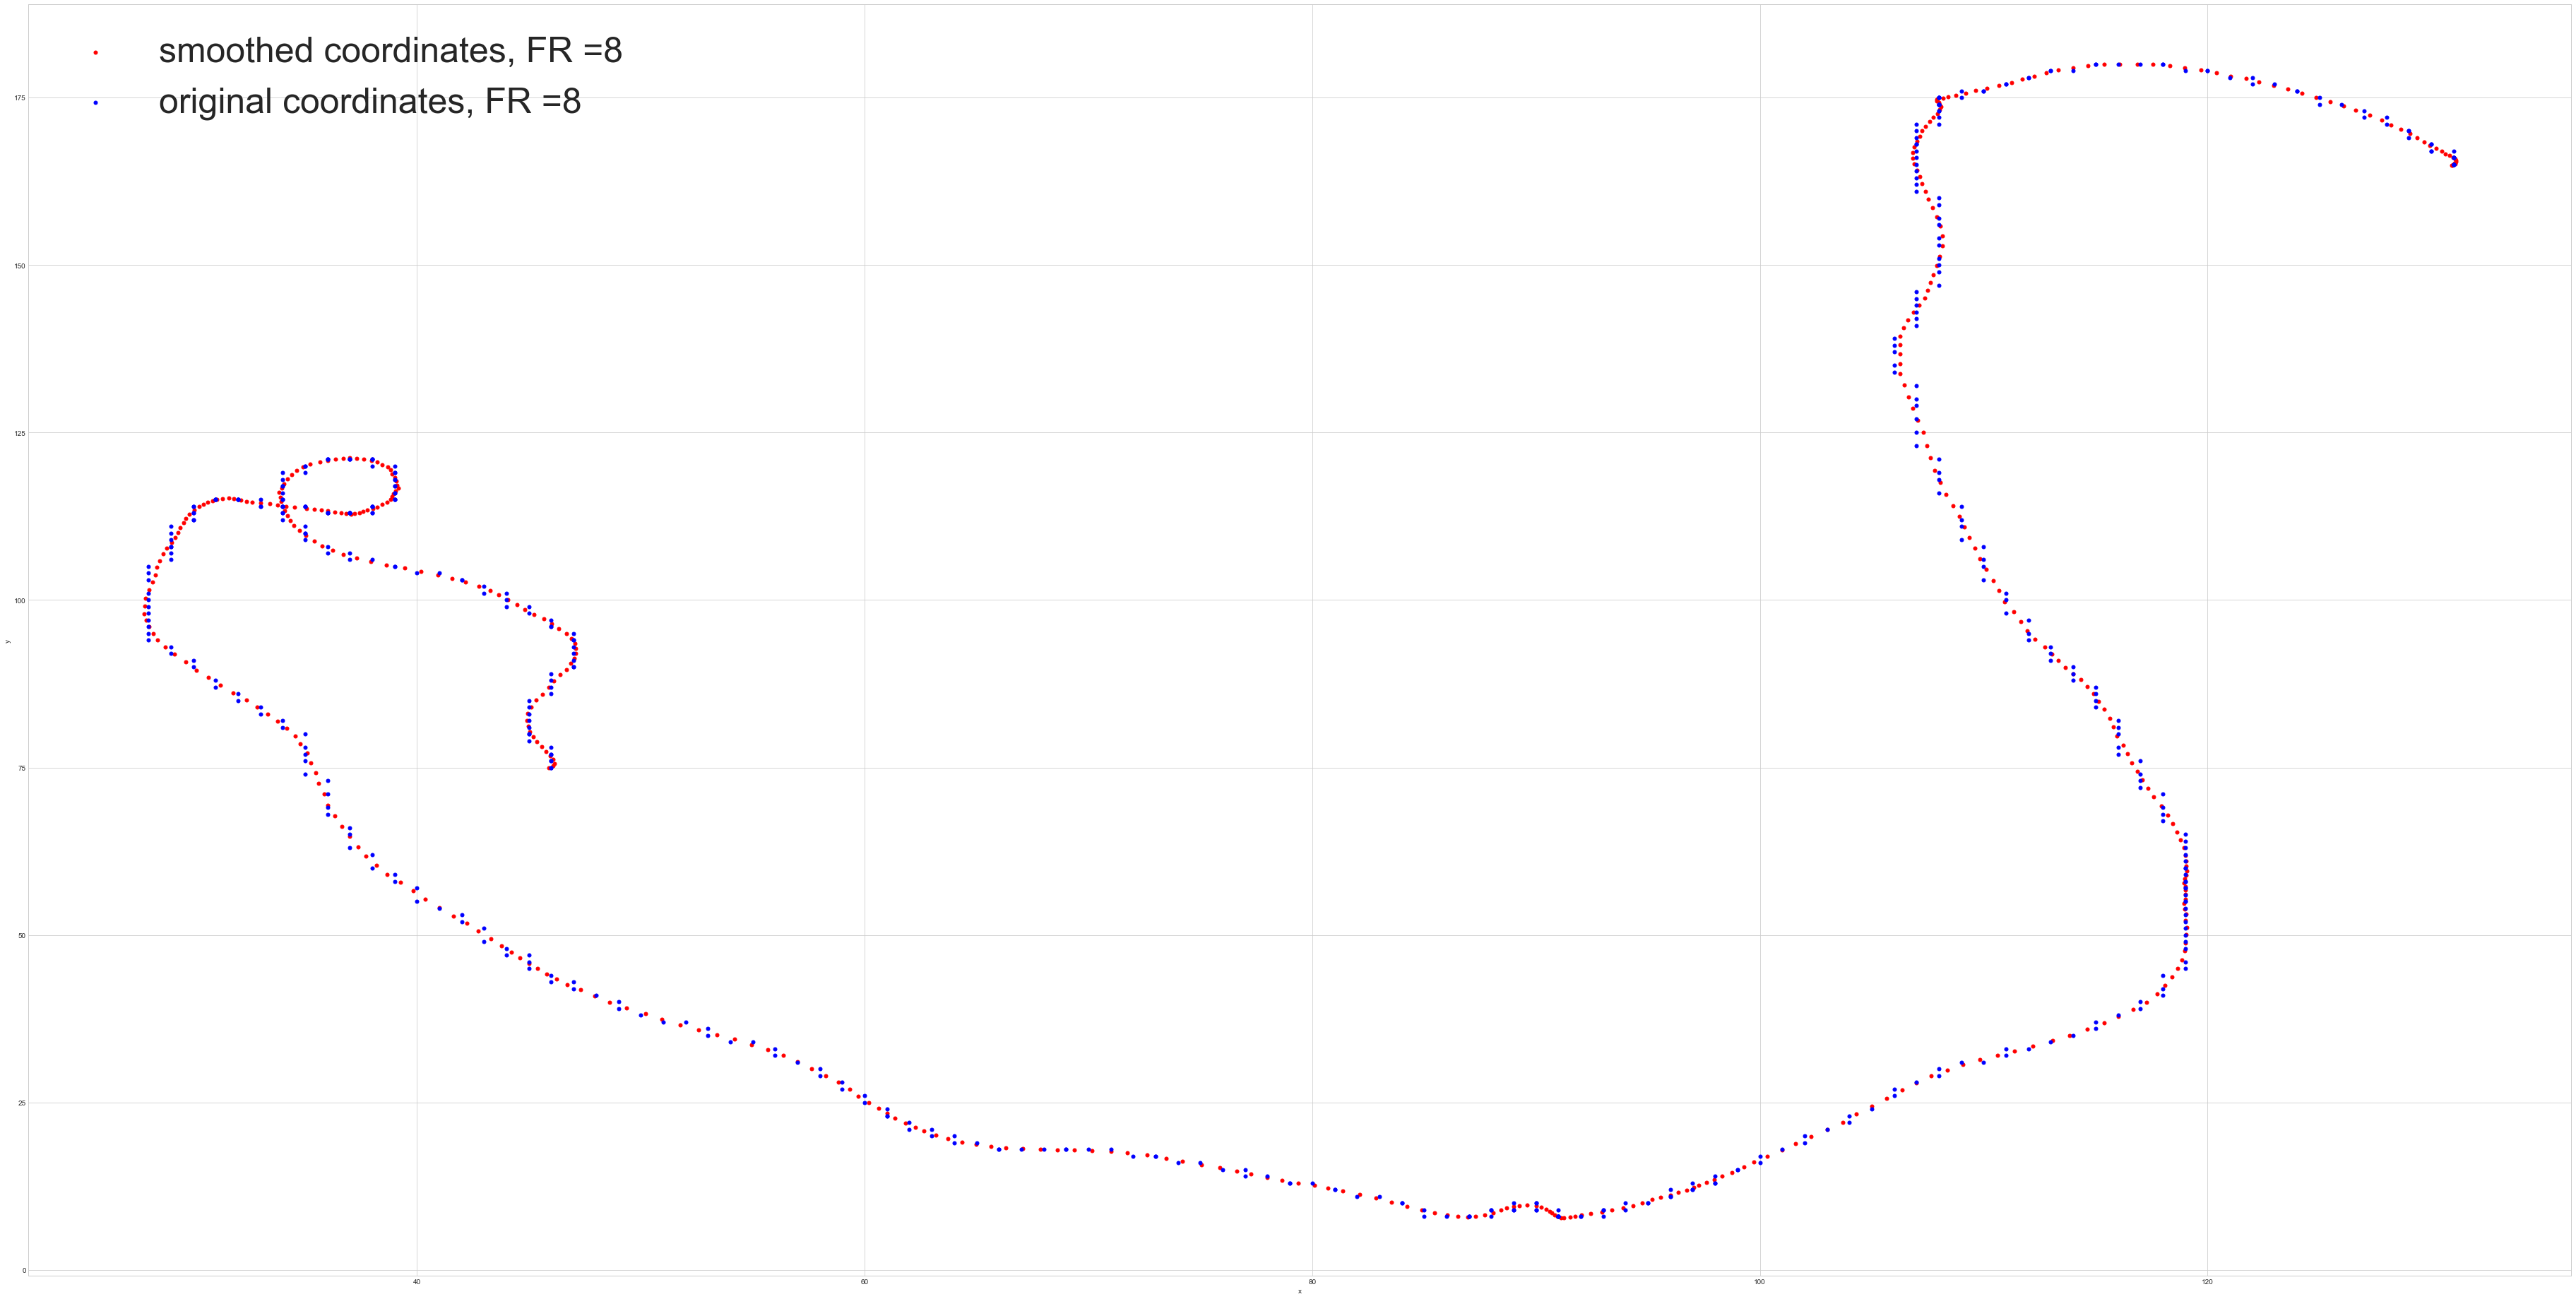

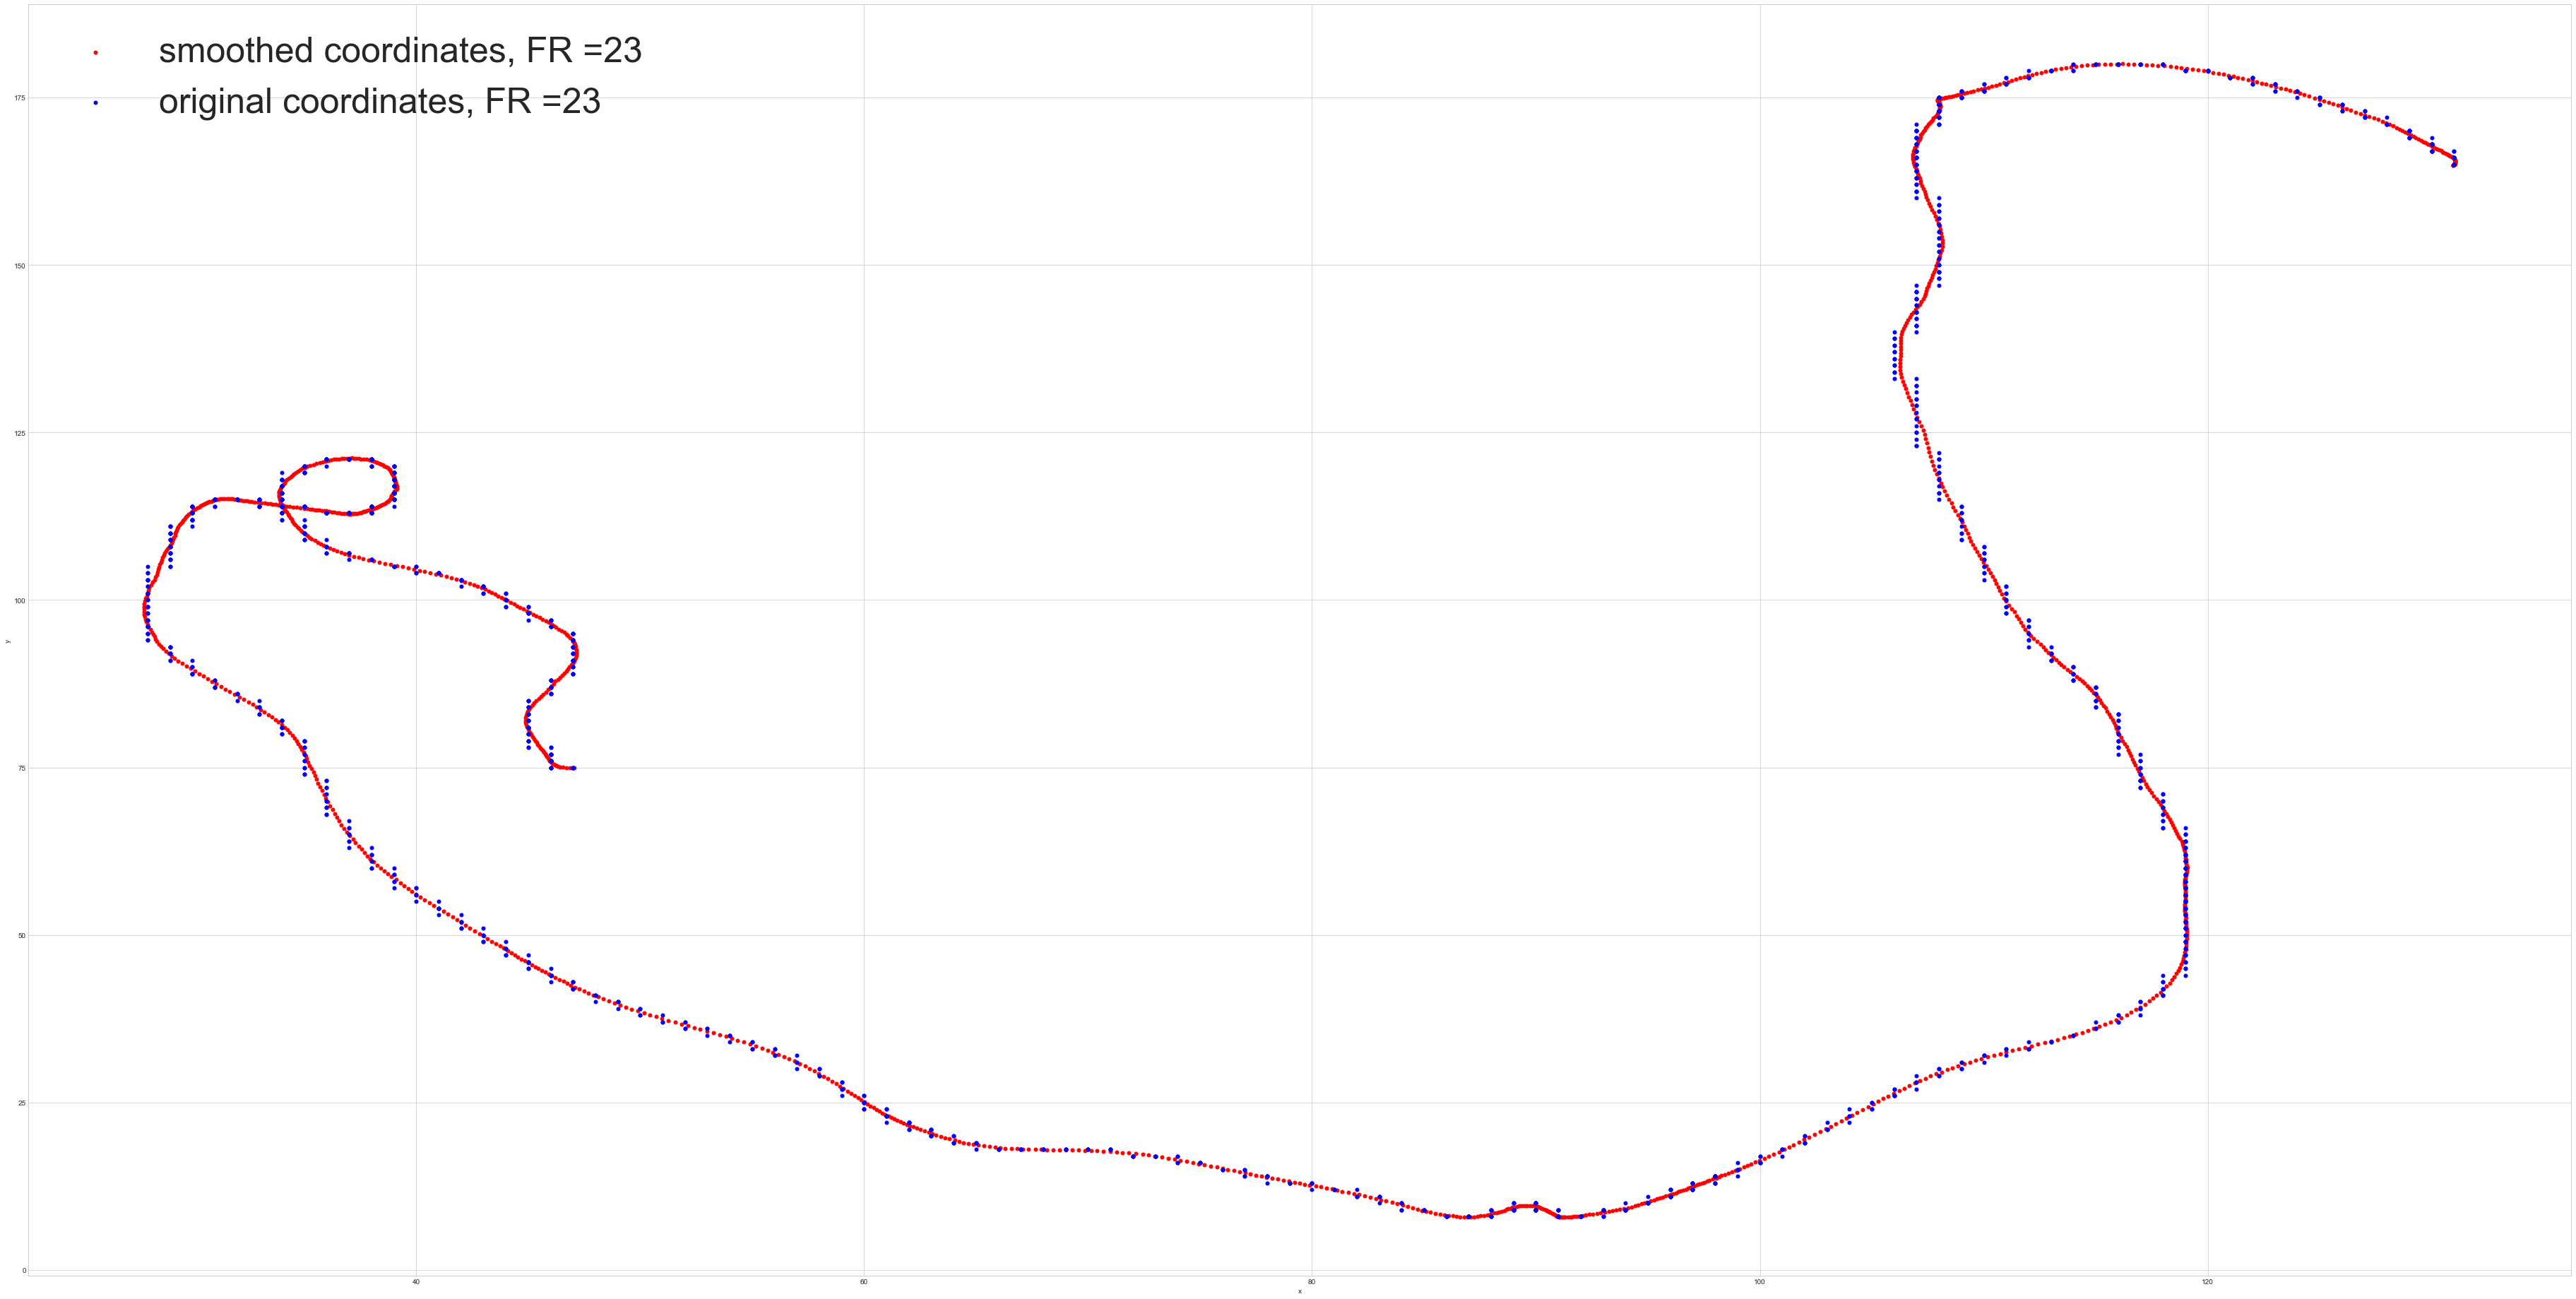

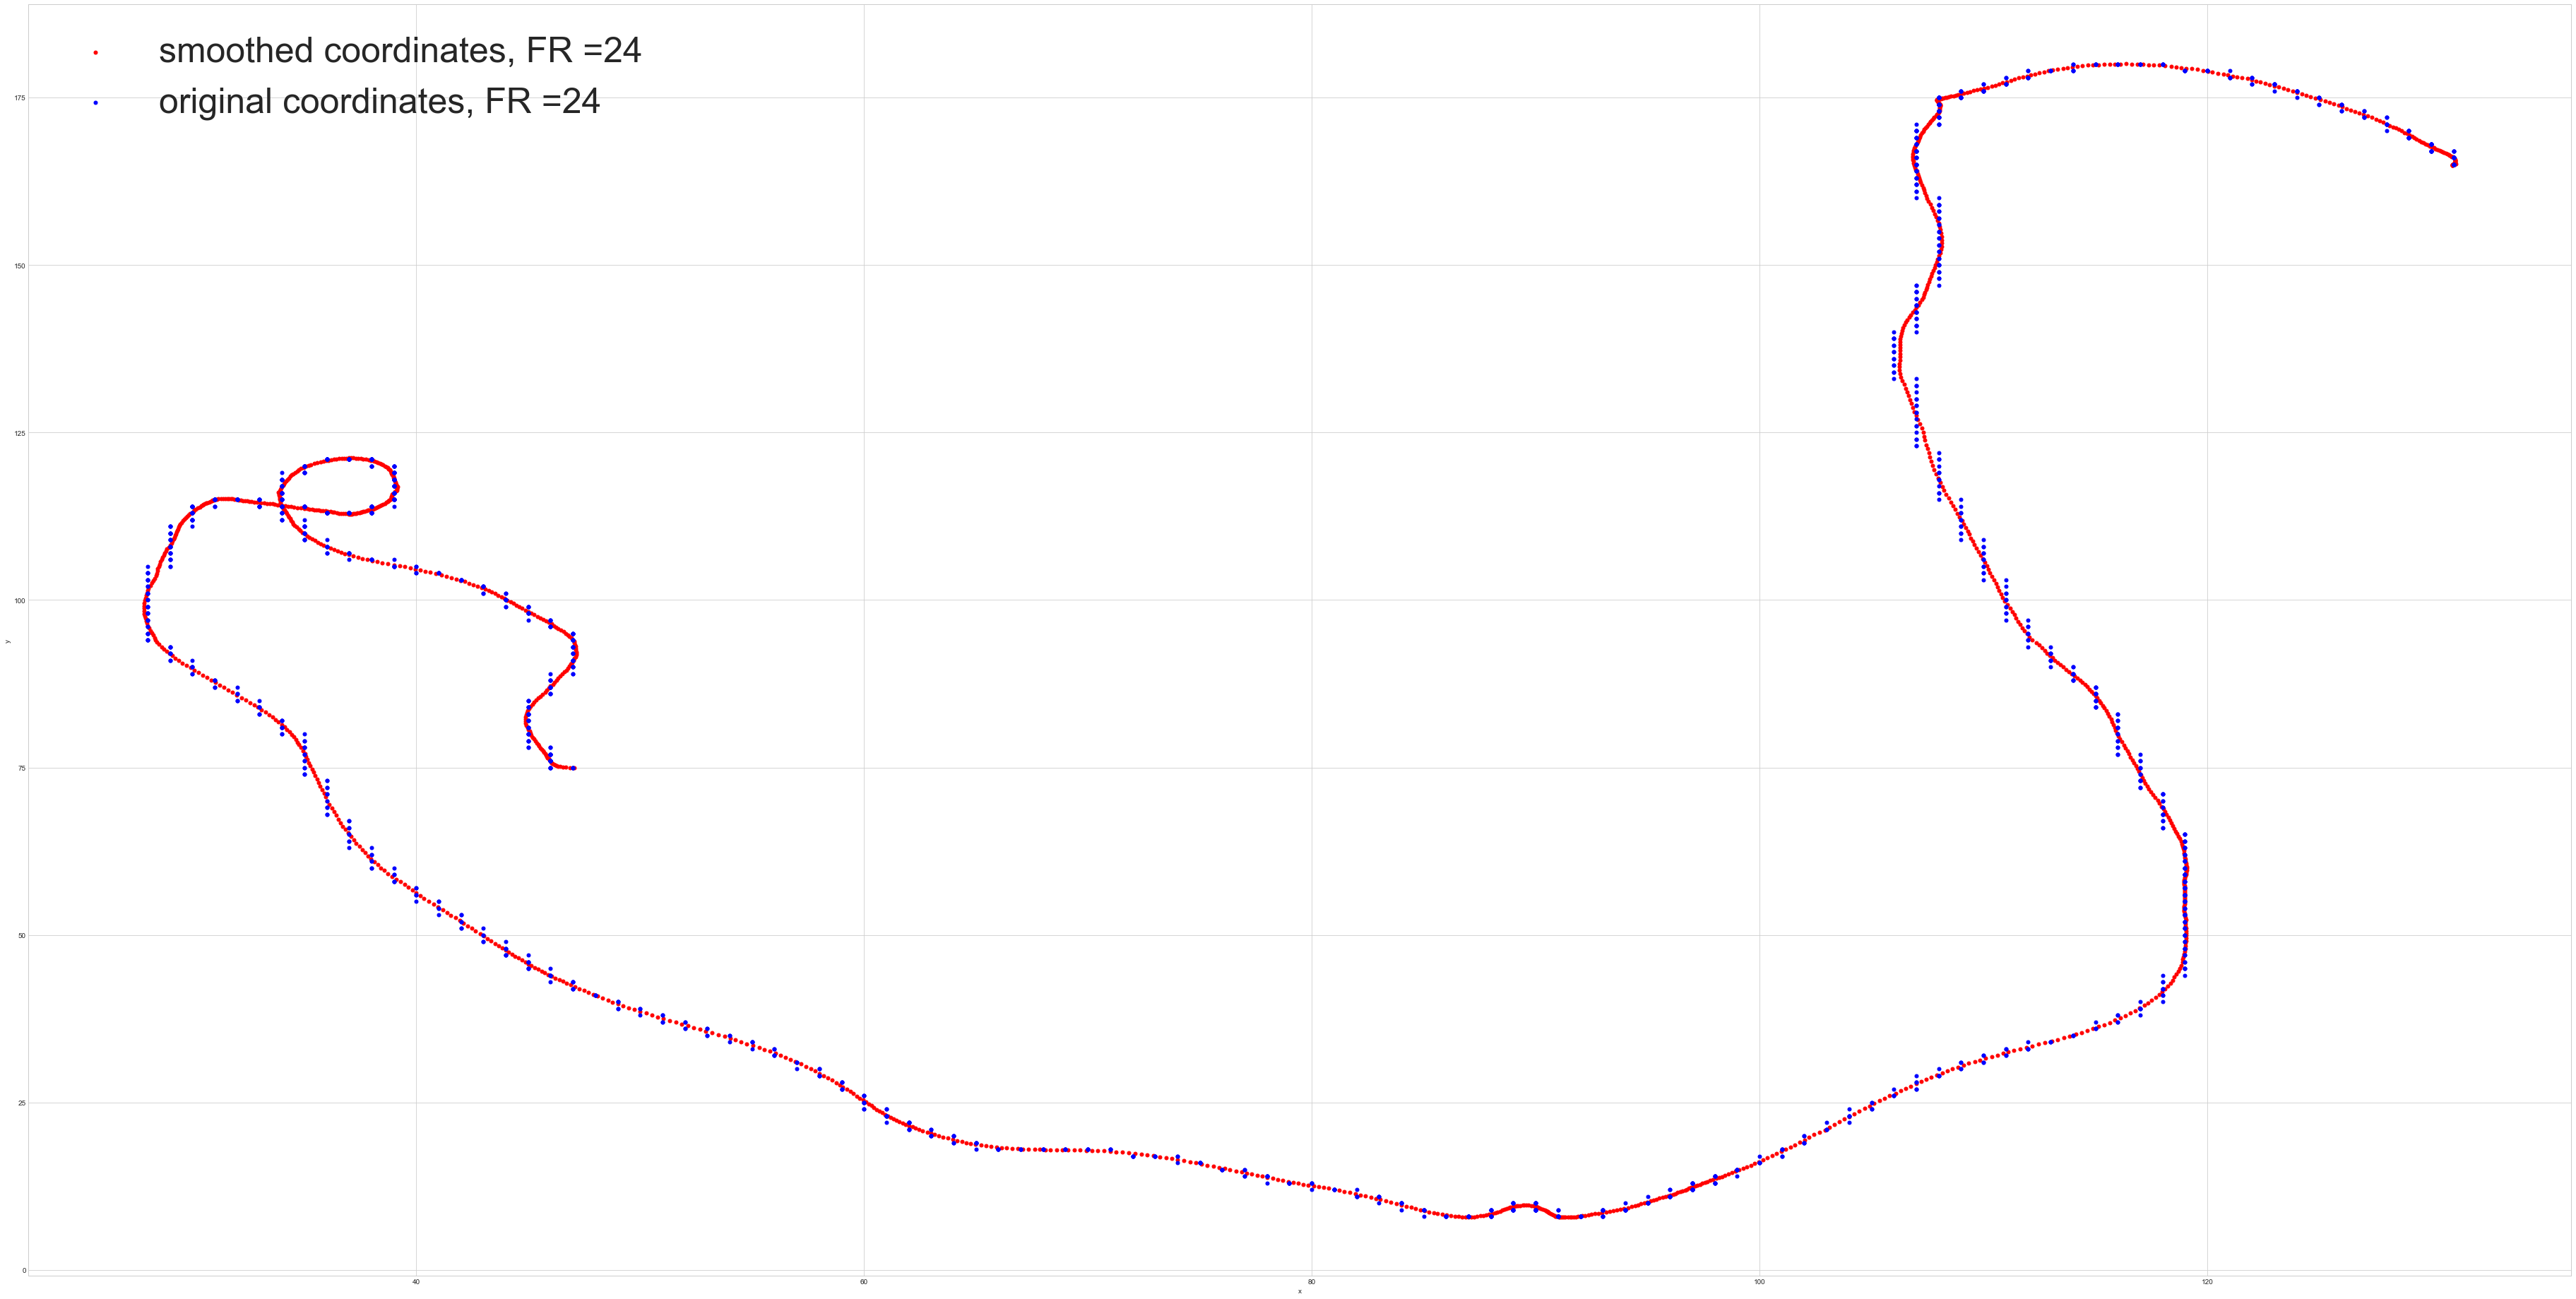

In [39]:
#### curve 45, FR = (8, 23), FR_low trial no (02, 17)
#general shape
plotting_fun_for_curves.PlotCurve(45, 8, mode = 'both')
plotting_fun_for_curves.PlotCurve(45, 23, mode = 'both')
plotting_fun_for_curves.PlotCurve(45, 24, mode = 'both')


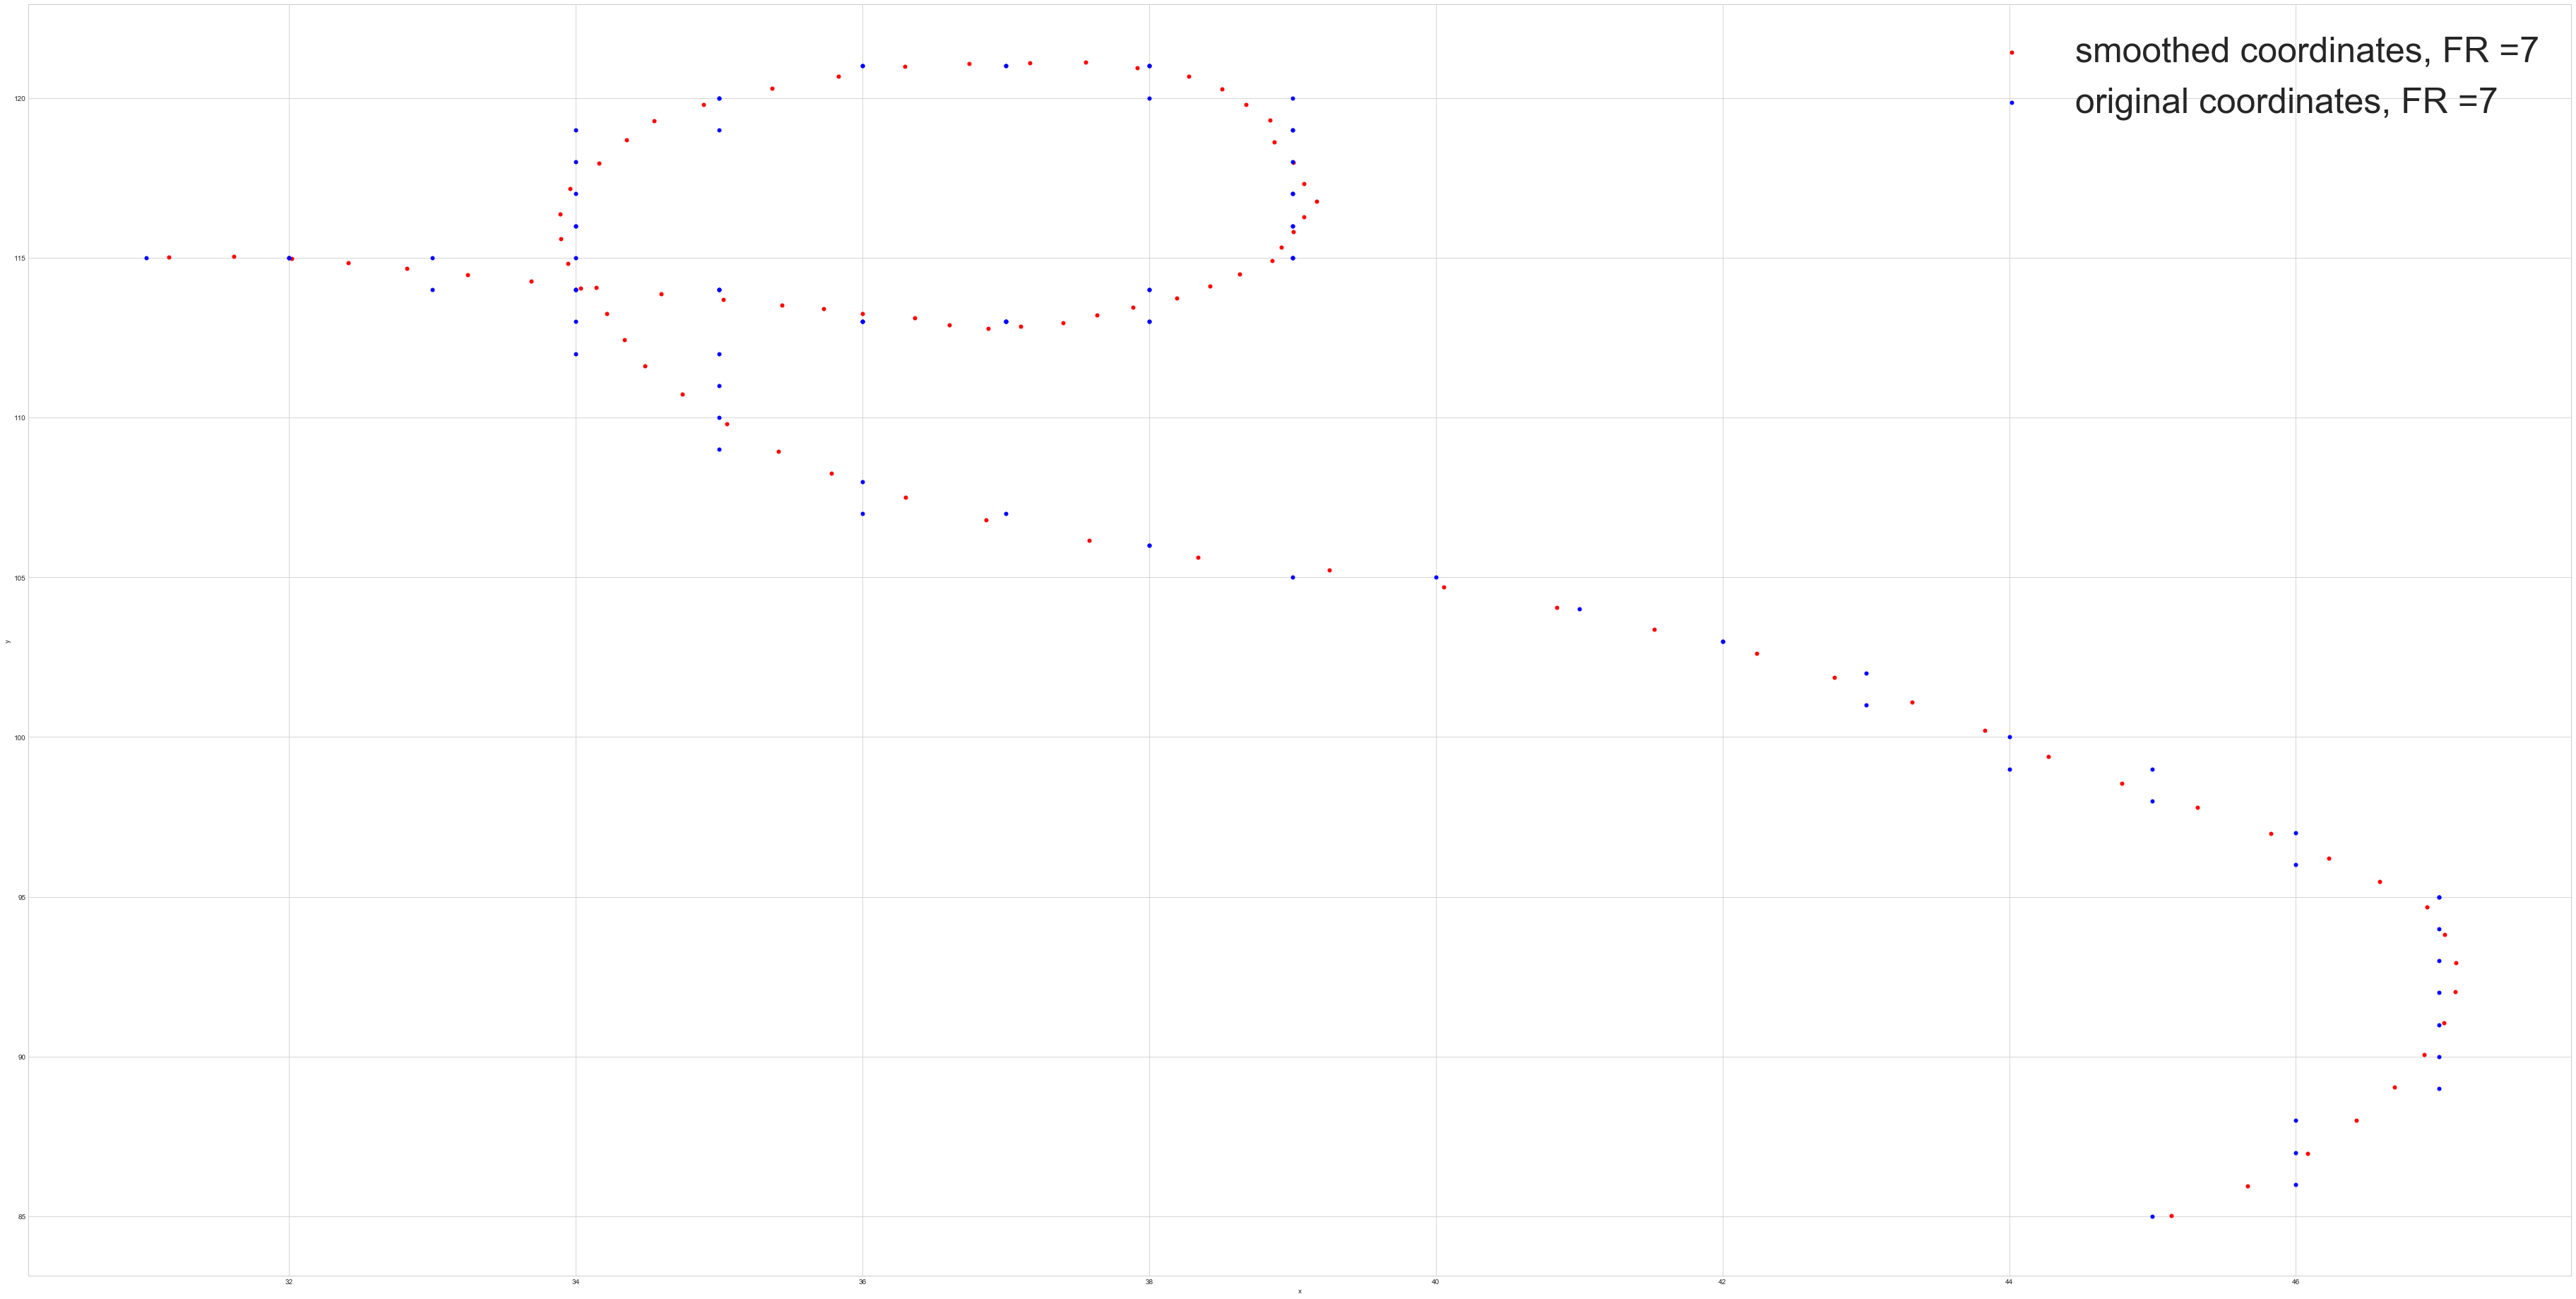

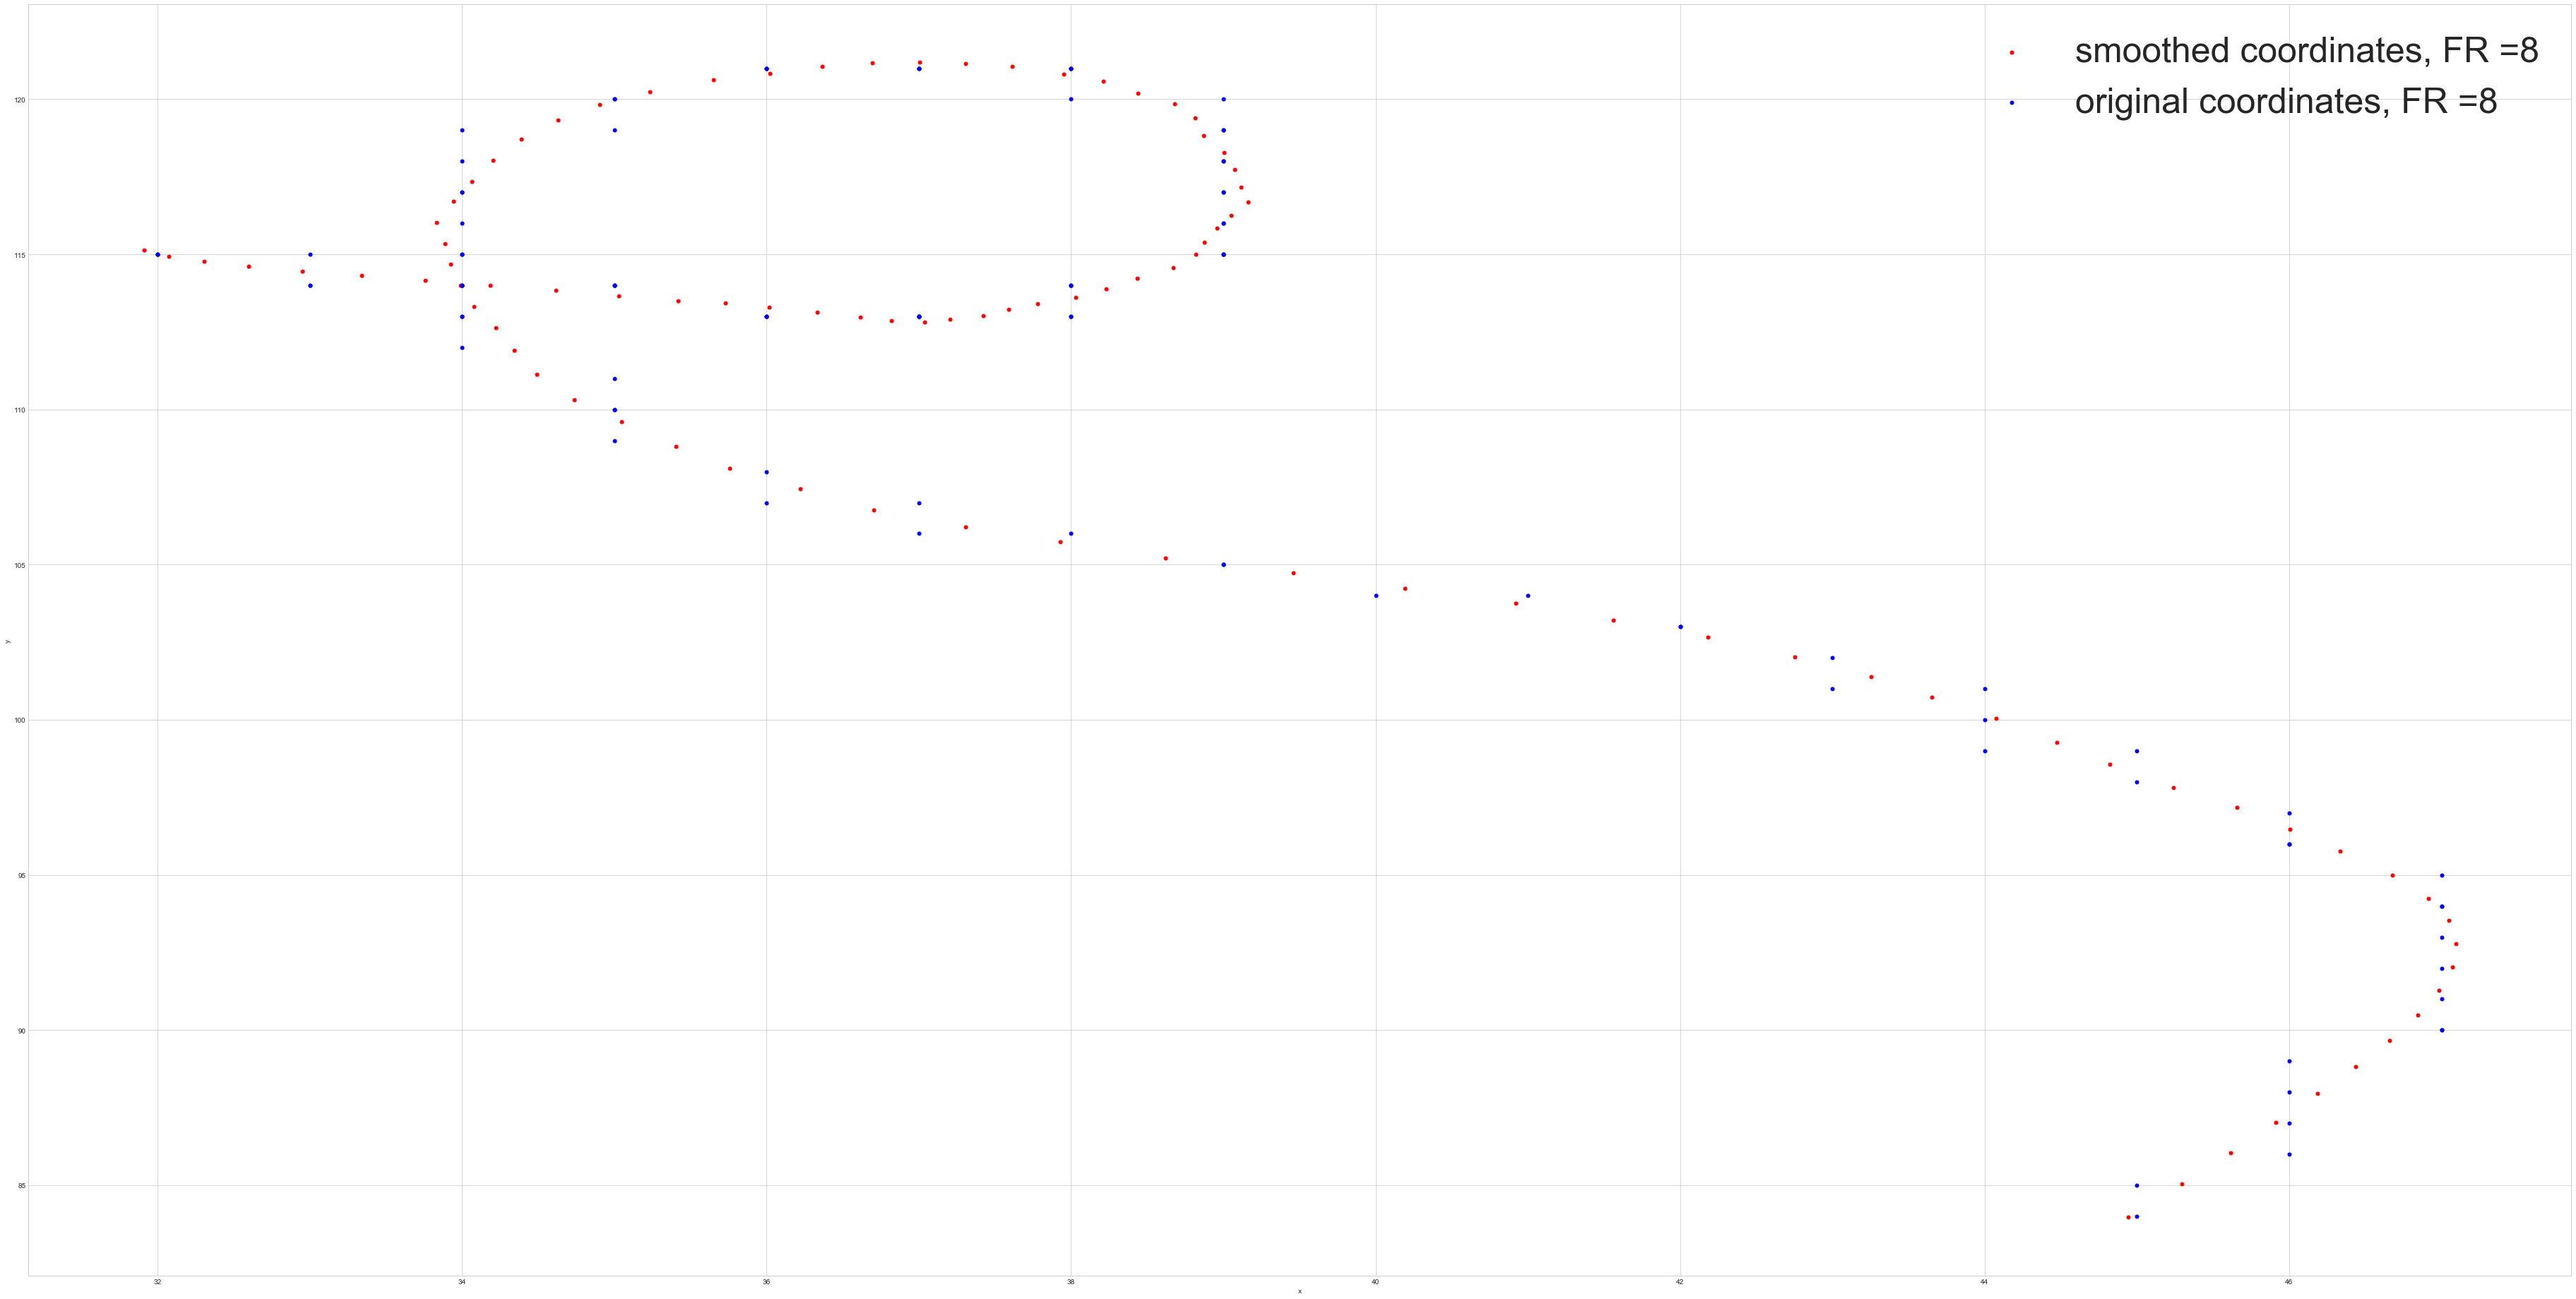

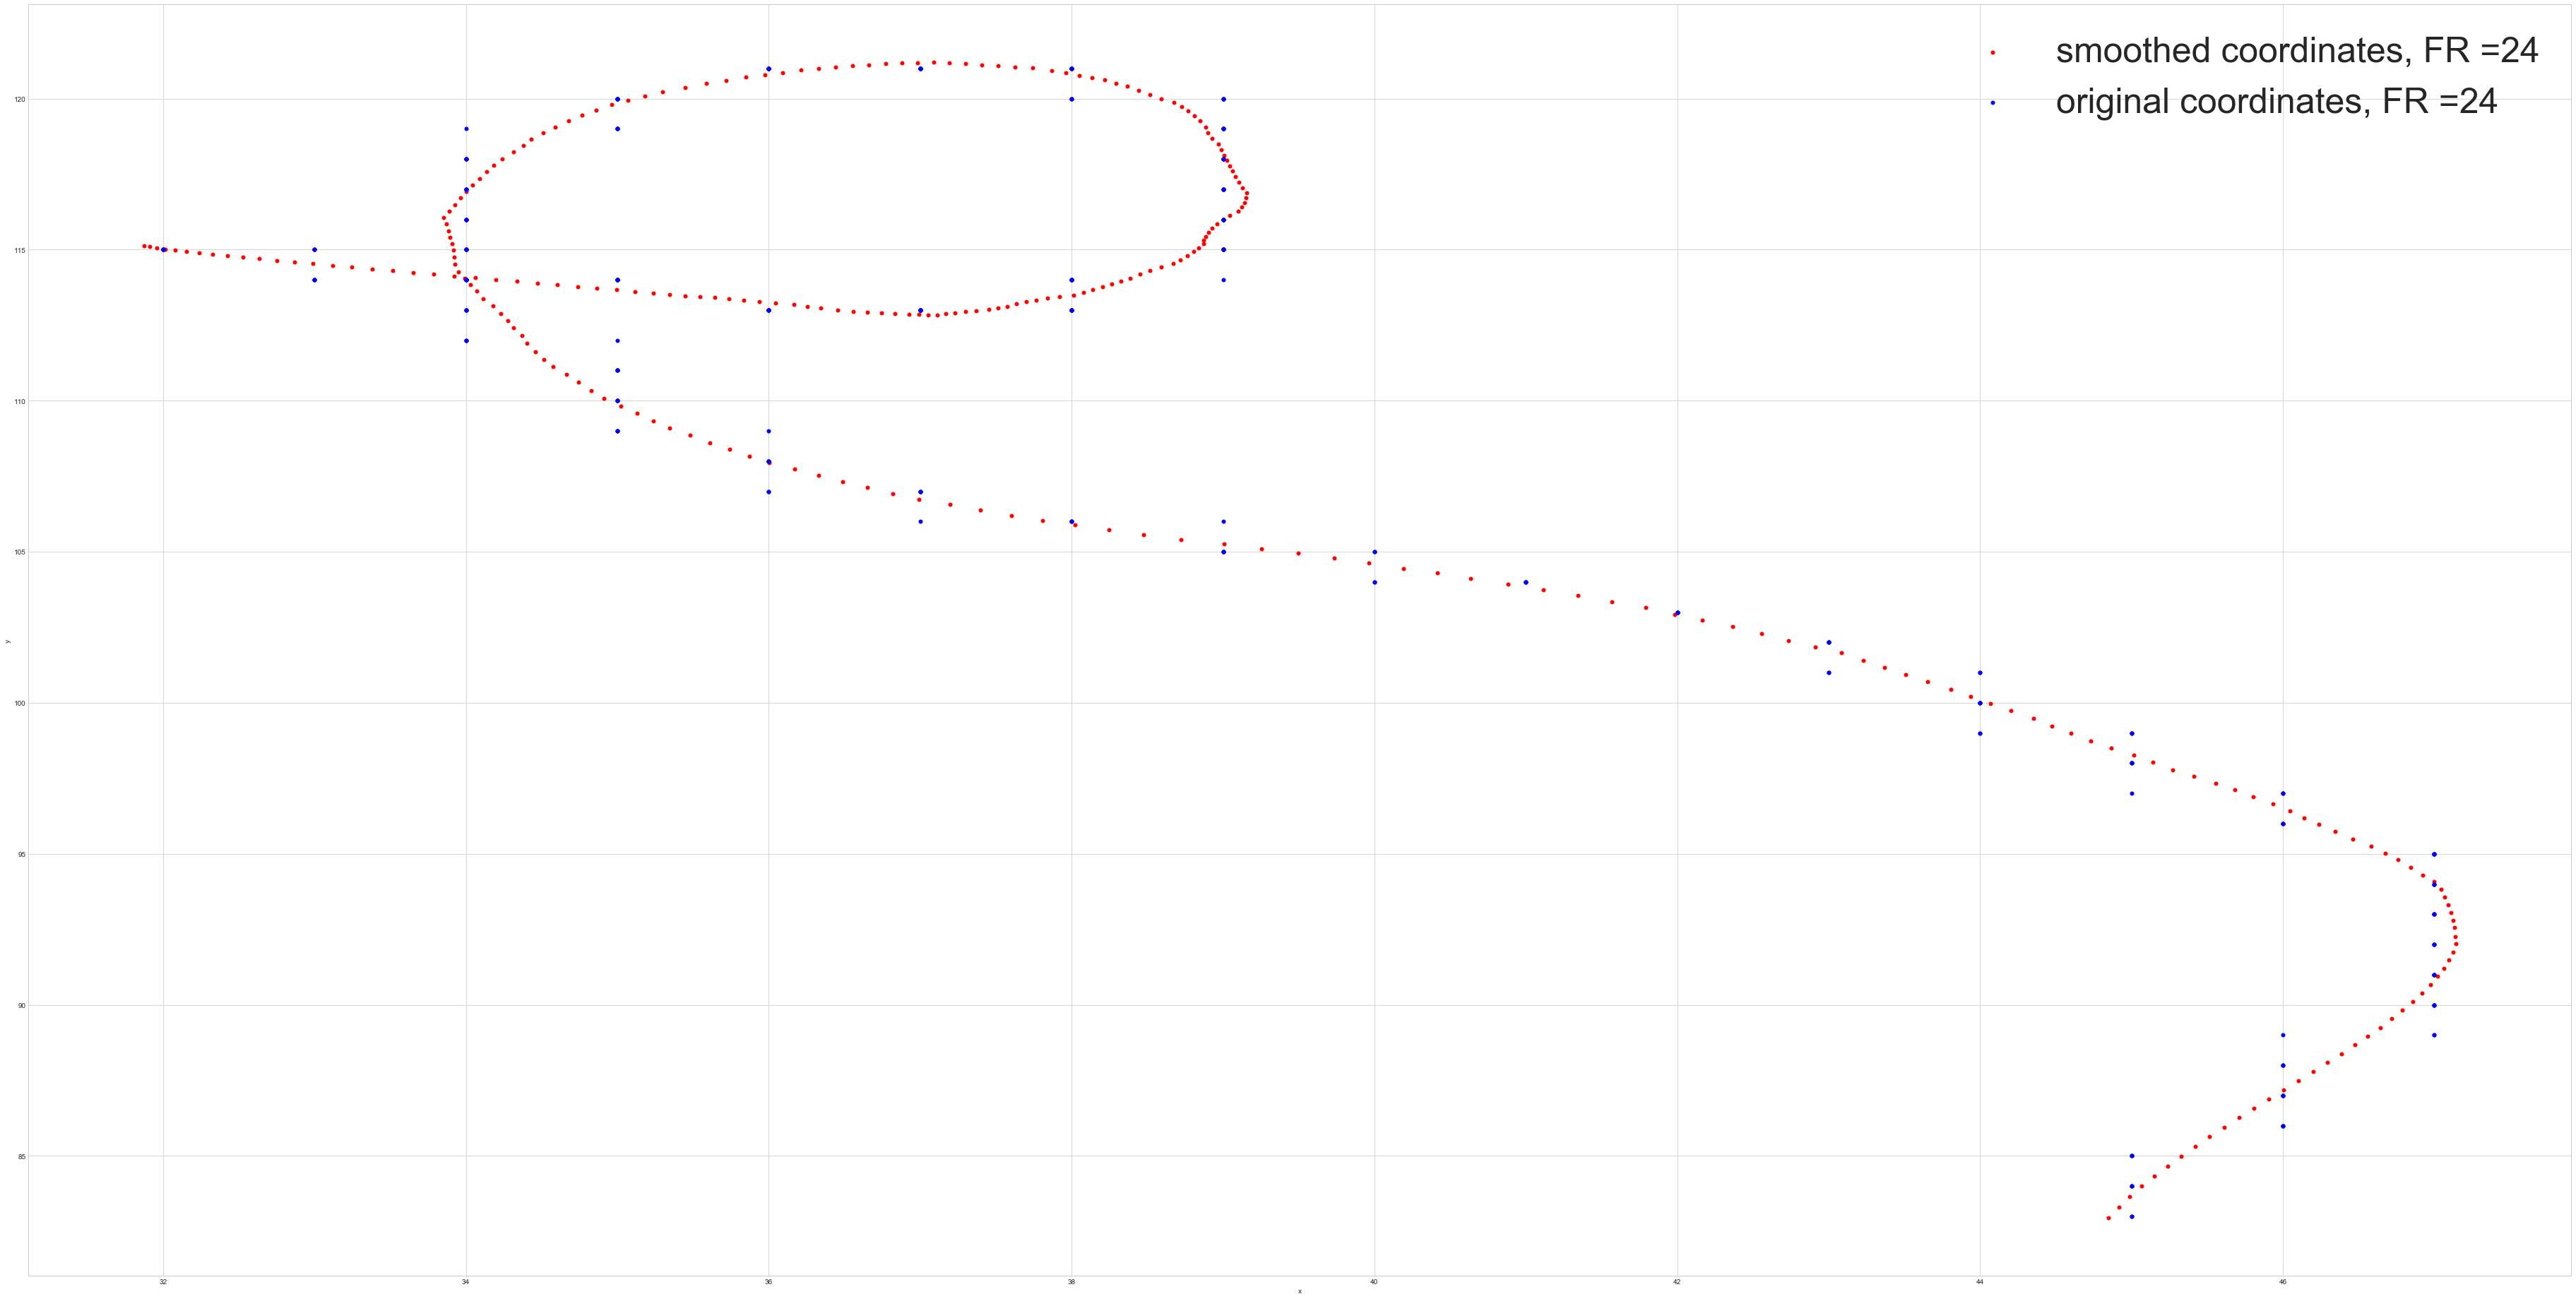

In [42]:
#dip 50-150
plotting_fun_for_curves.PlotCurve(45, 7, mode = 'both', zoom_in_for_fr_range = range(320,408))
plotting_fun_for_curves.PlotCurve(45, 8, mode = 'both', zoom_in_for_fr_range = range(367,467))
plotting_fun_for_curves.PlotCurve(45, 24, mode = 'both', zoom_in_for_fr_range = range(1100,1400))

In [ ]:
#dip 50-150
plotting_fun_for_curves.PlotCurve(45, 7, mode = 'both', zoom_in_for_fr_range = range(15,44))
plotting_fun_for_curves.PlotCurve(45, 8, mode = 'both', zoom_in_for_fr_range = range(17,50))
plotting_fun_for_curves.PlotCurve(45, 24, mode = 'both', zoom_in_for_fr_range = range(50,150))